### 성연령별 유동인구 데이터 적재 

In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

In [0]:
%pwd

In [0]:
%cd /content/drive/My Drive/수퍼판다

In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np


# 그래프 한글처리
import matplotlib as mpl
# 한글 깨짐 방지
mpl.rcParams['font.family'].insert(0,'Malgun Gothic')

In [0]:
# 성연령별 유동인구 데이터 읽어오기 - 
#18,19년도 성연령유동인구 파일 하나로 합치기(현재 19년 2월까지 합친 상태)

months_18_1 = range(4,10)

data = []

for month in months_18_1:
    path = 'content/drive/My Drive/수퍼판다/data/유동인구데이터/성연령유동/노원_종로_FLOW_AGE_20180%d.CSV' % month
    frame = pd.read_csv(path, sep='|')
    
    frame['월'] = month
    data.append(frame)

유동인구_18_1 = pd.concat(data, ignore_index=True)

months_18_2 = range(10,13)

for month in months_18_2:
    path = 'content/drive/My Drive/수퍼판다/data/유동인구데이터/성연령유동/노원_종로_FLOW_AGE_2018%d.CSV' % month
    frame = pd.read_csv(path, sep='|')
    
    frame['월'] = month
    data.append(frame)

유동인구_18_2 = pd.concat(data, ignore_index=True)

#위의 결과에 19년도 성연령유인구 파일 추가하기

months_19 = range(1,3)

for month in months_19:
    path = 'content/drive/My Drive/수퍼판다/data/유동인구데이터/성연령유동/노원_종로_FLOW_AGE_20190%d.CSV' % month
    frame = pd.read_csv(path, sep='|')
   
    frame['월'] = month
    data.append(frame)

성연령유동인구 = pd.concat(data, ignore_index=True)

성연령유동인구.head()


,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,월
0,201804,20180401,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.30,...,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56,4
1,201804,20180401,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,5743.10,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08,4
2,201804,20180401,1111054000,삼청동,0.00,78.07,255.24,331.09,654.32,1264.86,...,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.60,359.03,421.64,4
3,201804,20180401,1111055000,부암동,0.00,228.50,753.31,981.54,1615.77,2732.00,...,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65,4
4,201804,20180401,1111056000,평창동,0.00,354.38,1500.63,1963.08,2593.07,4927.24,...,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41,4


In [0]:
# 컬럼명 붙이기 
성연령유동인구.columns = ['년월','년월일','행정동코드','행정동명칭',
                 '남_0004', '남_0509', '남_1014',
                '남_1519', '남_2024', '남_2529',
                '남_3034','남_3539', '남_4044',
                '남_4549','남_5054', '남_5559',
                '남_6064','남_6569', '남_70이상',
                '여_0004','여_0509', '여_1014',
                '여_1519','여_2024', '여_2529',
                '여_3034','여_3539', '여_4044',
                '여_4549','여_5054', '여_5559',
                '여_6064', '여_6569','여_70이상', '월'
                ]
성연령유동인구

,년월,년월일,행정동코드,행정동명칭,남_0004,남_0509,남_1014,남_1519,남_2024,남_2529,...,여_3034,여_3539,여_4044,여_4549,여_5054,여_5559,여_6064,여_6569,여_70이상,월
0,201804,20180401,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.30,...,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56,4
1,201804,20180401,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,5743.10,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08,4
2,201804,20180401,1111054000,삼청동,0.00,78.07,255.24,331.09,654.32,1264.86,...,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.60,359.03,421.64,4
3,201804,20180401,1111055000,부암동,0.00,228.50,753.31,981.54,1615.77,2732.00,...,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65,4
4,201804,20180401,1111056000,평창동,0.00,354.38,1500.63,1963.08,2593.07,4927.24,...,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41,4
5,201804,20180401,1111057000,무악동,0.18,39.69,204.43,377.50,509.92,766.21,...,698.17,769.80,777.93,885.00,790.96,796.02,663.07,335.06,505.00,4
6,201804,20180401,1111058000,교남동,0.10,71.96,296.03,424.87,644.91,1135.05,...,1195.05,1293.85,1149.73,1336.16,1236.98,1233.81,1005.98,511.36,659.94,4
7,201804,20180401,1111060000,가회동,0.00,37.87,196.30,535.94,472.73,893.54,...,729.24,812.86,741.41,824.36,773.96,600.20,496.99,239.37,318.38,4
8,201804,20180401,1111061500,종로1.2.3.4가동,0.00,513.62,2338.10,5480.67,13268.22,22024.63,...,15427.80,14043.25,12047.71,13552.38,12382.49,12825.69,11133.73,6688.62,8386.44,4
9,201804,20180401,1111063000,종로5.6가동,0.00,110.60,521.40,1783.97,4146.69,5968.60,...,4030.70,3685.25,3086.76,3643.56,3525.47,3880.52,3341.49,2045.79,2427.11,4


In [0]:
성연령유동인구.to_excel('성연령유동인구.xlsx')

In [0]:
행정동 = 성연령유동인구.행정동명칭.value_counts()
행정동.value_counts()

334    36
Name: 행정동명칭, dtype: int64

In [0]:
행정동

중계2.3동         334
창신2동           334
평창동            334
상계5동           334
상계3.4동         334
상계9동           334
상계2동           334
창신1동           334
중계4동           334
상계8동           334
무악동            334
상계10동          334
삼청동            334
이화동            334
가회동            334
부암동            334
중계본동           334
청운효자동          334
창신3동           334
중계1동           334
월계1동           334
월계2동           334
숭인1동           334
숭인2동           334
상계1동           334
교남동            334
종로1.2.3.4가동    334
종로5.6가동        334
혜화동            334
사직동            334
하계1동           334
공릉2동           334
상계6.7동         334
공릉1동           334
하계2동           334
월계3동           334
Name: 행정동명칭, dtype: int64

In [0]:
#노원구 성연령별 유동인구(미세먼지 데이터와 교집합인 행정동만 컬럼명에 기재)
#중계4동 - 유동인구 데이터에만 있는 행정동
#중계1동 - 유동인구 데이터에만 있는 행정동
#상계9동 - 유동인구 데이터에만 있는 행정동
#월계2동 - 유동인구 데이터에만 있는 행정동
#상계10동 - 유동인구 데이터에만 있는 행정동
#상계8동 - 유동인구 데이터에만 있는 행정동

#종로구 성연령별 유동인구(미세먼지 데이터와 교집합인 행정동만 컬럼명에 기재)
#숭인1동 - 유동인구 데이터에만 있는 행정동
#삼청동 - 유동인구 데이터에만 있는 행정동
#무악동 - 유동인구 데이터에만 있는 행정동
#창신2동 - 유동인구 데이터에만 있는 행정동
#청연동 - 미세먼지 데이터에만 있는 행정동
#명동 - 미세먼지 데이터에만 있는 행정동

노원구행정동 = ['중계본동', '중계2.3동', '공릉2동', '공릉1동', '월계3동', '월계1동',
             '상계6.7동', '상계5동', '상계3.4동','상계2동', '상계1동', '하계2동', '하계1동']

노원구_성연령유동인구 = {}

for idx in range(0, len(노원구행정동)):
    노원구_성연령유동인구[노원구행정동[idx]] = 성연령유동인구[성연령유동인구['행정동명칭'] == 노원구행정동[idx] ]
    
    

종로구행정동 = ['혜화동', '평창동', '청운효자동', '창신3동', '창신1동',
            '종로5.6가동', '종로1.2.3.4가동','이화동','숭인2동', '사직동', '부암동','교남동','가회동']

종로구_성연령유동인구 = {}

for idx in range(0, len(종로구행정동)):
    종로구_성연령유동인구[종로구행정동[idx]] = 성연령유동인구[성연령유동인구['행정동명칭'] == 종로구행정동[idx] ]

 

In [0]:
노원구_성연령유동인구 = pd.concat(노원구_성연령유동인구)

In [0]:
노원구_성연령유동인구.행정동명칭.value_counts()

상계3.4동    334
월계1동      334
상계2동      334
중계2.3동    334
하계1동      334
공릉2동      334
상계6.7동    334
공릉1동      334
하계2동      334
중계본동      334
상계1동      334
상계5동      334
월계3동      334
Name: 행정동명칭, dtype: int64

In [0]:
종로구_성연령유동인구 = pd.concat(종로구_성연령유동인구)

In [0]:
종로구_성연령유동인구

년월       년월일       행정동코드 행정동명칭  남_0004  남_0509  남_1014  \
가회동 7      201804  20180401  1111060000   가회동    0.00   37.87  196.30   
    43     201804  20180402  1111060000   가회동    0.00   14.21  142.60   
    79     201804  20180403  1111060000   가회동    0.00   20.91  178.25   
    115    201804  20180404  1111060000   가회동    0.00   19.36  203.25   
    151    201804  20180405  1111060000   가회동    0.00   20.82  170.71   
    187    201804  20180406  1111060000   가회동    0.03   21.94  200.22   
    223    201804  20180407  1111060000   가회동    1.13   57.36  258.78   
    259    201804  20180408  1111060000   가회동    0.00   39.87  200.46   
    295    201804  20180409  1111060000   가회동    0.04   26.19  135.83   
    331    201804  20180410  1111060000   가회동    0.00   16.52  195.04   
    367    201804  20180411  1111060000   가회동    0.00   24.51  323.06   
    403    201804  20180412  1111060000   가회동    0.00   25.72  287.97   
    439    201804  20180413  1111060000   가회동    0.00   18.81  273.53   
    475    201804  20180414  1111060000   가회동    0.02   32.78  231.39   
    511    201804  20180415  1111060000   가회동    0.02   48.11  243.91   
    547    201804  20180416  1111060000   가회동    0.12   26.36  197.98   
    583    201804  20180417  1111060000   가회동    0.04   29.98  436.79   
    619    201804  20180418  1111060000   가회동    1.08   24.37  406.64   
    655    201804  20180419  1111060000   가회동    0.49   37.12  370.84   
    691    201804  20180420  1111060000   가회동    0.47   22.45  320.63   
    727    201804  20180421  1111060000   가회동    0.56   60.17  299.94   
    763    201804  20180422  1111060000   가회동    0.59   43.57  220.67   
    799    201804  20180423  1111060000   가회동    1.89   20.74  181.61   
    835    201804  20180424  1111060000   가회동    0.00   23.72  348.60   
    871    201804  20180425  1111060000   가회동    0.86   51.37  571.55   
    907    201804  20180426  1111060000   가회동    1.24   37.89  635.92   
    943    201804  20180427  1111060000   가회동    0.00   28.86  516.91   
    979    201804  20180428  1111060000   가회동    0.00   66.90  255.79   
    1015   201804  20180429  1111060000   가회동    0.08   50.22  211.23   
    1051   201804  20180430  1111060000   가회동    0.02   22.67  229.22   
...           ...       ...         ...   ...     ...     ...     ...   
혜화동 10955  201901  20190130  1111065000   혜화동    0.45   63.02  465.20   
    10991  201901  20190131  1111065000   혜화동    0.00   42.64  382.56   
    11027  201902  20190201  1111065000   혜화동    0.00   63.93  417.19   
    11063  201902  20190202  1111065000   혜화동    0.00   67.75  517.26   
    11099  201902  20190203  1111065000   혜화동    6.69   52.37  479.14   
    11135  201902  20190204  1111065000   혜화동    0.00   74.11  515.53   
    11171  201902  20190205  1111065000   혜화동    0.03  131.98  910.65   
    11207  201902  20190206  1111065000   혜화동    0.00   80.39  564.49   
    11243  201902  20190207  1111065000   혜화동    0.00   47.79  300.91   
    11279  201902  20190208  1111065000   혜화동    0.00   66.31  347.33   
    11315  201902  20190209  1111065000   혜화동    0.29  110.72  584.31   
    11351  201902  20190210  1111065000   혜화동    3.37   66.76  547.20   
    11387  201902  20190211  1111065000   혜화동    2.34   53.59  299.35   
    11423  201902  20190212  1111065000   혜화동    0.00   55.78  348.86   
    11459  201902  20190213  1111065000   혜화동    0.18   87.41  412.23   
    11495  201902  20190214  1111065000   혜화동    2.91   61.49  314.49   
    11531  201902  20190215  1111065000   혜화동    0.00   56.72  419.37   
    11567  201902  20190216  1111065000   혜화동    0.02  114.41  848.97   
    11603  201902  20190217  1111065000   혜화동    4.61   99.96  690.79   
    11639  201902  20190218  1111065000   혜화동    2.58   54.82  329.78   
    11675  201902  20190219  1111065000   혜화동    0.00   69.87  344.50   
    11711  201902  20190220  1111065000   혜화동    0.02   84.23  449.97   
    11747  201902  20190221  1111065000   혜화동    0.31   88.37  474.18   


In [0]:
노원구_성연령유동인구

년월       년월일       행정동코드 행정동명칭  남_0004  남_0509   남_1014  \
공릉1동 20     201804  20180401  1135059500  공릉1동    0.00  404.64  1965.14   
     56     201804  20180402  1135059500  공릉1동    0.04  207.61  1055.33   
     92     201804  20180403  1135059500  공릉1동    0.00  215.01  1002.72   
     128    201804  20180404  1135059500  공릉1동    0.07  287.36  1103.60   
     164    201804  20180405  1135059500  공릉1동    0.00  240.29  1132.38   
     200    201804  20180406  1135059500  공릉1동    1.01  273.32  1153.69   
     236    201804  20180407  1135059500  공릉1동    0.00  545.47  2290.94   
     272    201804  20180408  1135059500  공릉1동    0.00  420.21  2045.96   
     308    201804  20180409  1135059500  공릉1동    0.00  210.40  1025.62   
     344    201804  20180410  1135059500  공릉1동    0.00  259.01  1059.56   
     380    201804  20180411  1135059500  공릉1동    0.00  251.89  1101.85   
     416    201804  20180412  1135059500  공릉1동    0.00  251.05  1011.94   
     452    201804  20180413  1135059500  공릉1동    0.00  298.27  1310.77   
     488    201804  20180414  1135059500  공릉1동    0.00  499.19  1922.24   
     524    201804  20180415  1135059500  공릉1동    0.00  479.80  2027.16   
     560    201804  20180416  1135059500  공릉1동    0.16  232.06  1020.40   
     596    201804  20180417  1135059500  공릉1동    0.11  305.96   912.70   
     632    201804  20180418  1135059500  공릉1동    0.00  306.35  1148.80   
     668    201804  20180419  1135059500  공릉1동    0.00  255.09  1053.58   
     704    201804  20180420  1135059500  공릉1동    0.00  277.86  1211.49   
     740    201804  20180421  1135059500  공릉1동    0.00  510.92  2257.66   
     776    201804  20180422  1135059500  공릉1동    0.00  427.75  1862.91   
     812    201804  20180423  1135059500  공릉1동    0.52  249.97   963.63   
     848    201804  20180424  1135059500  공릉1동    0.00  252.57  1031.52   
     884    201804  20180425  1135059500  공릉1동    0.00  250.02  1486.41   
     920    201804  20180426  1135059500  공릉1동    0.00  211.55  1130.60   
     956    201804  20180427  1135059500  공릉1동    0.00  316.71  1681.44   
     992    201804  20180428  1135059500  공릉1동    0.10  549.45  2380.78   
     1028   201804  20180429  1135059500  공릉1동    2.38  479.15  2155.37   
     1064   201804  20180430  1135059500  공릉1동    0.00  292.18  1232.55   
...            ...       ...         ...   ...     ...     ...      ...   
하계2동 10967  201901  20190130  1135061200  하계2동    0.00   55.40   367.88   
     11003  201901  20190131  1135061200  하계2동    0.00   60.76   324.60   
     11039  201902  20190201  1135061200  하계2동    0.00   40.63   403.83   
     11075  201902  20190202  1135061200  하계2동    0.00   86.07   563.74   
     11111  201902  20190203  1135061200  하계2동    0.00   88.68   510.32   
     11147  201902  20190204  1135061200  하계2동    0.00   97.32   542.04   
     11183  201902  20190205  1135061200  하계2동    0.00  205.36  1199.07   
     11219  201902  20190206  1135061200  하계2동    0.00   94.63   616.12   
     11255  201902  20190207  1135061200  하계2동    0.85   45.47   381.57   
     11291  201902  20190208  1135061200  하계2동    0.00   46.16   459.12   
     11327  201902  20190209  1135061200  하계2동    0.00   62.18   684.15   
     11363  201902  20190210  1135061200  하계2동    0.00   71.95   530.96   
     11399  201902  20190211  1135061200  하계2동    0.00   33.83   328.07   
     11435  201902  20190212  1135061200  하계2동    0.00   50.36   362.64   
     11471  201902  20190213  1135061200  하계2동    1.24   62.09   454.65   
     11507  201902  20190214  1135061200  하계2동    0.00   26.40   424.41   
     11543  201902  20190215  1135061200  하계2동    0.00   69.21   481.87   
     11579  201902  20190216  1135061200  하계2동    0.58  105.98   689.03   
     11615  201902  20190217  1135061200  하계2동    0.00   79.22   555.54   
     11651  201902  20190218  1135061200  하계2동    0.00   68.40   423.76   
     11687  201902  20190219  1135061200  하계2동    0.00   56.60   398.14   
     11723  201902  20190220  1135061200 

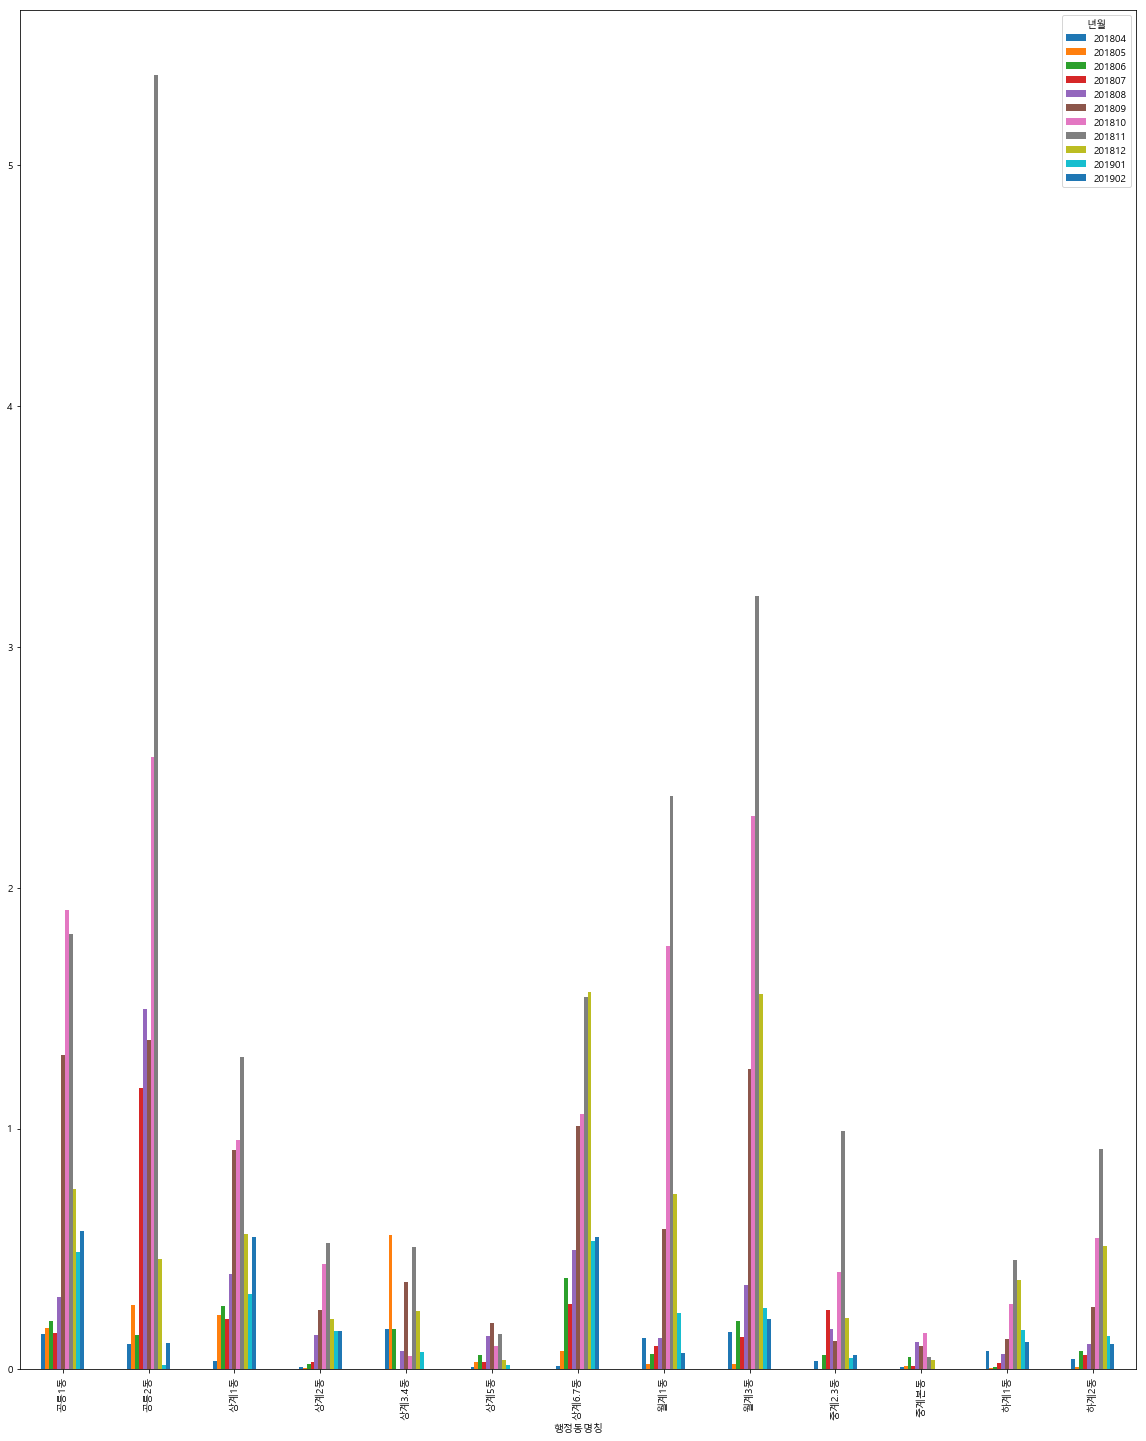

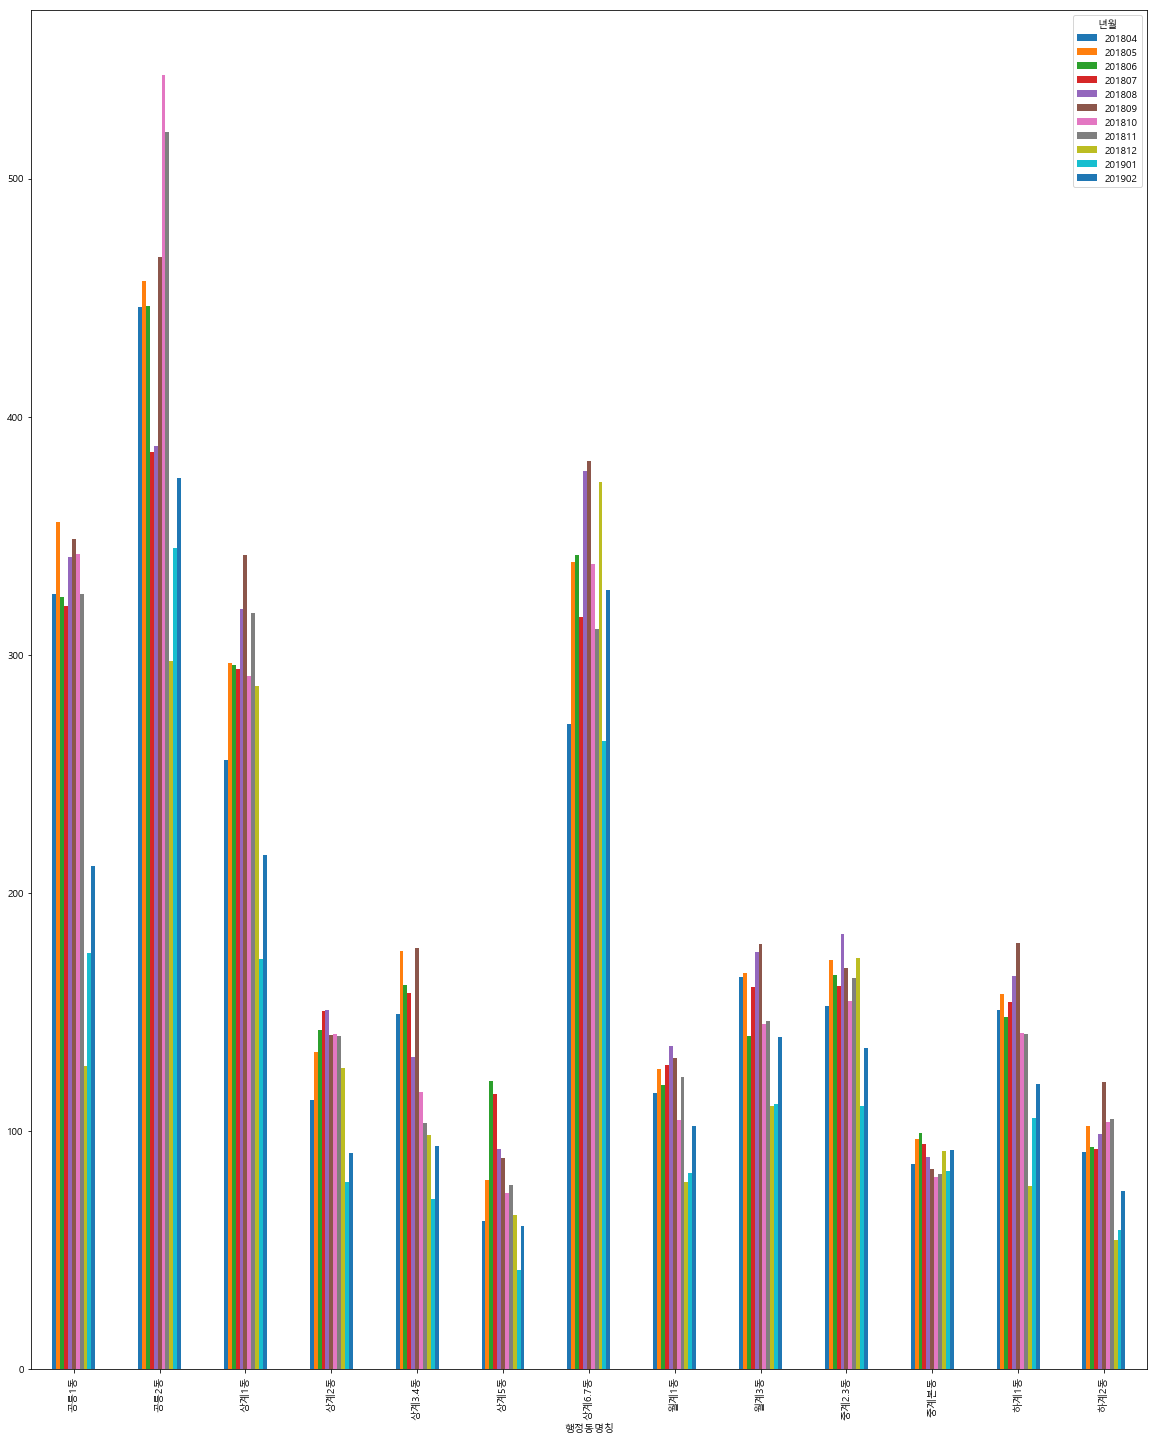

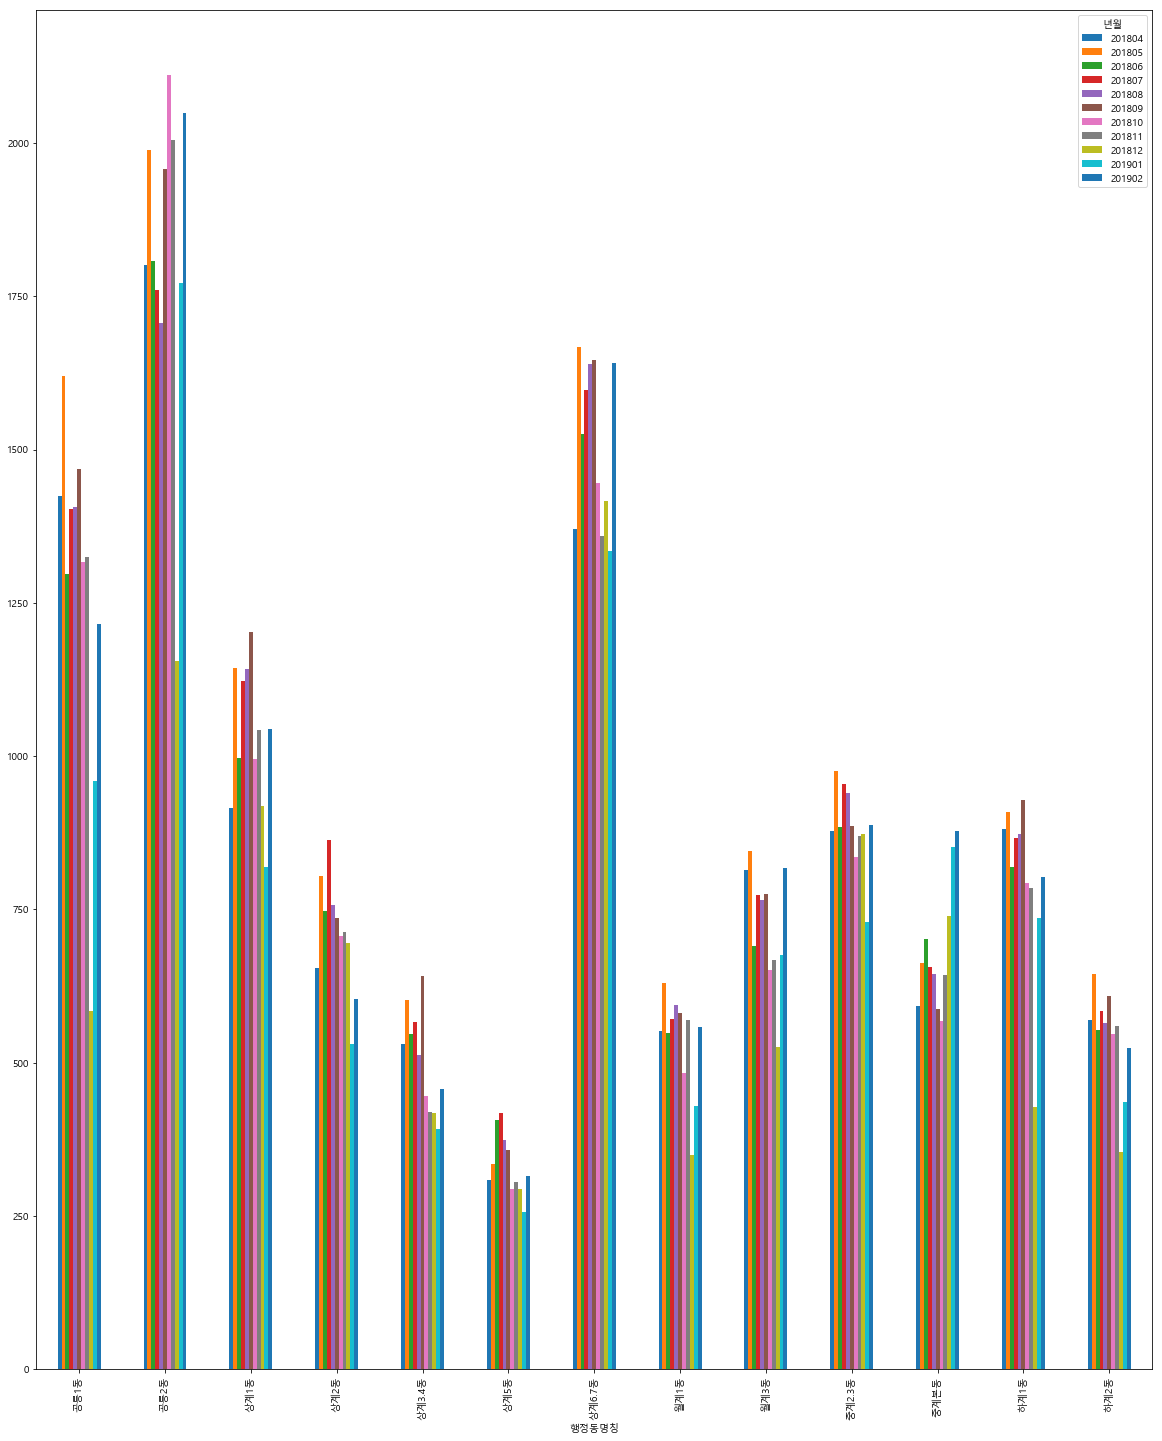

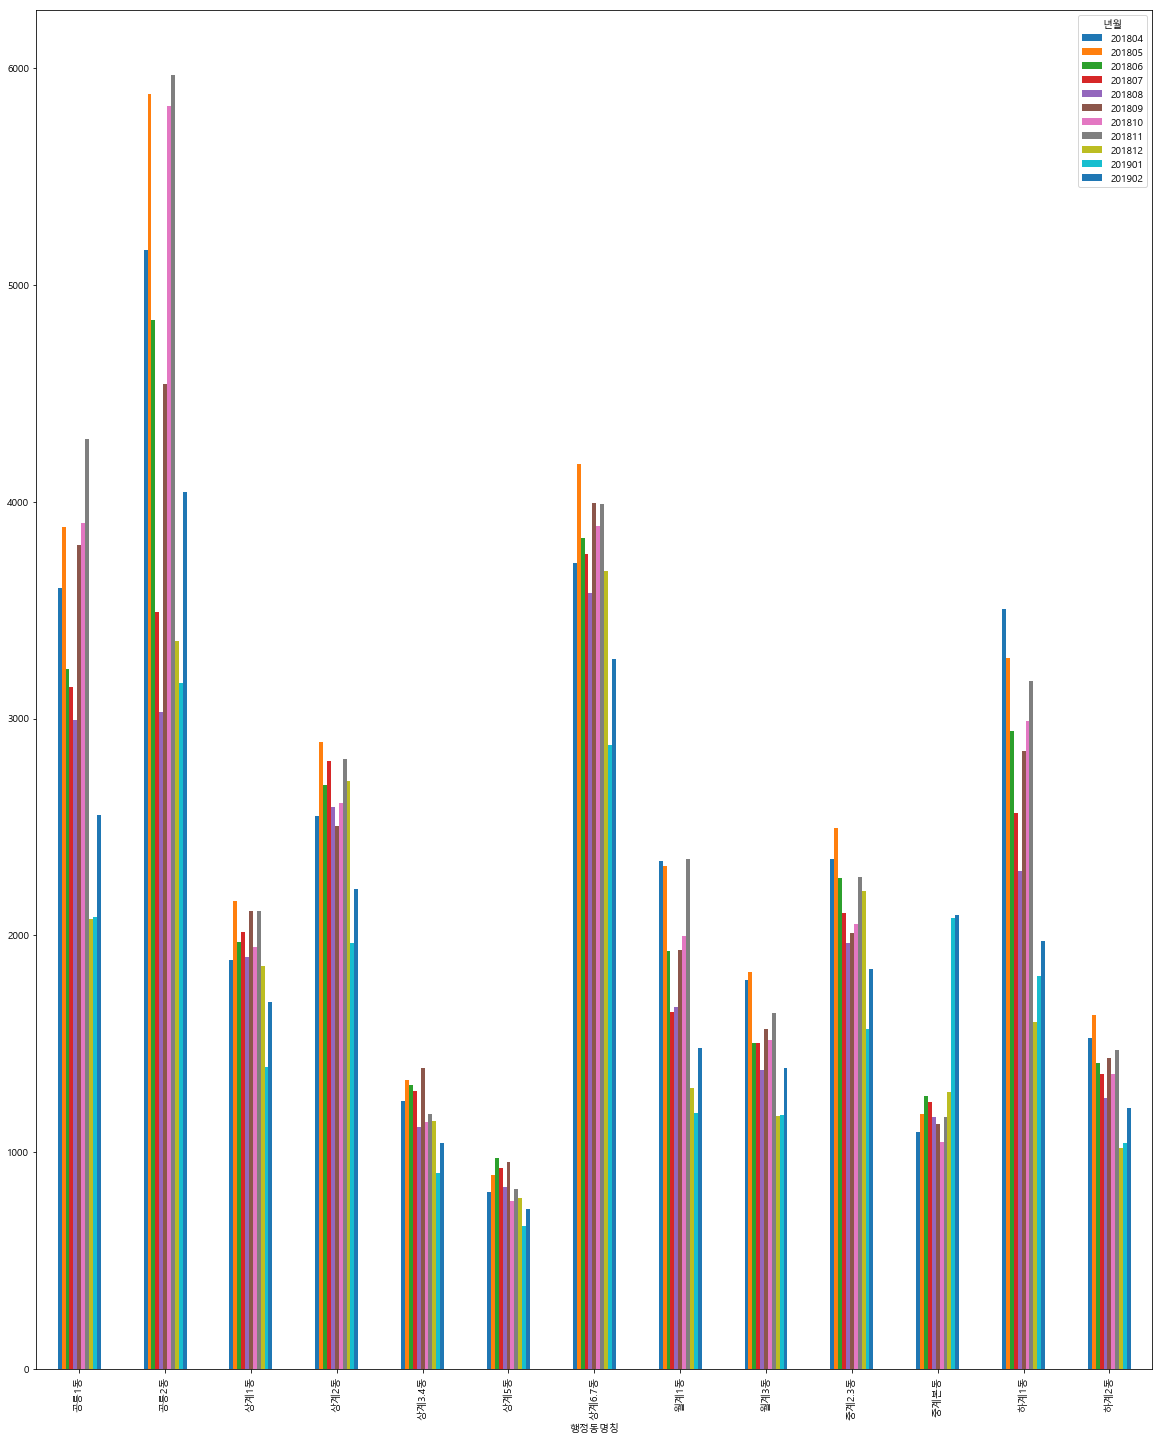

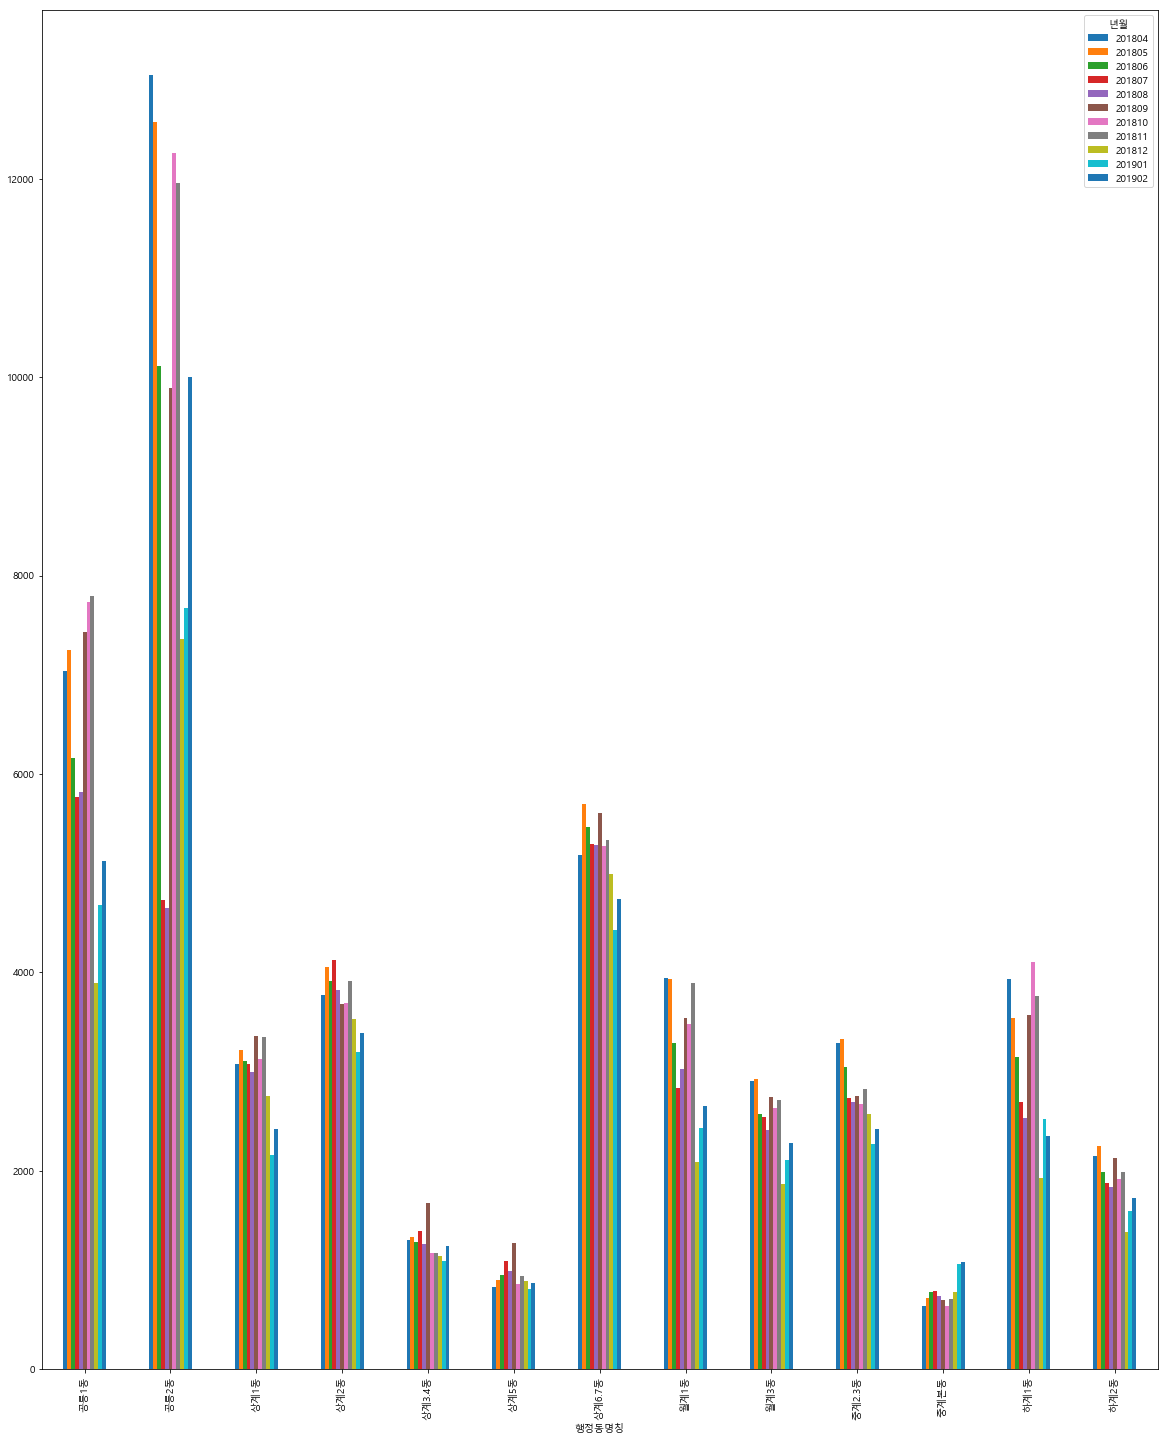

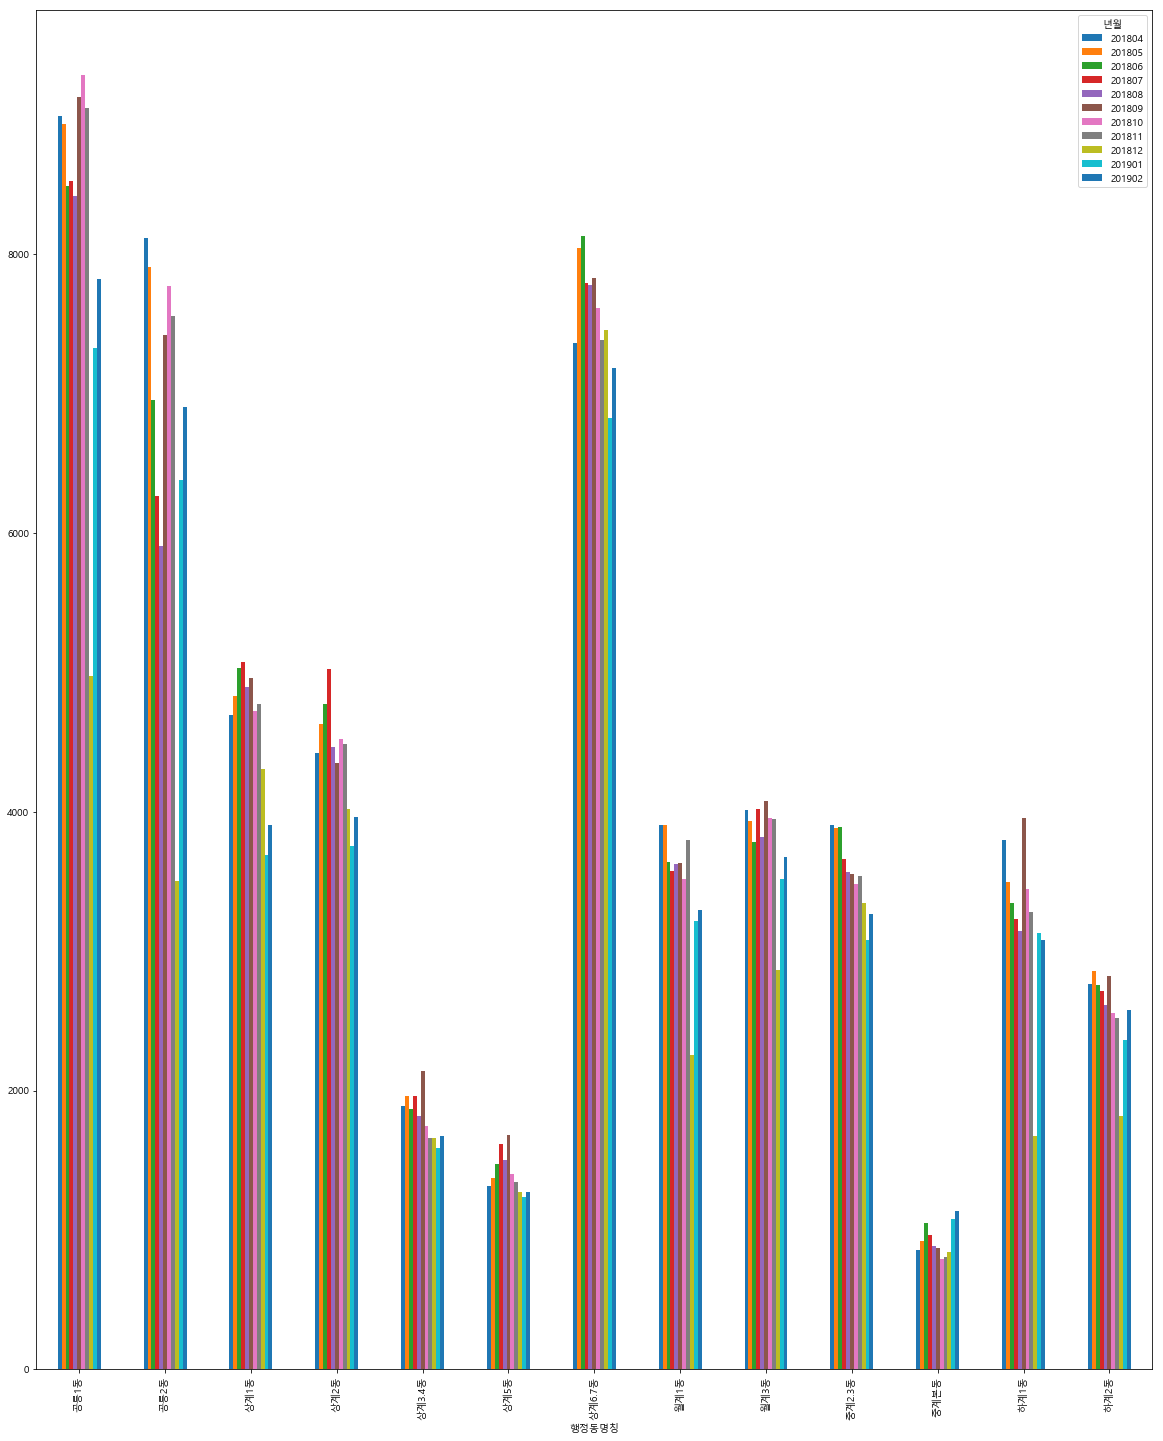

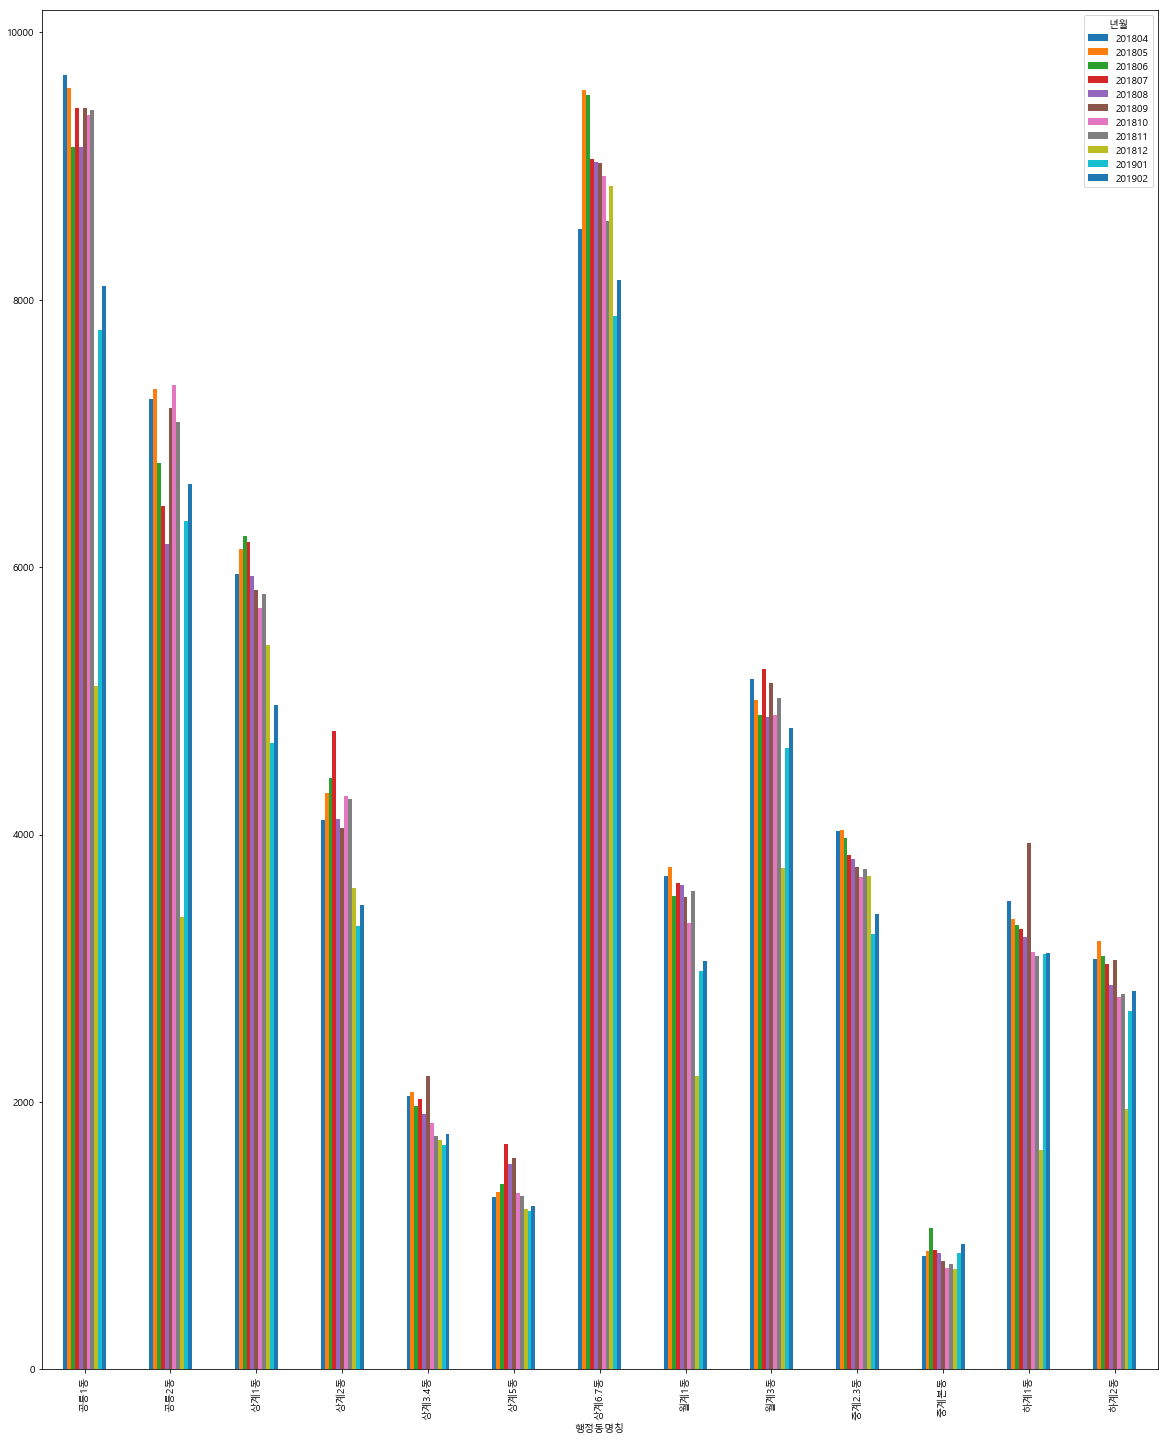

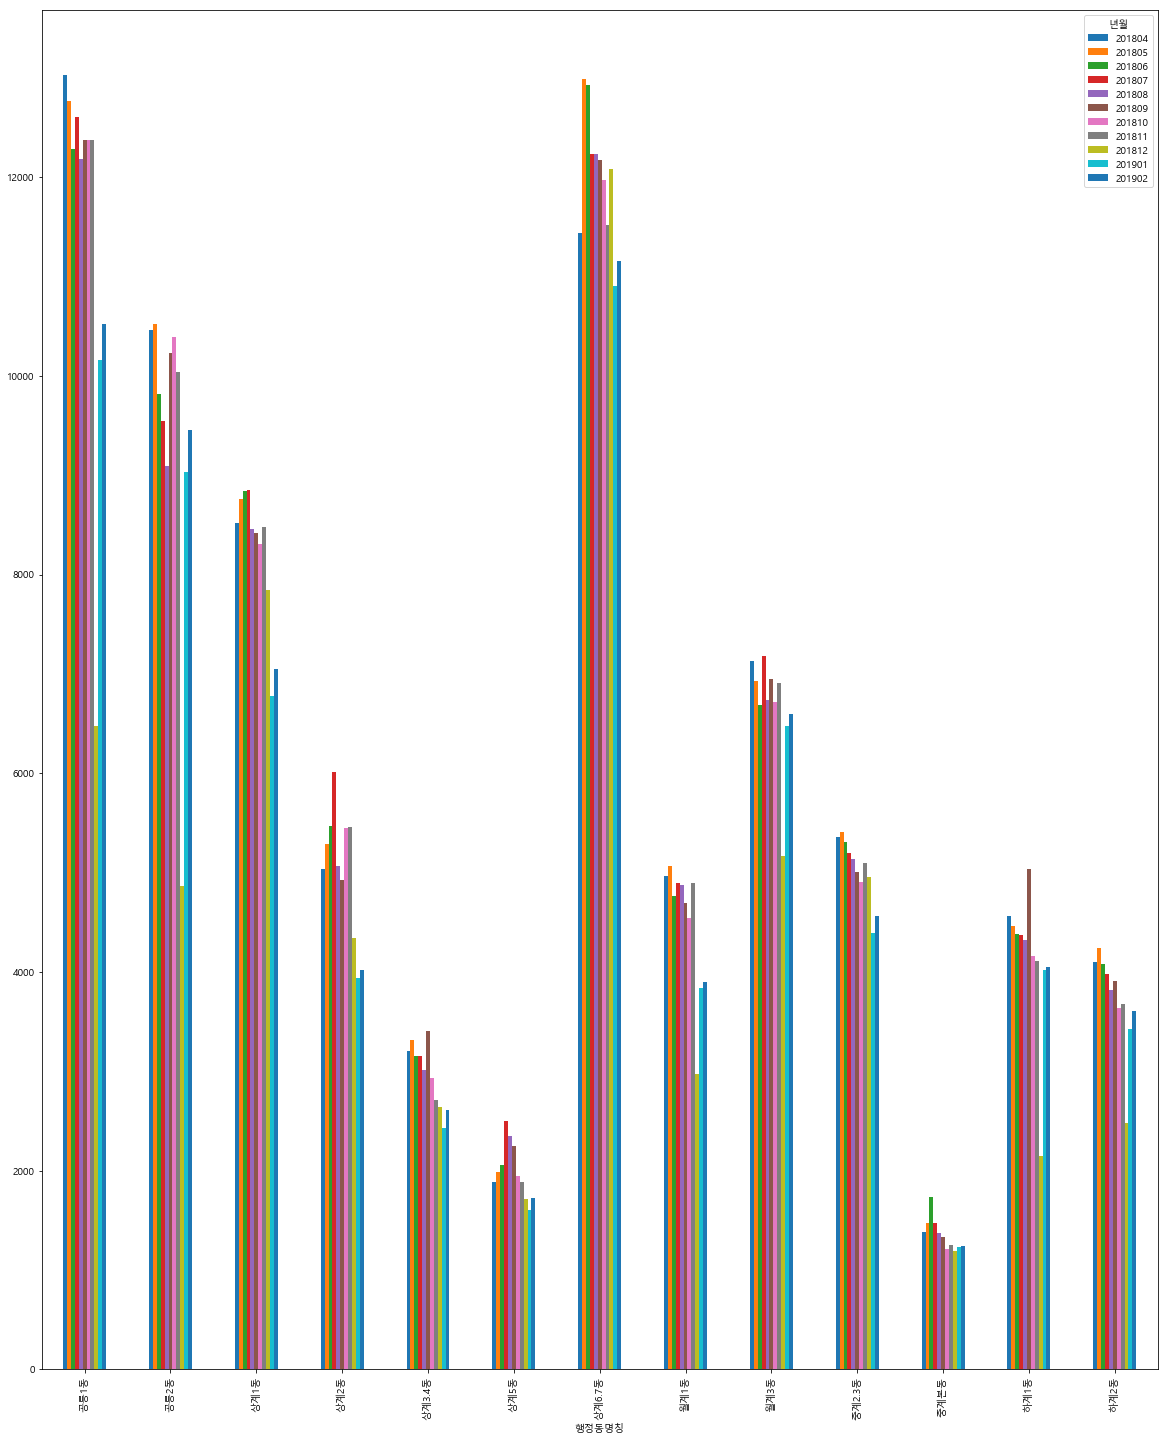

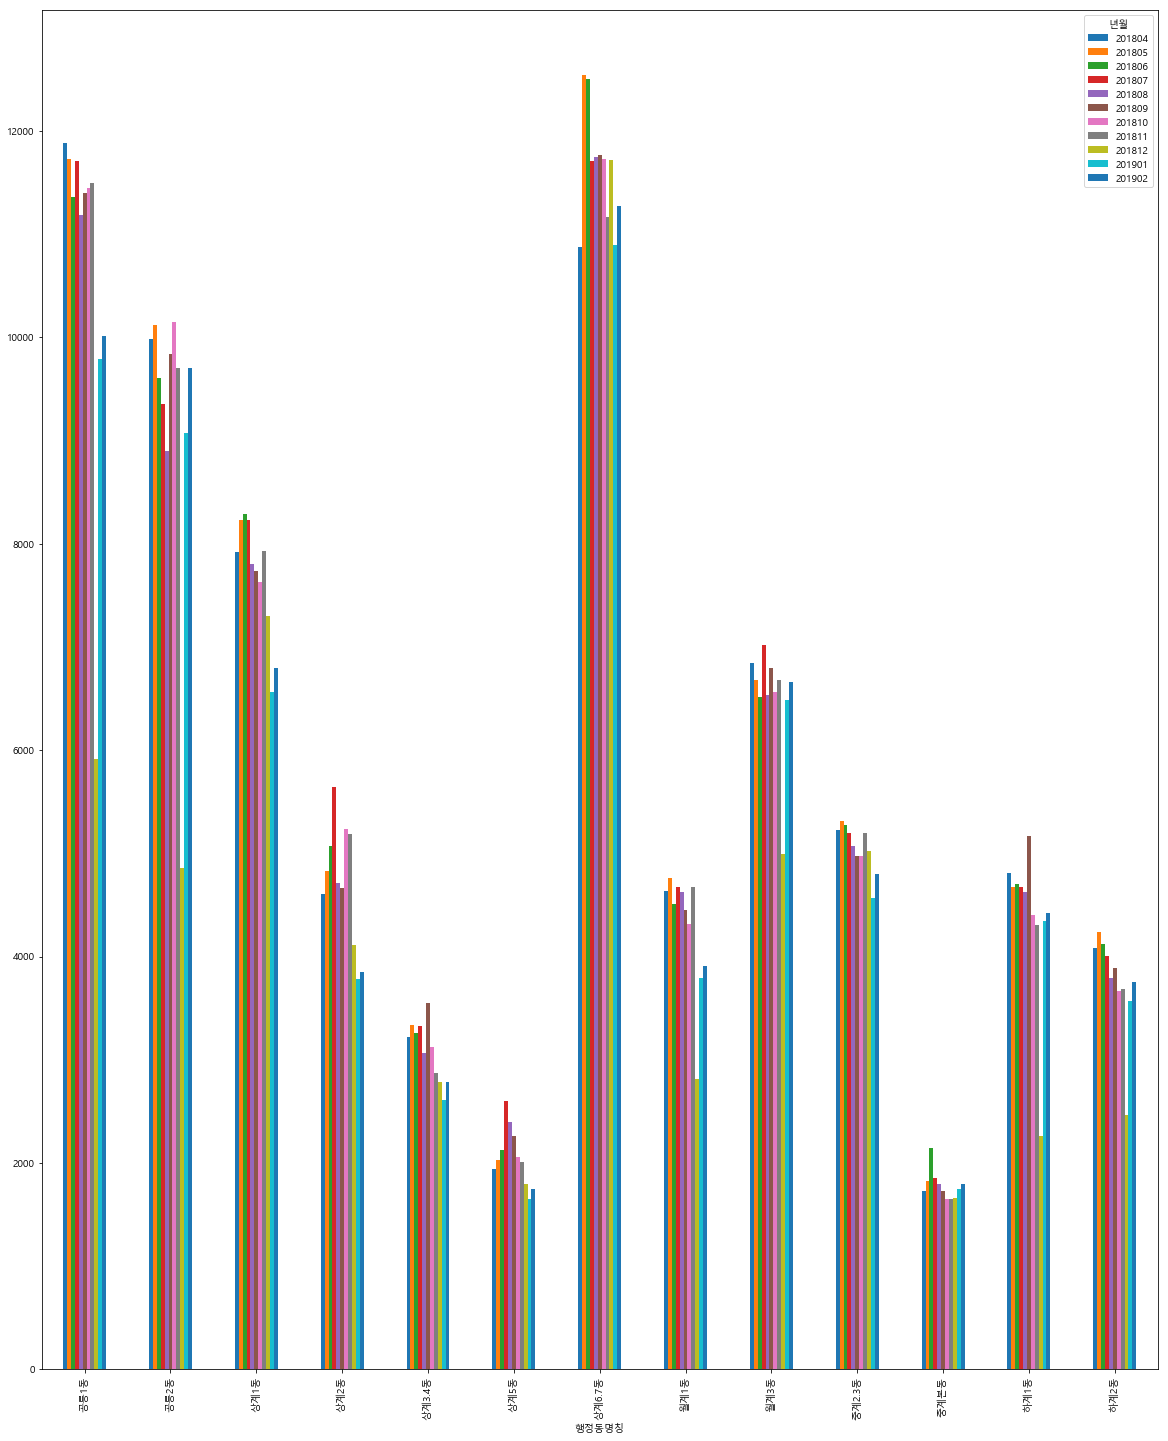

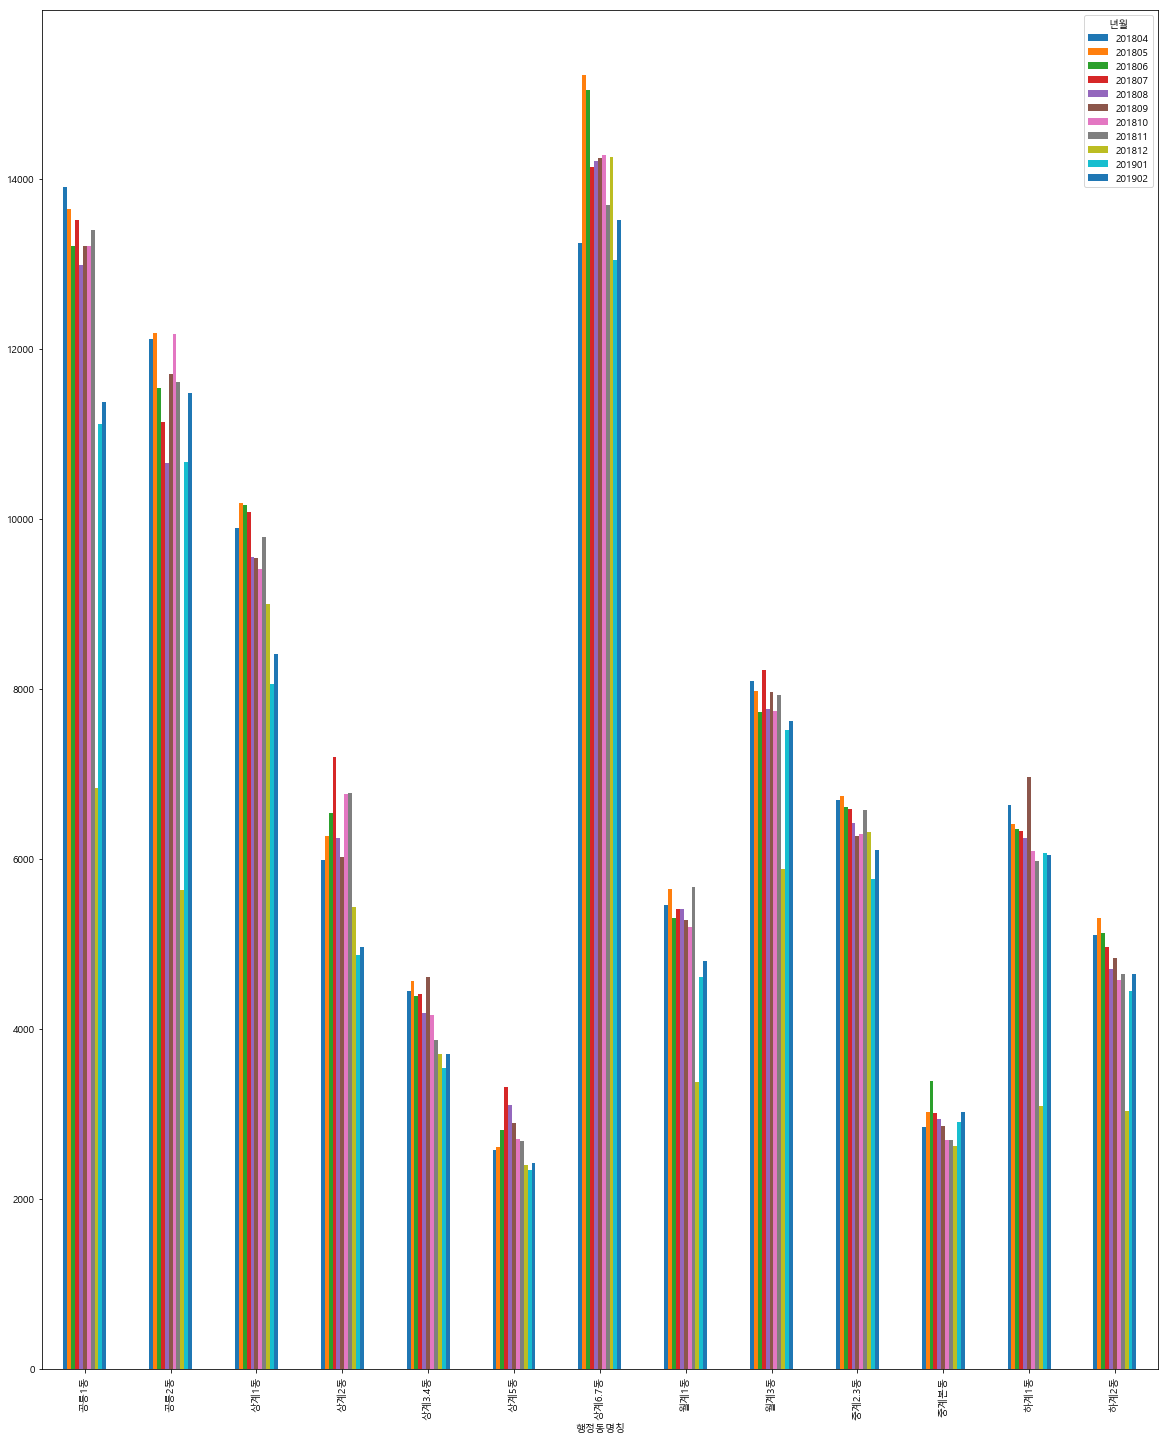

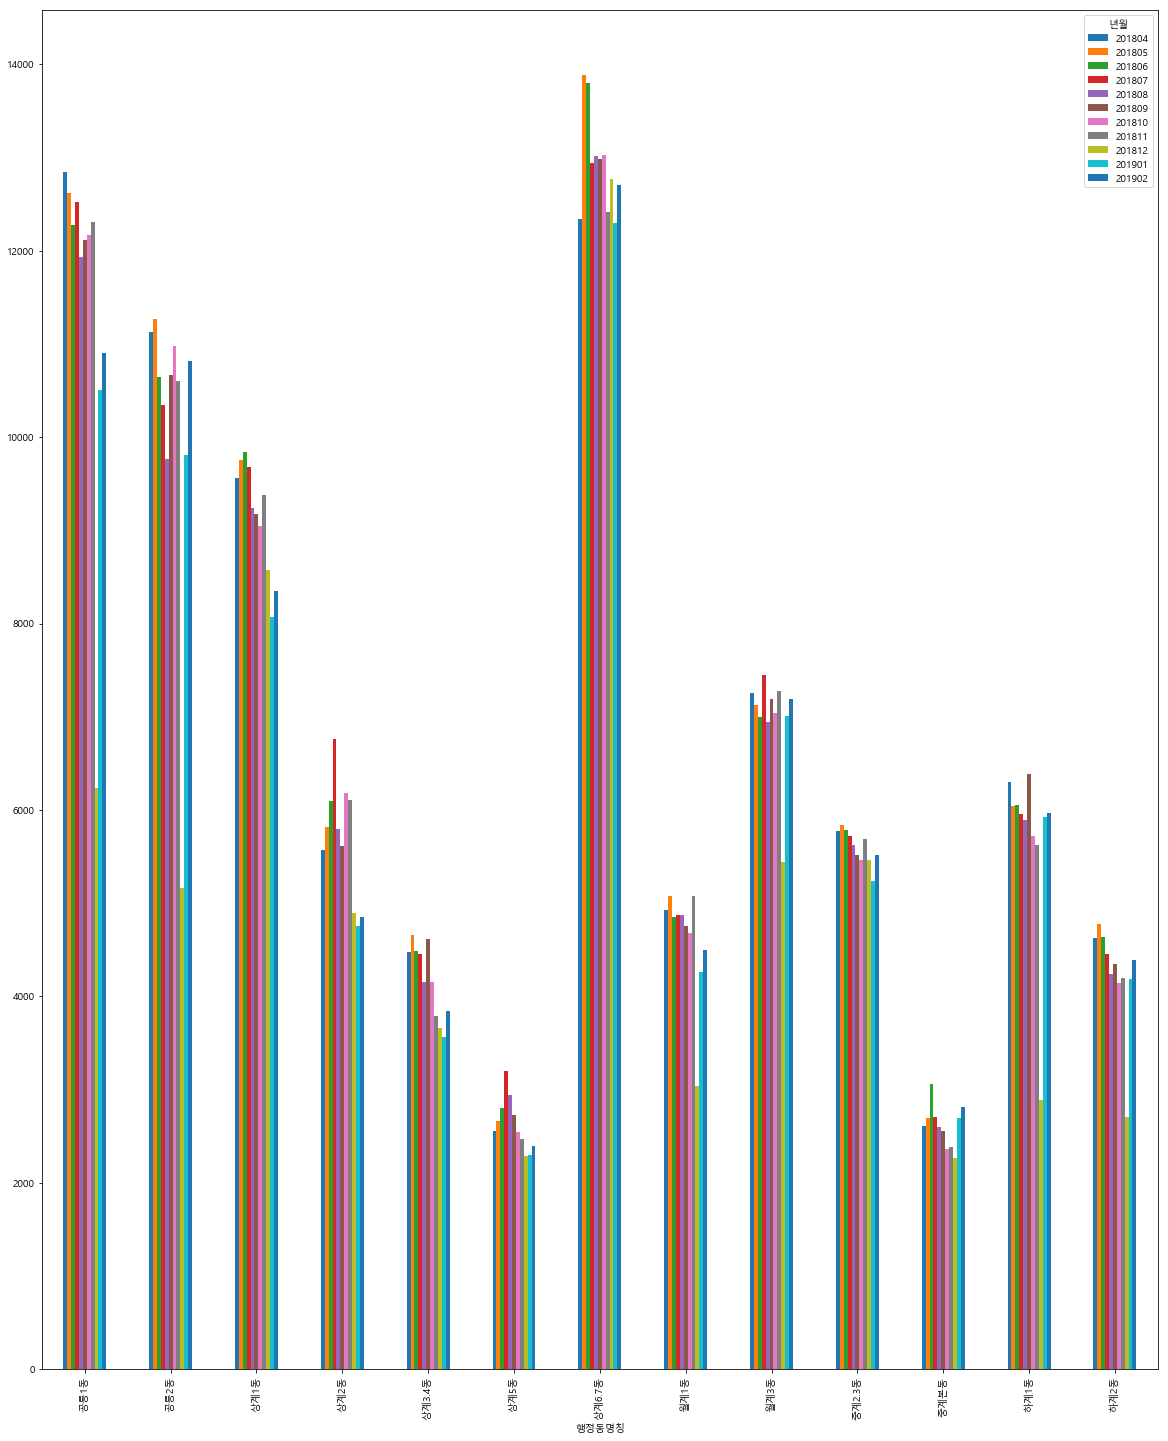

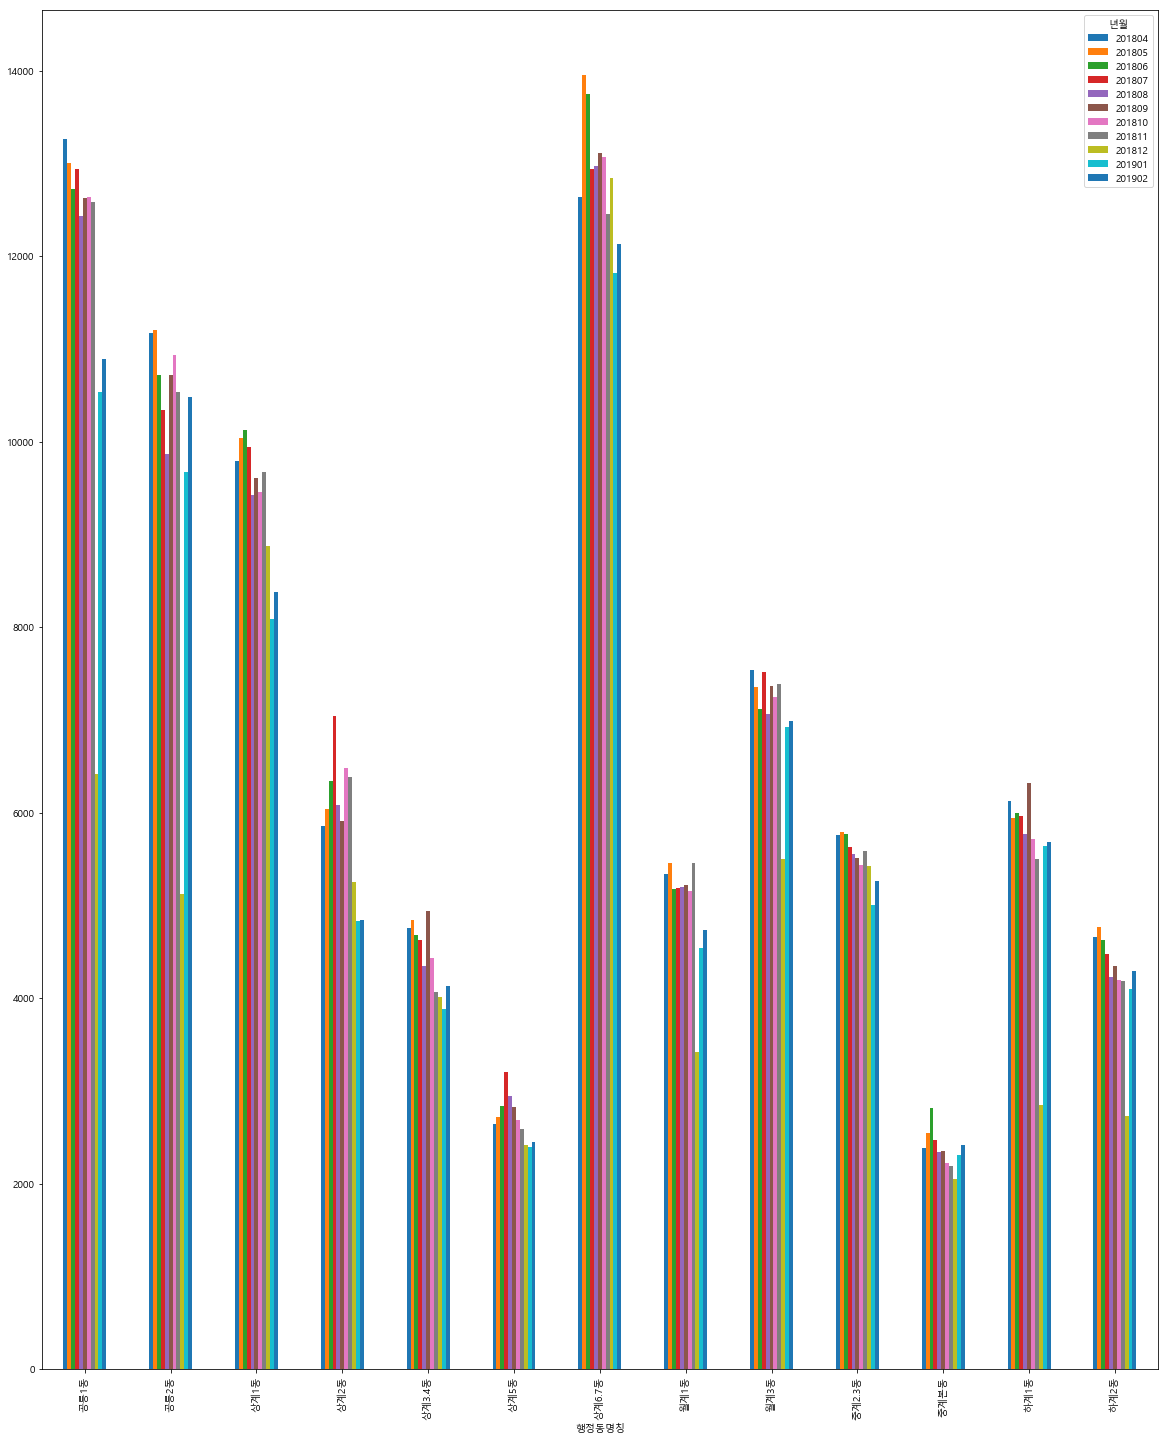

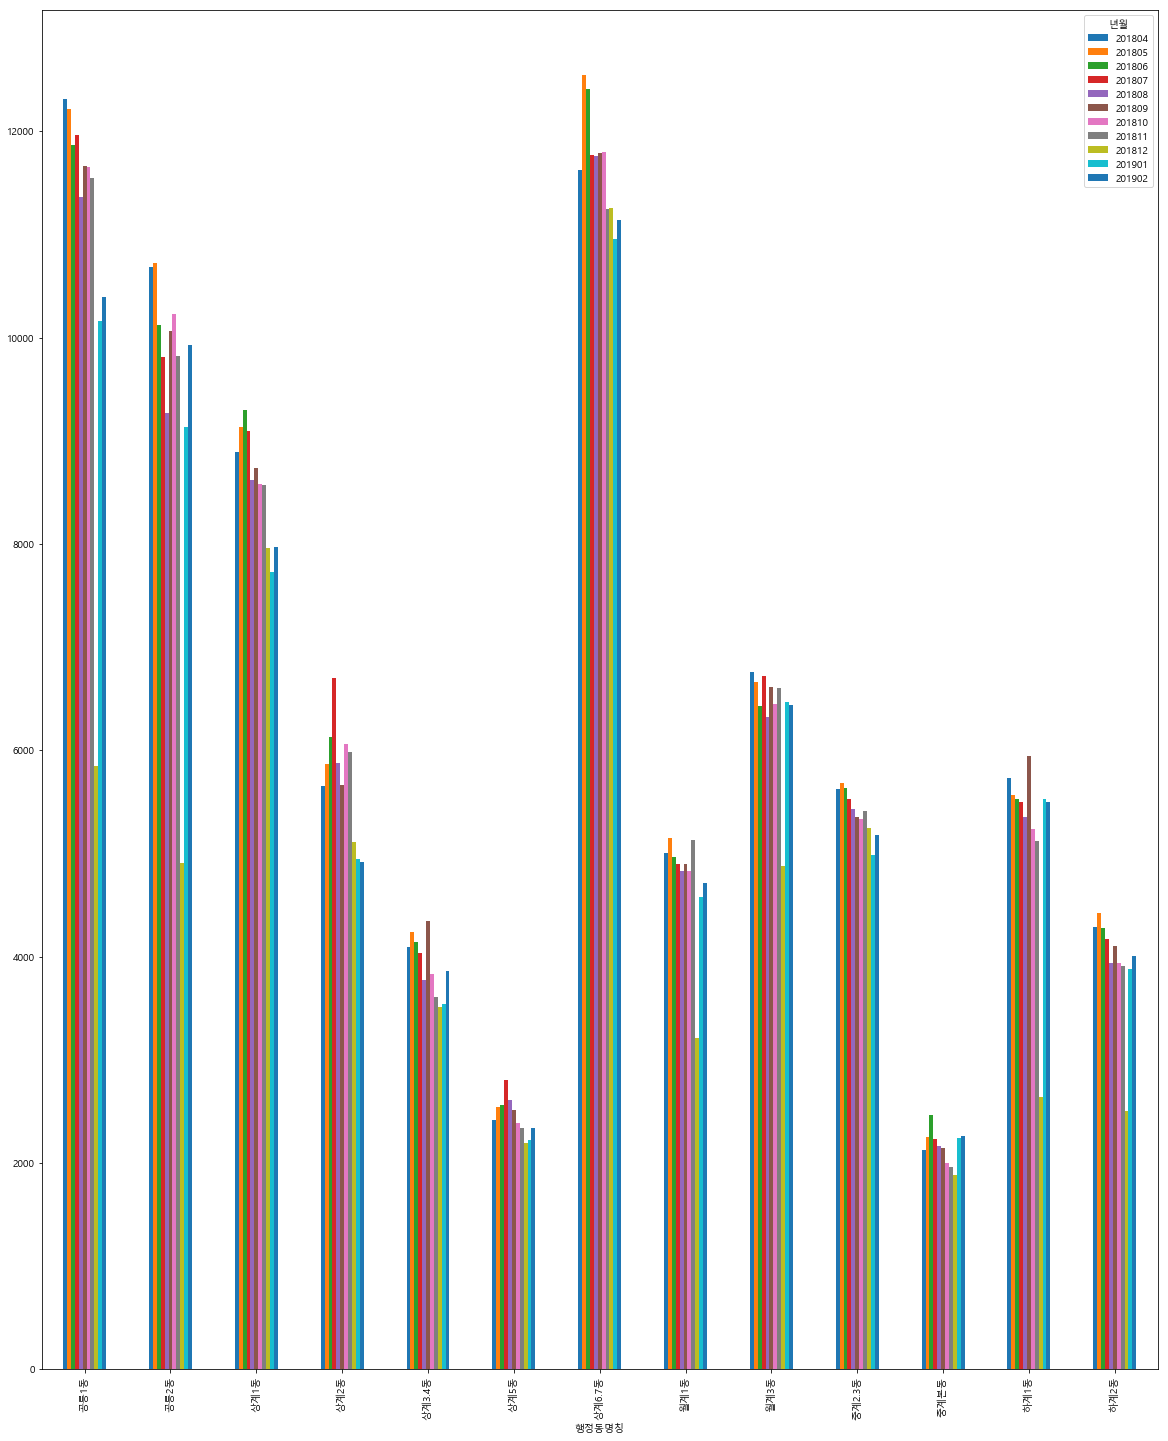

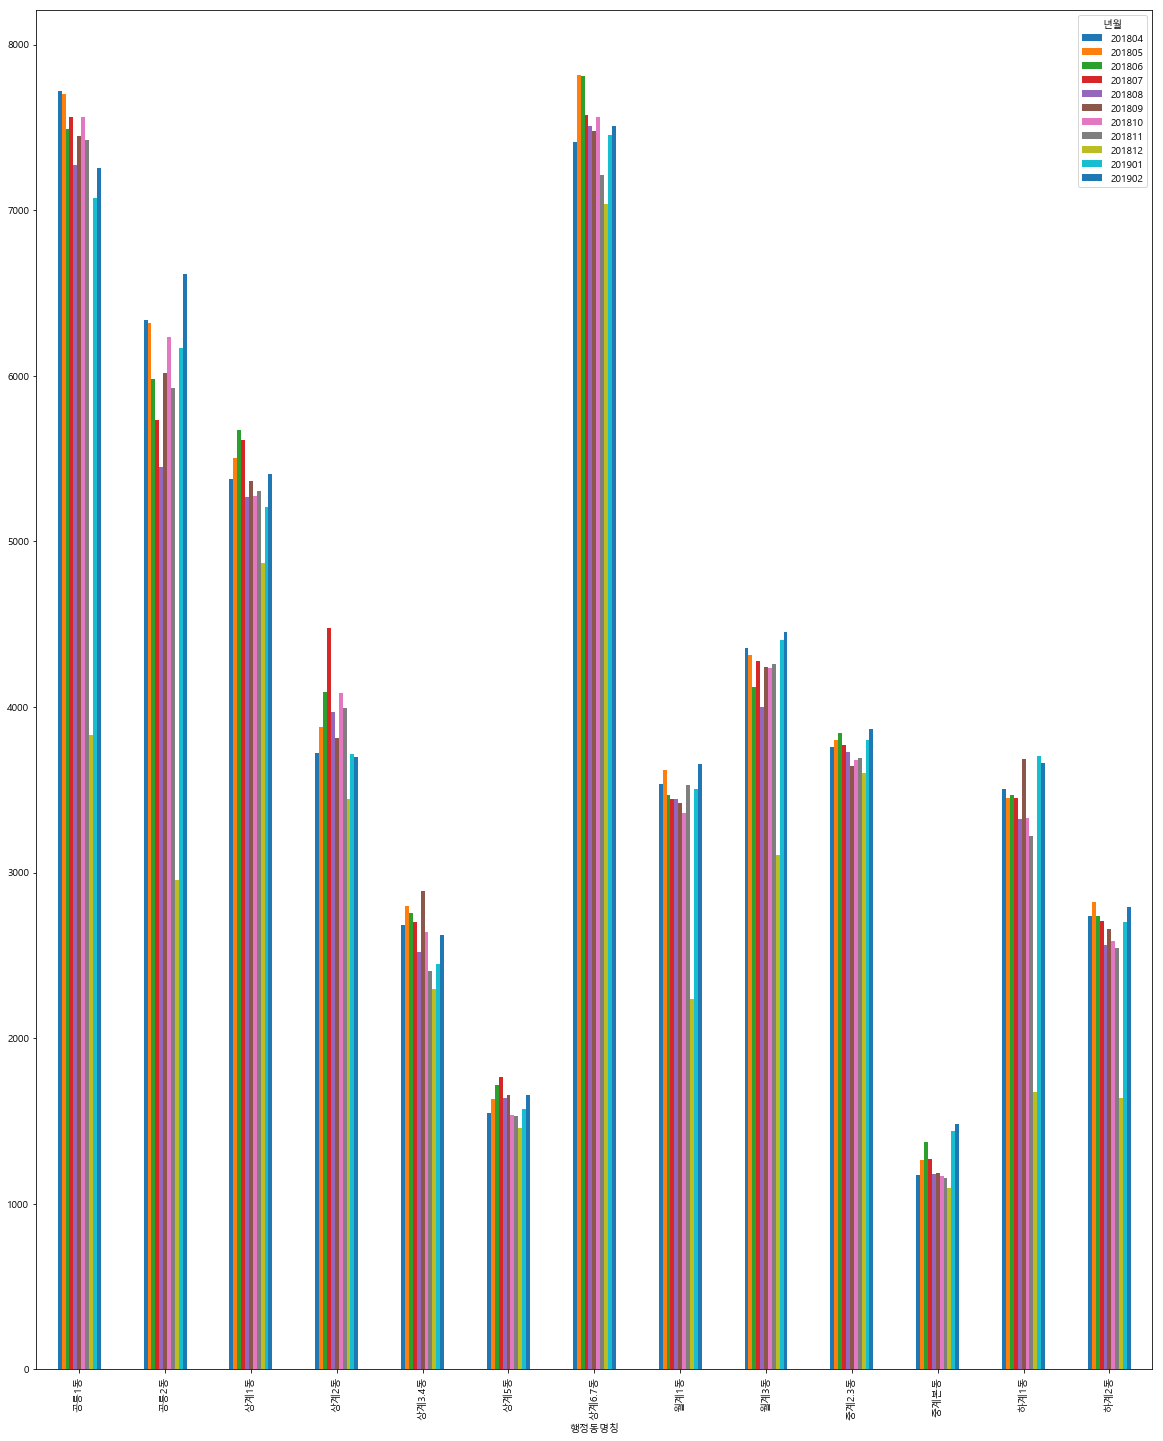

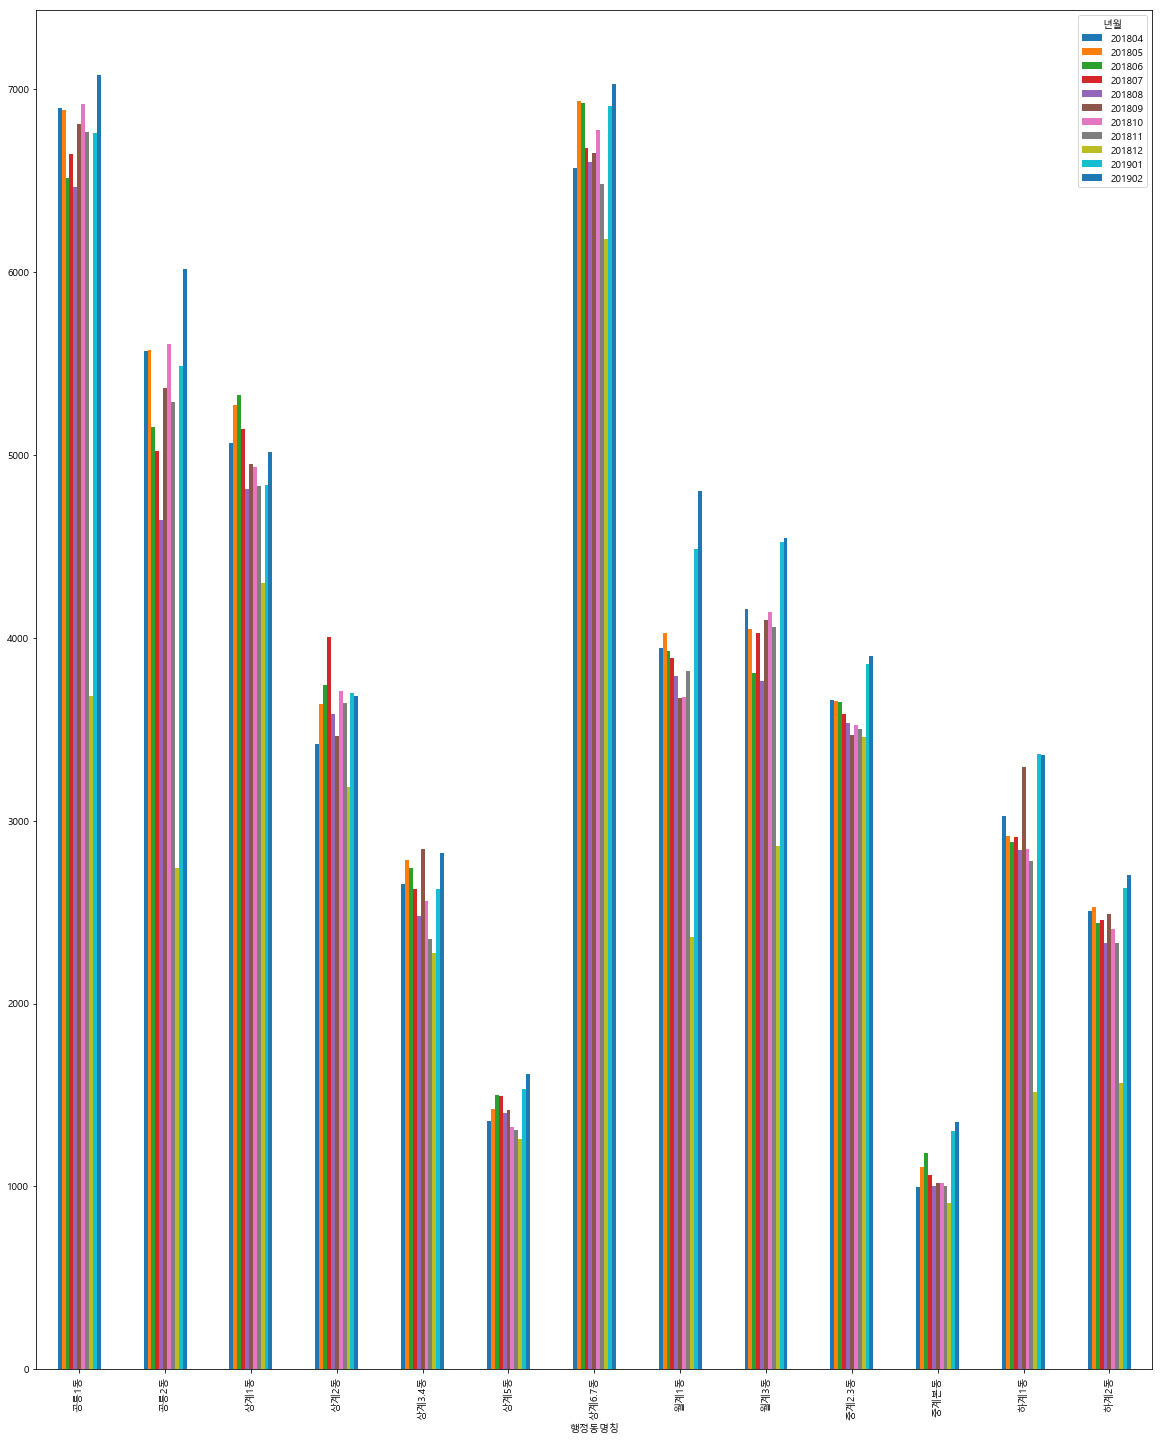

In [0]:
# 노원구_성연령유동인구 - 남자

iterables = ['남_0004', '남_0509', '남_1014',
                '남_1519', '남_2024', '남_2529',
                '남_3034','남_3539', '남_4044',
                '남_4549','남_5054', '남_5559',
                '남_6064','남_6569', '남_70이상']

for i in iterables:
    노원구 = 노원구_성연령유동인구.pivot_table(index='행정동명칭', columns='년월',
                        aggfunc='mean',
                        values=i)
    노원구.plot(kind='bar', figsize=(20,25))

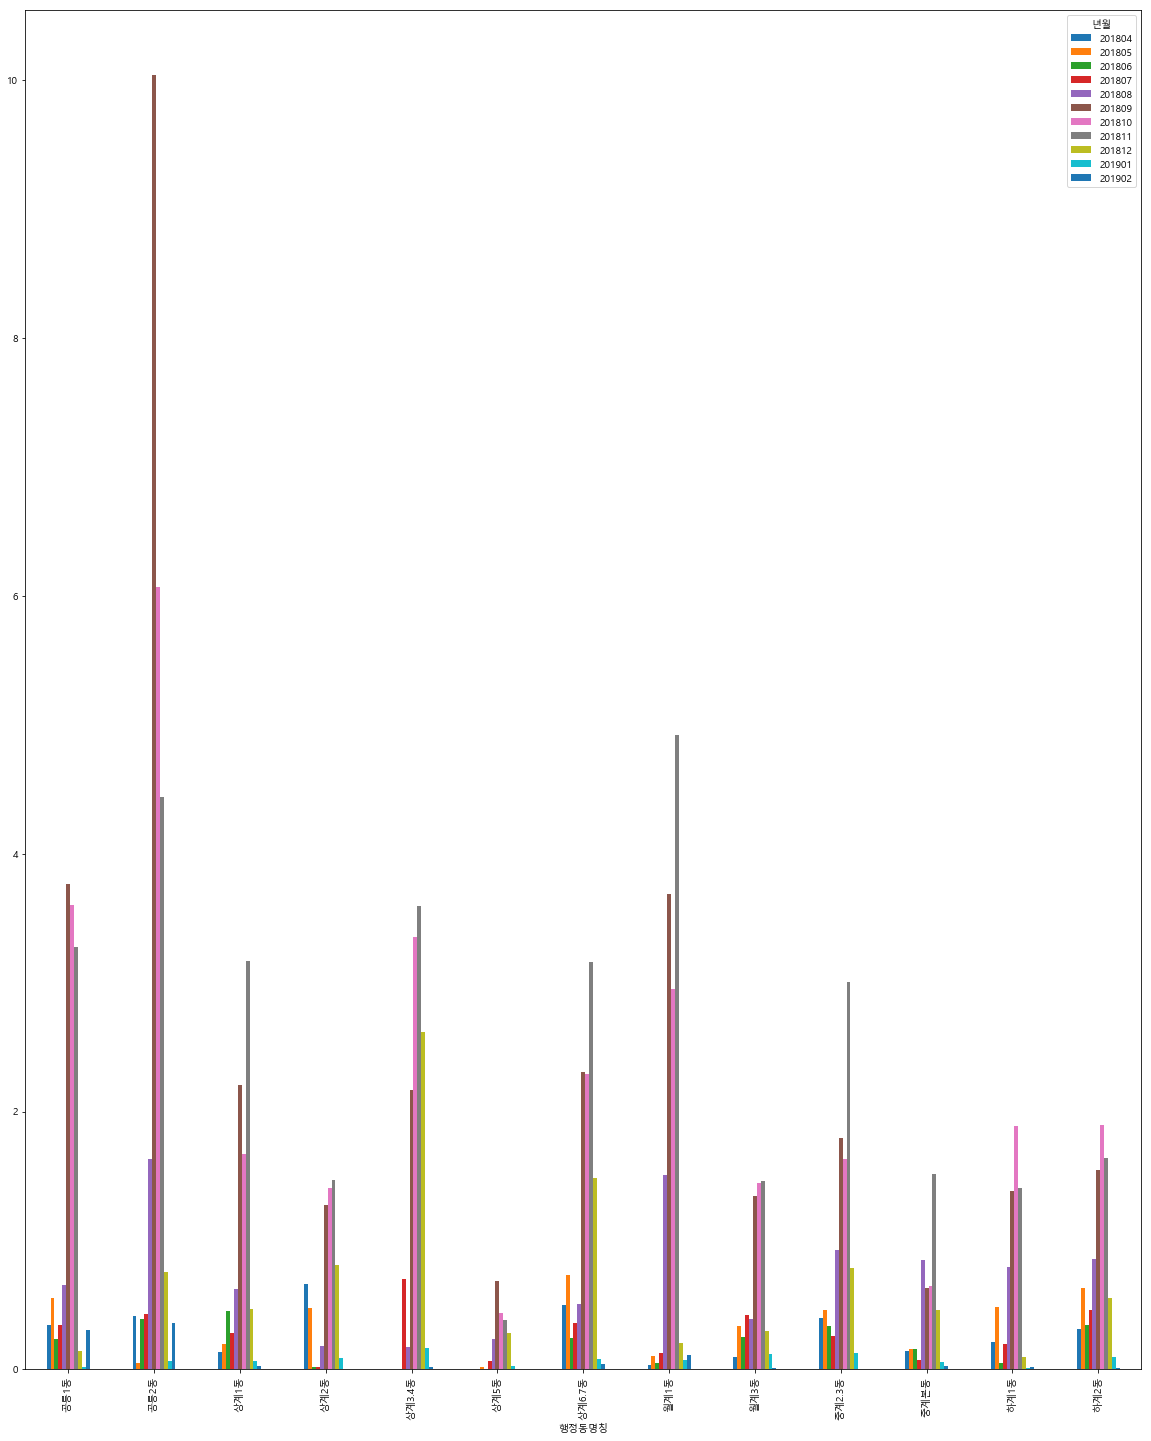

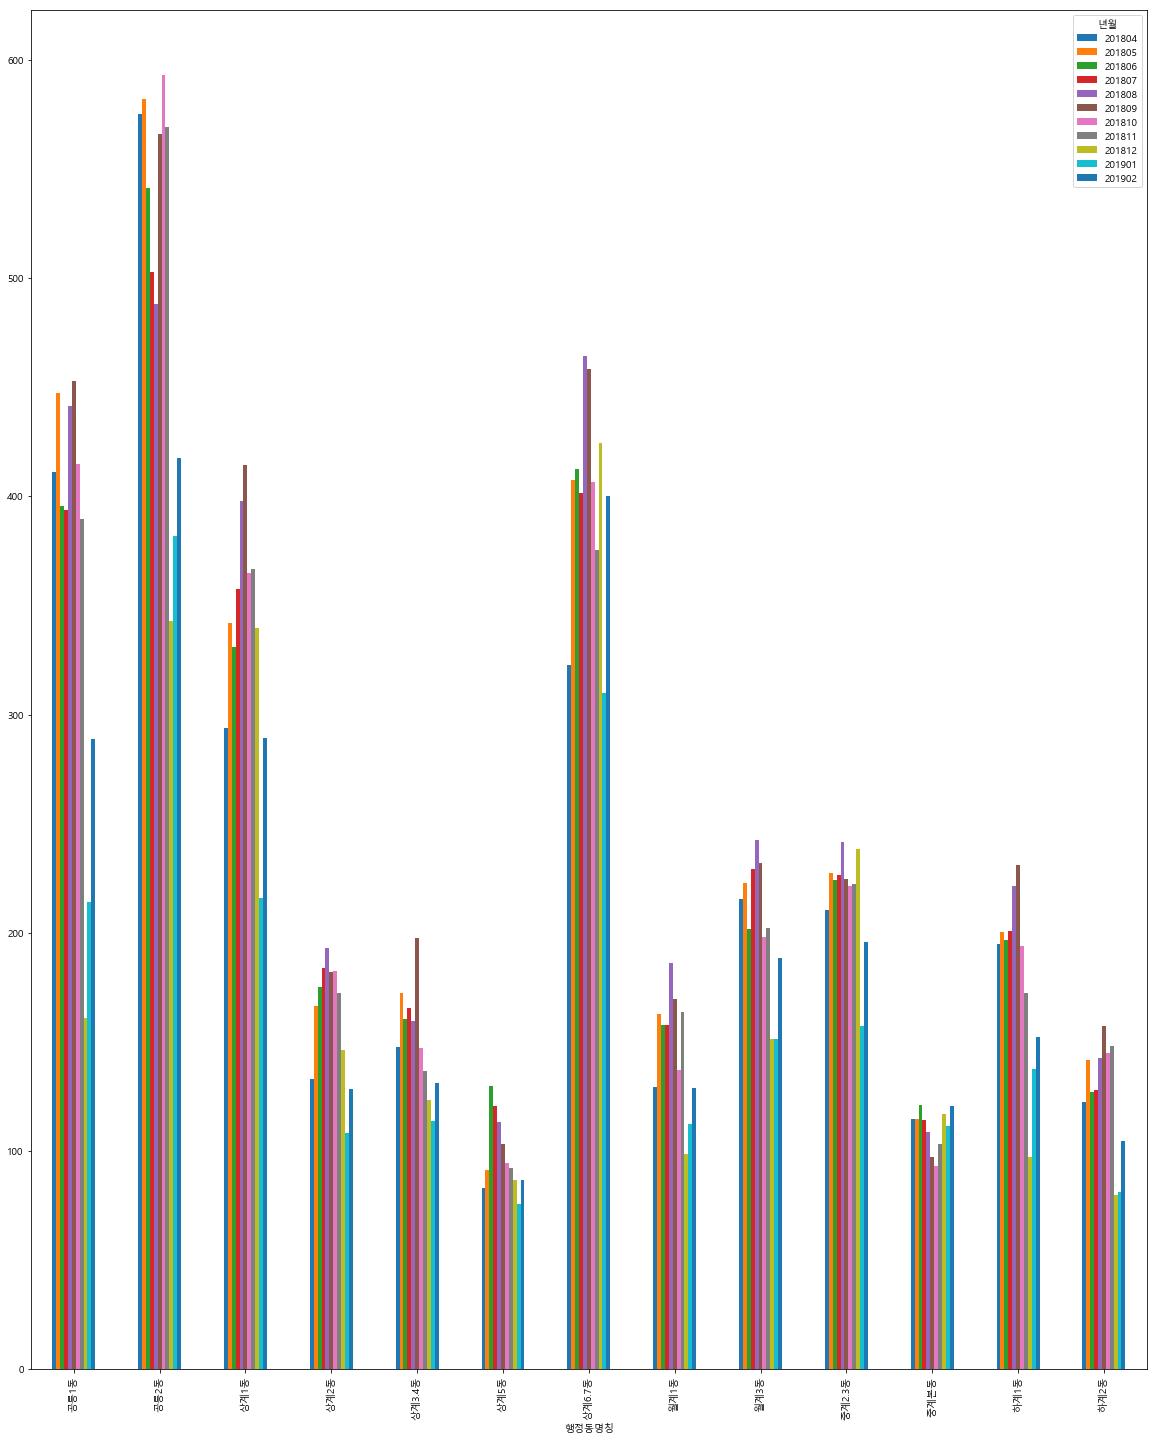

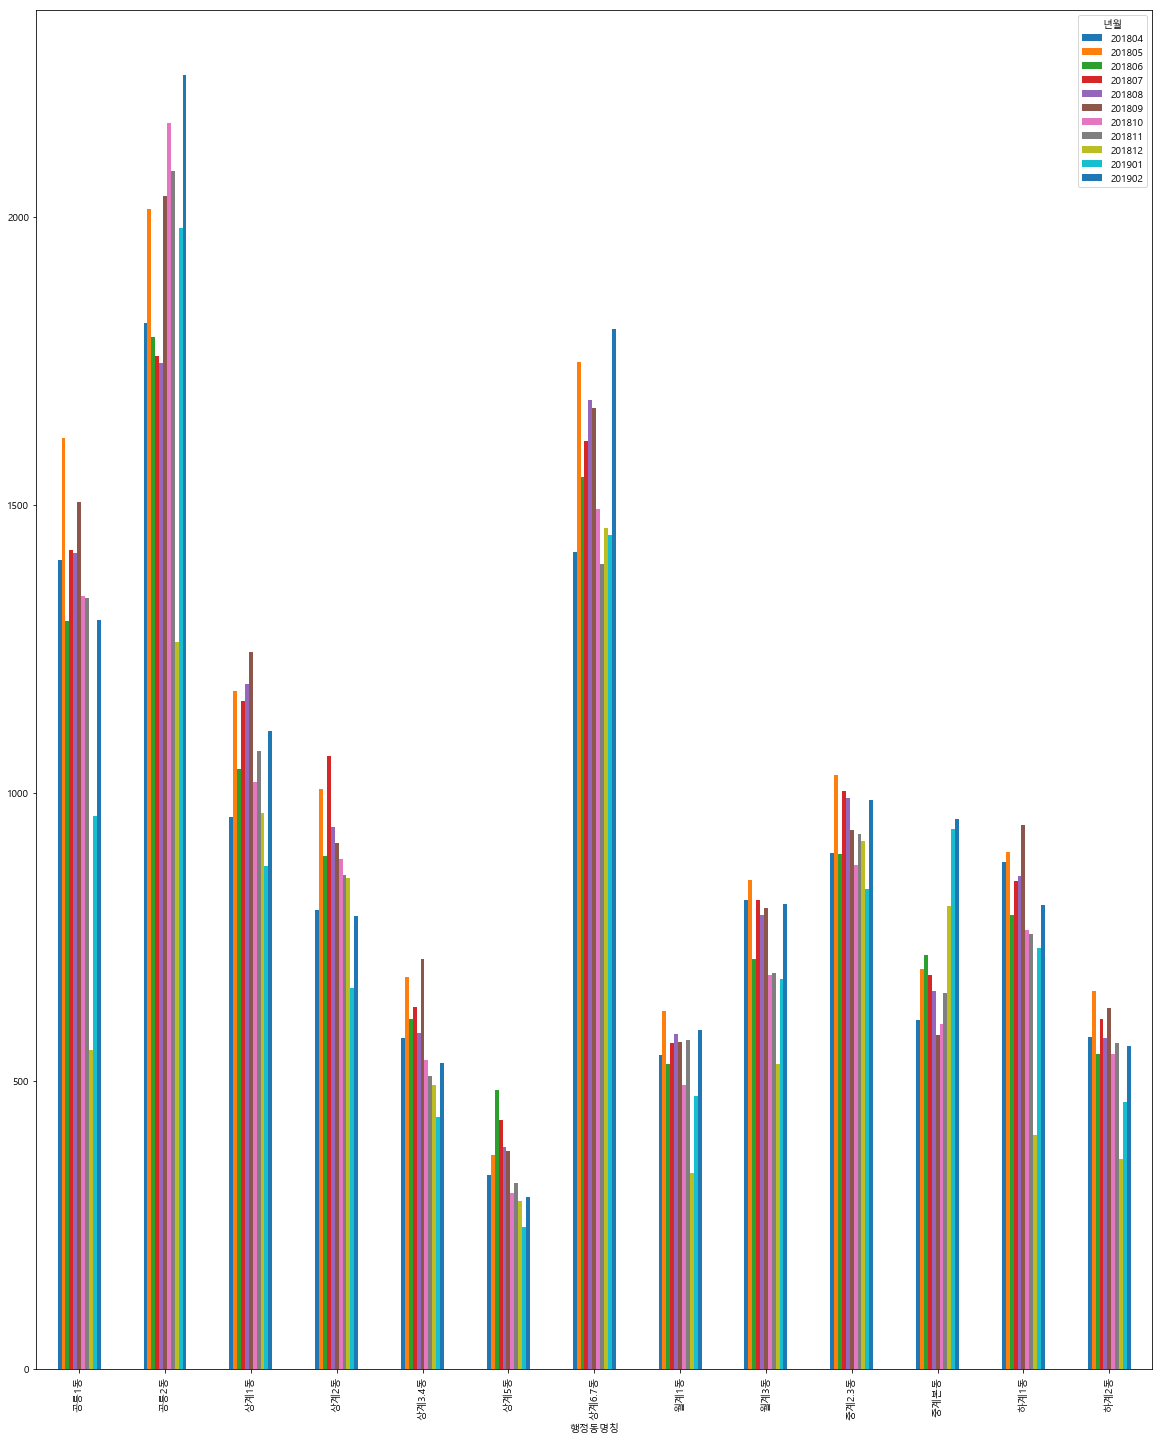

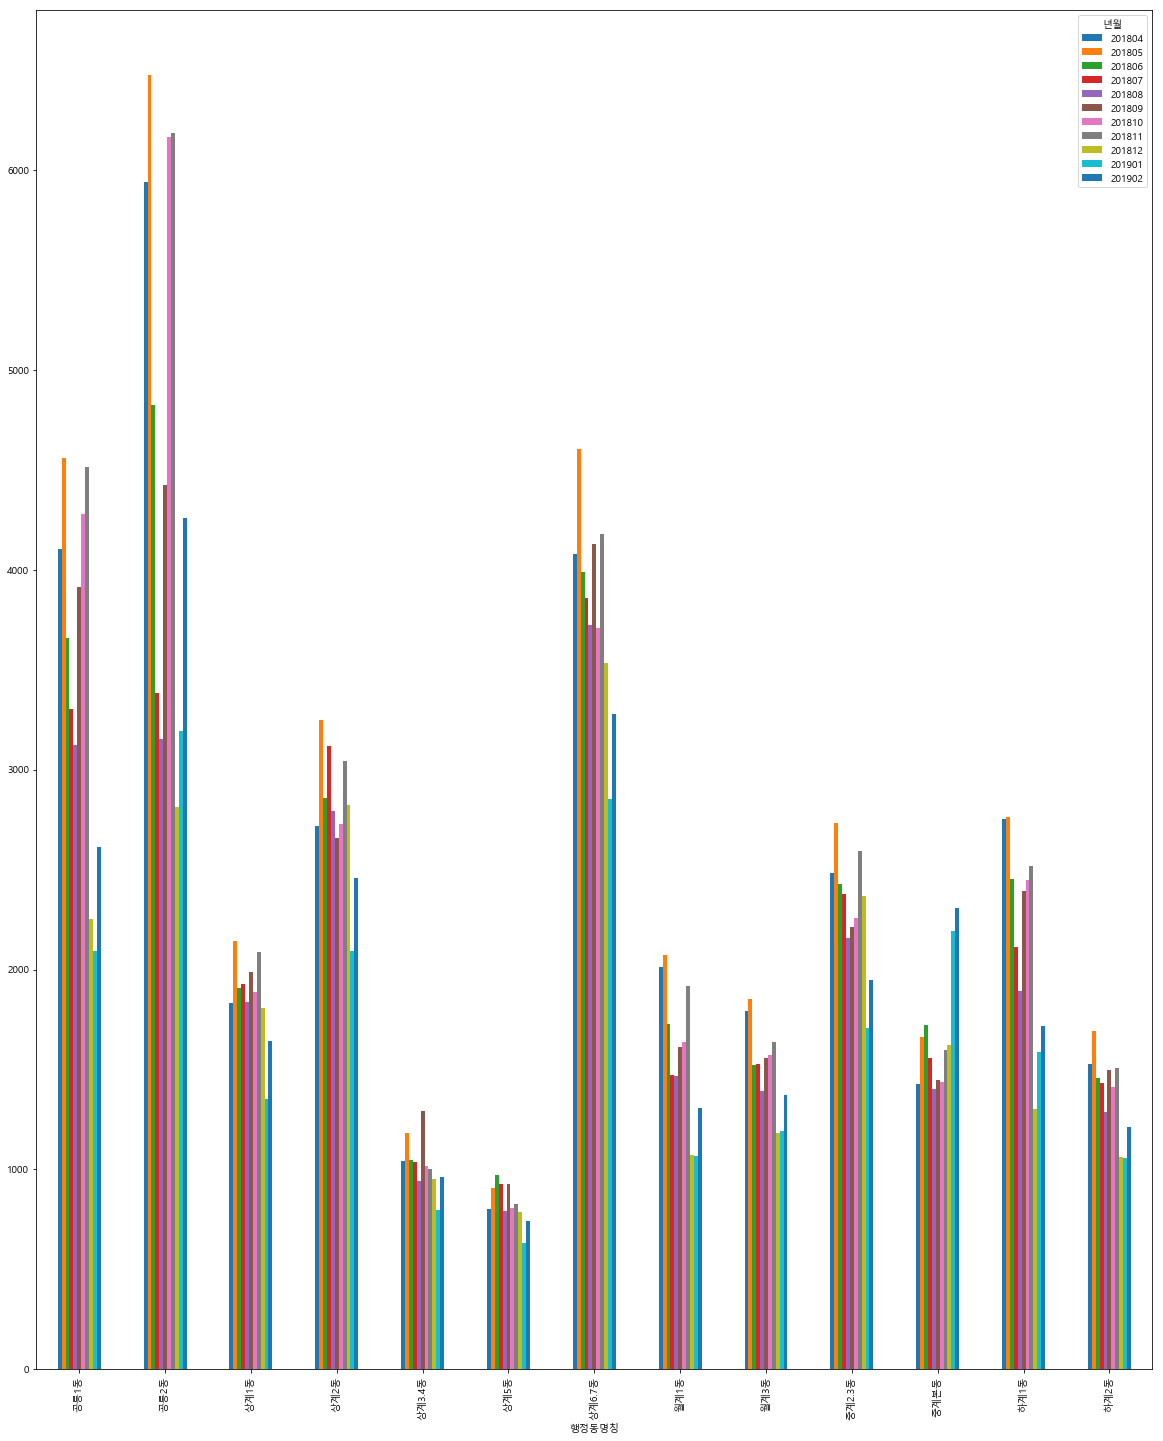

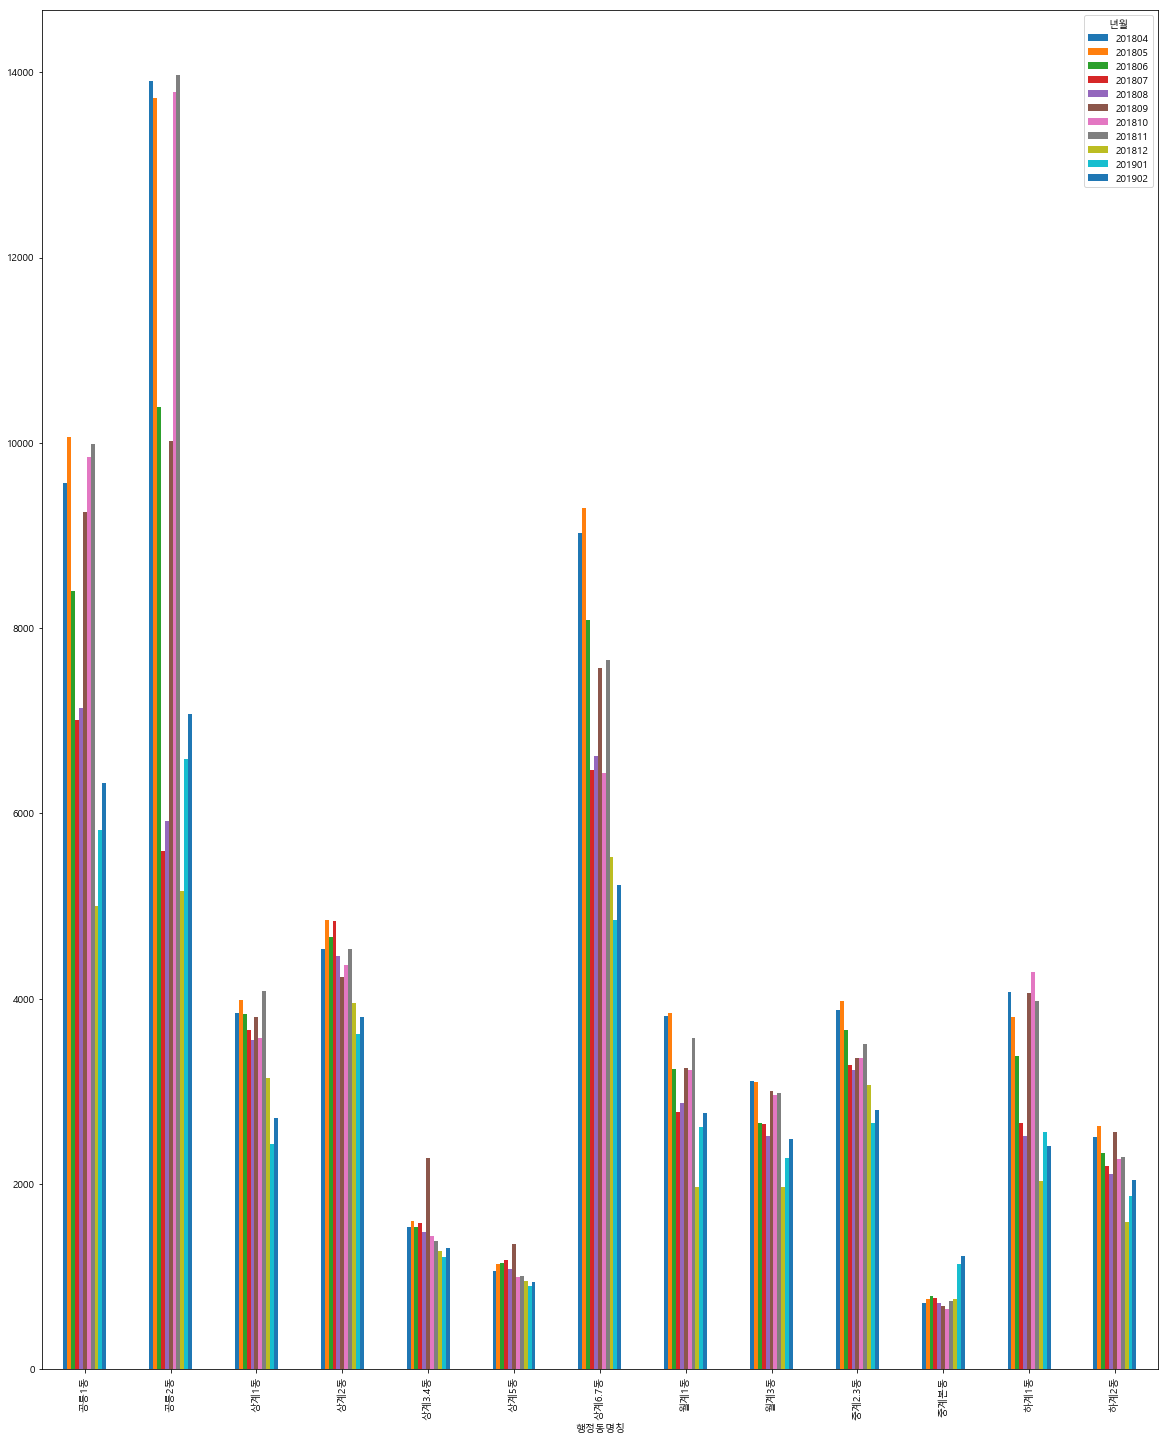

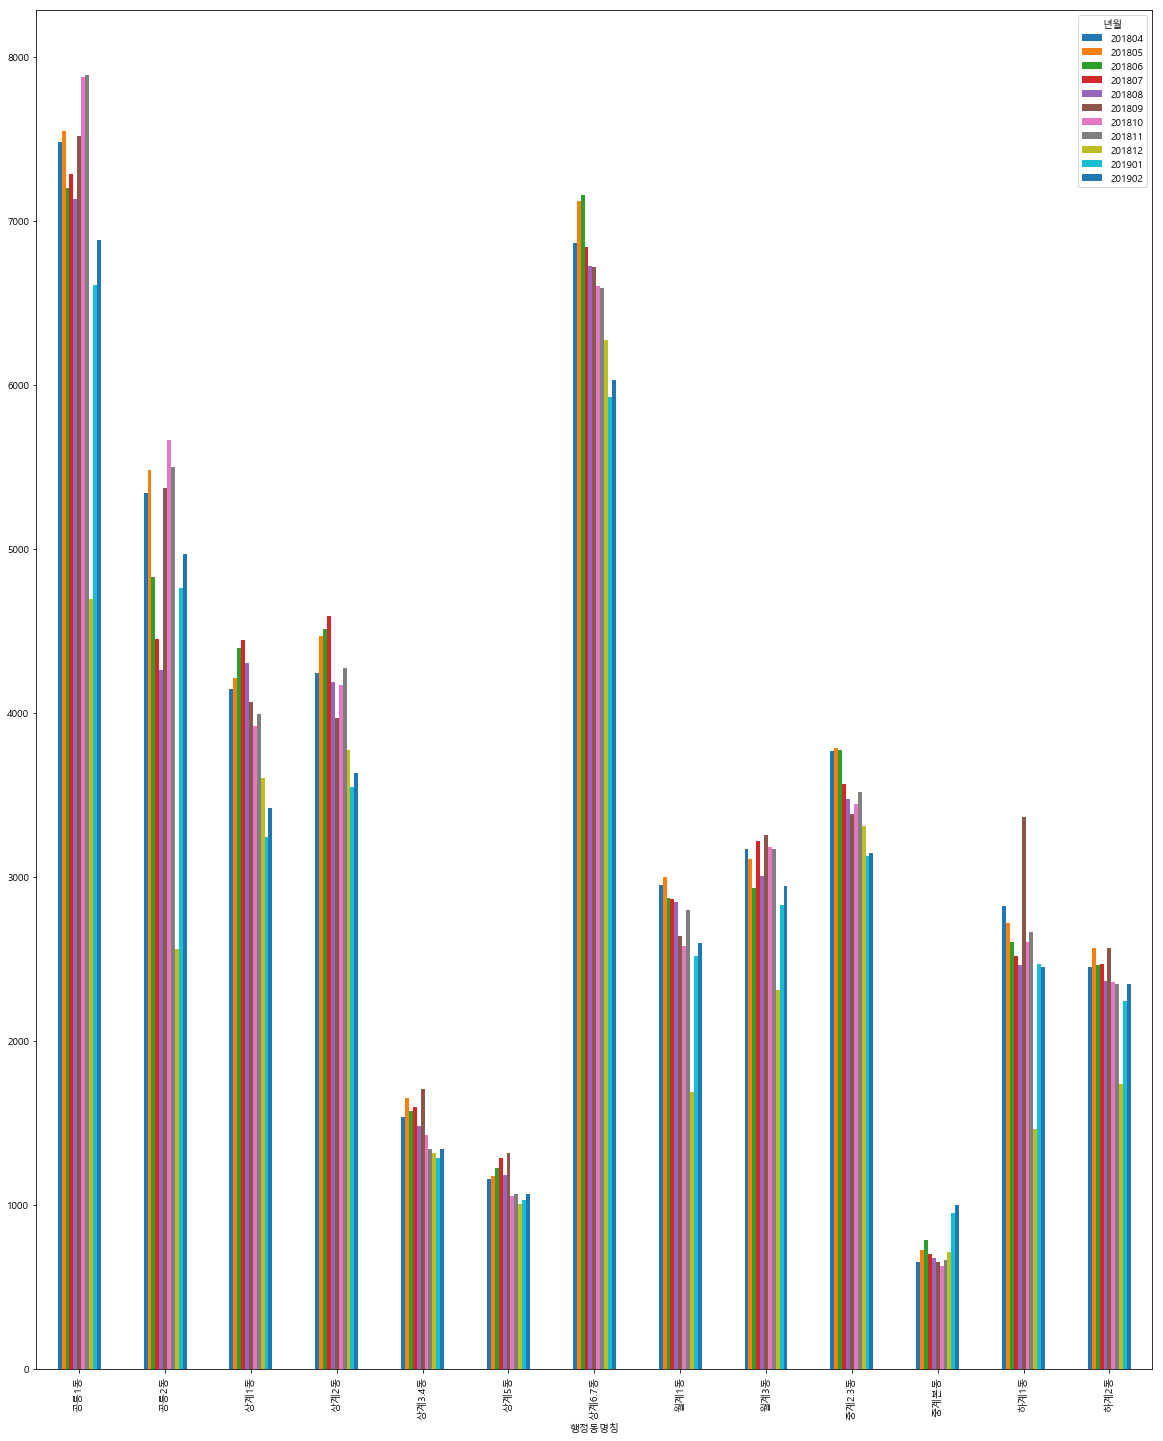

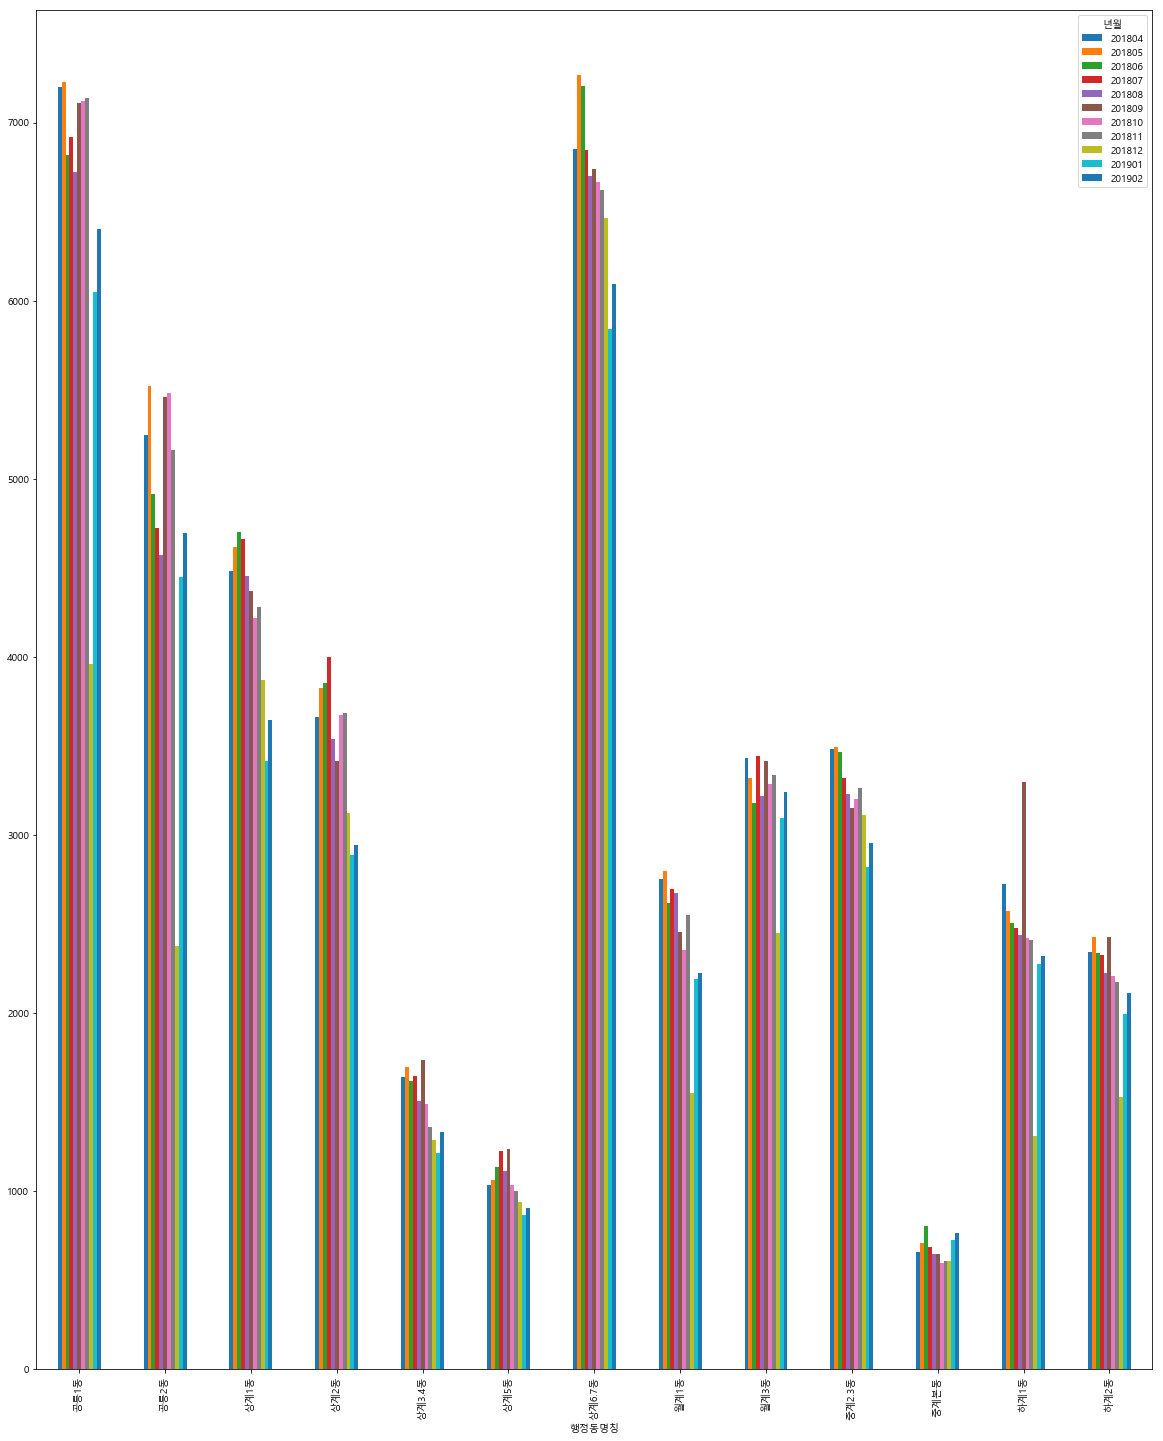

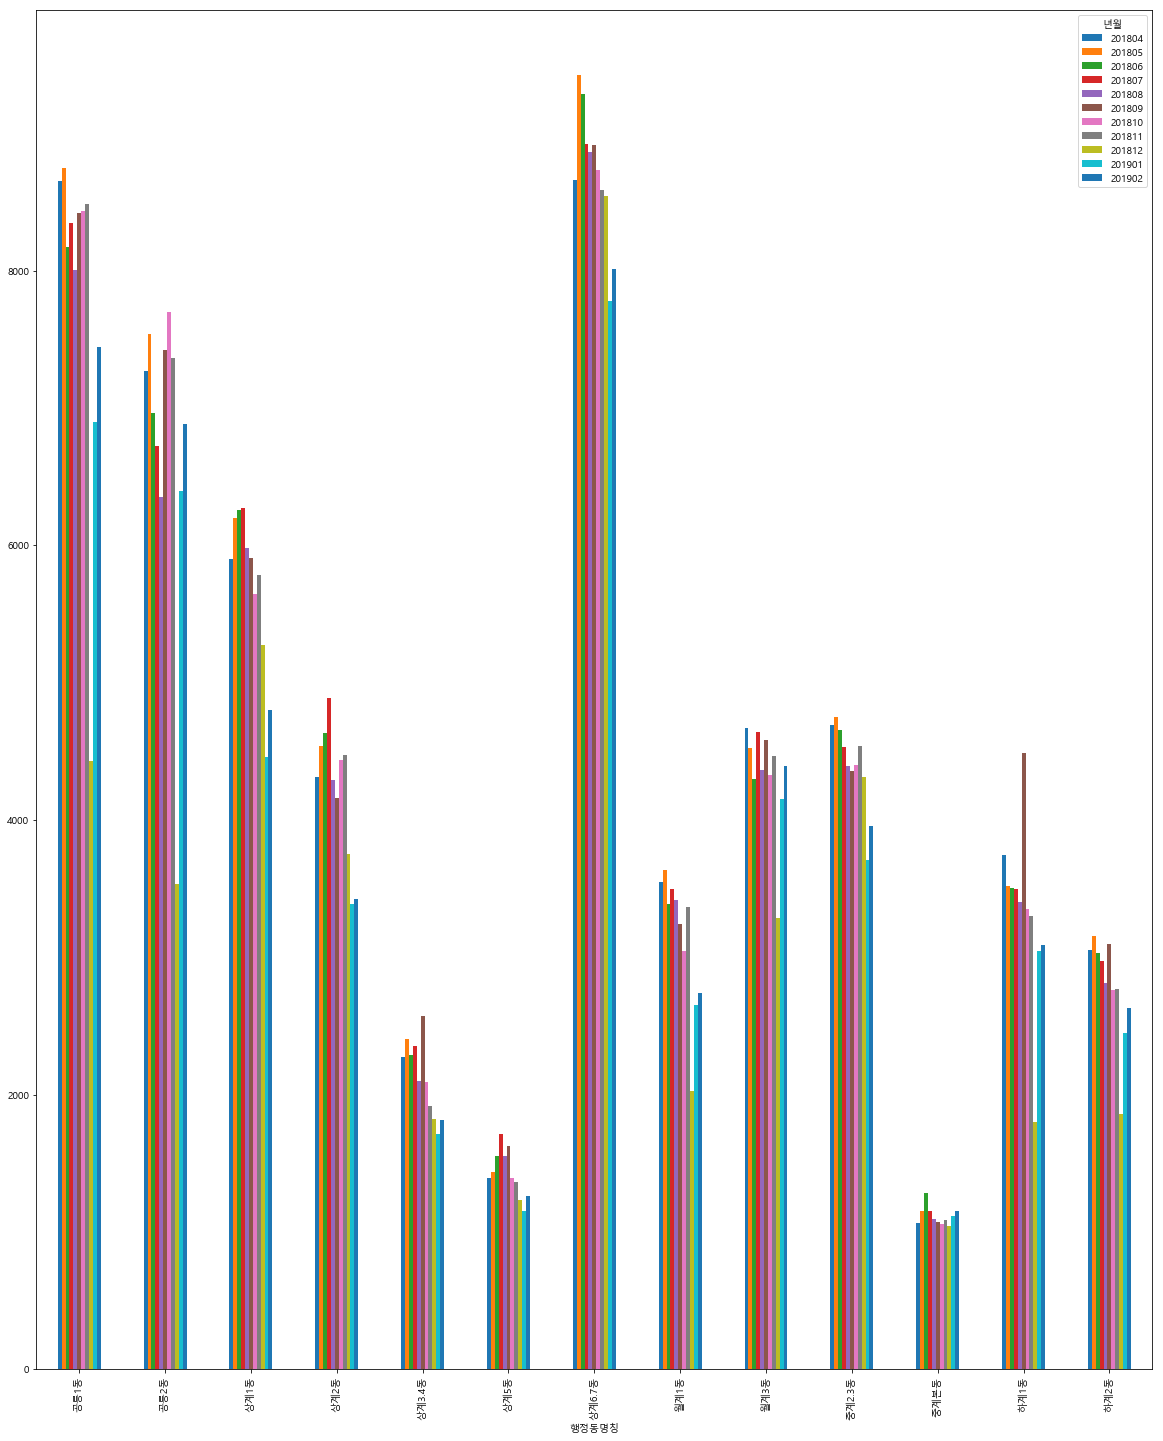

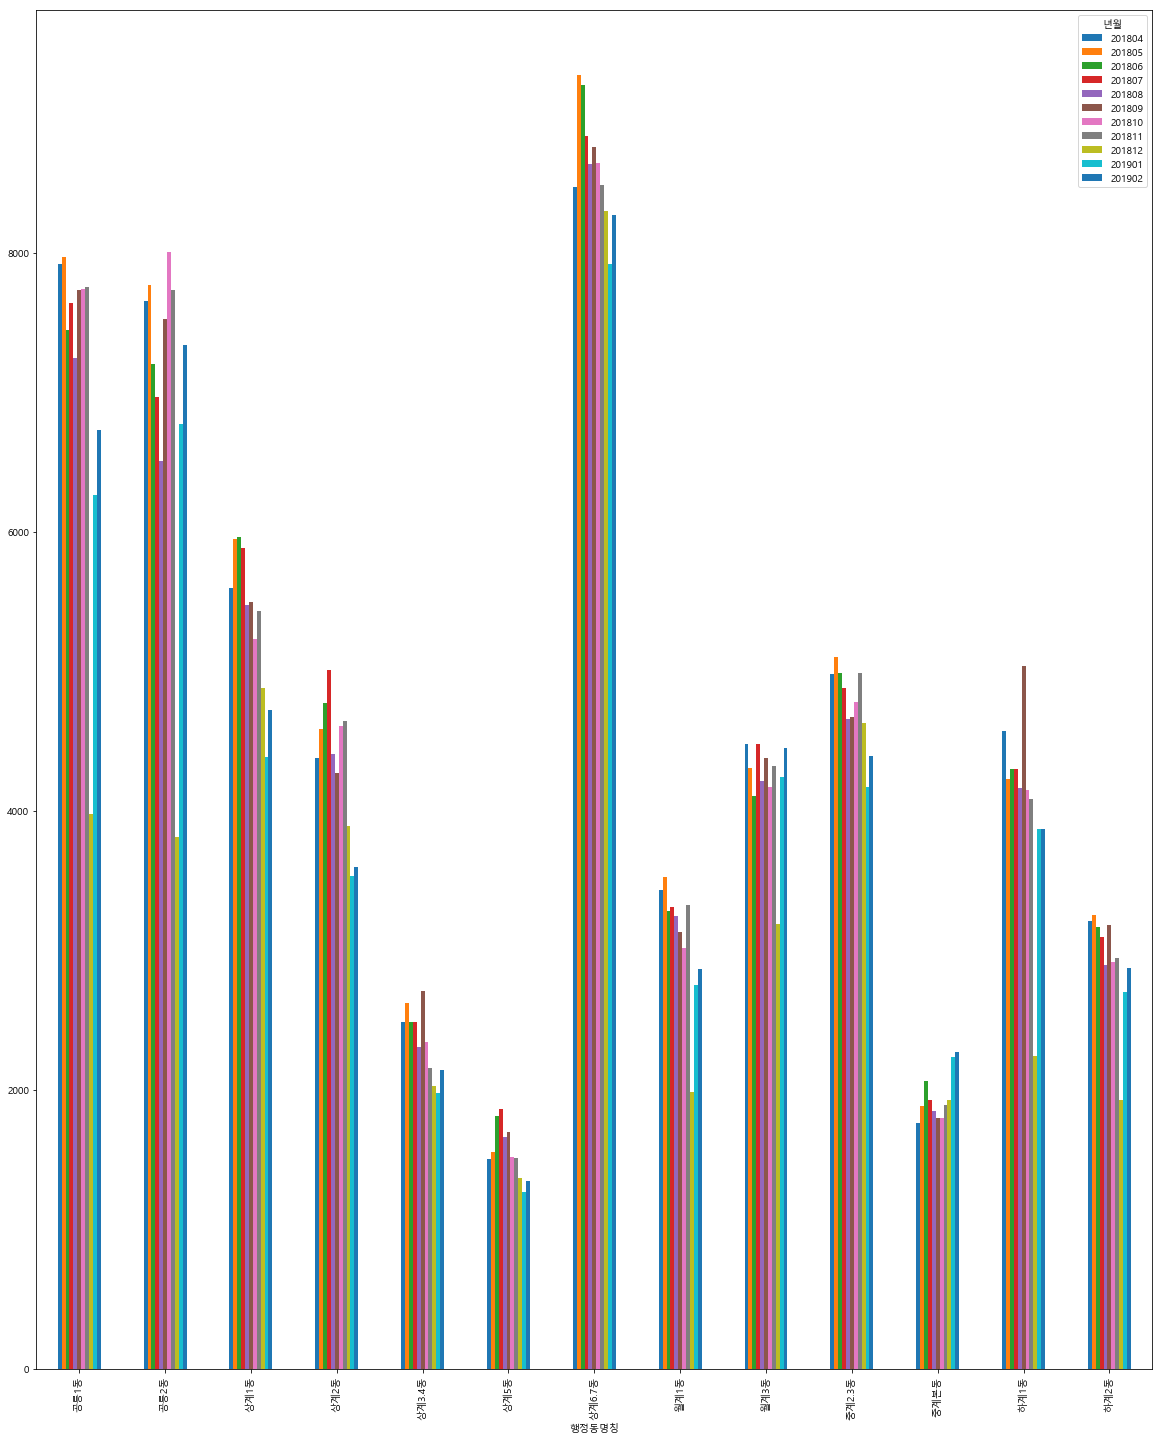

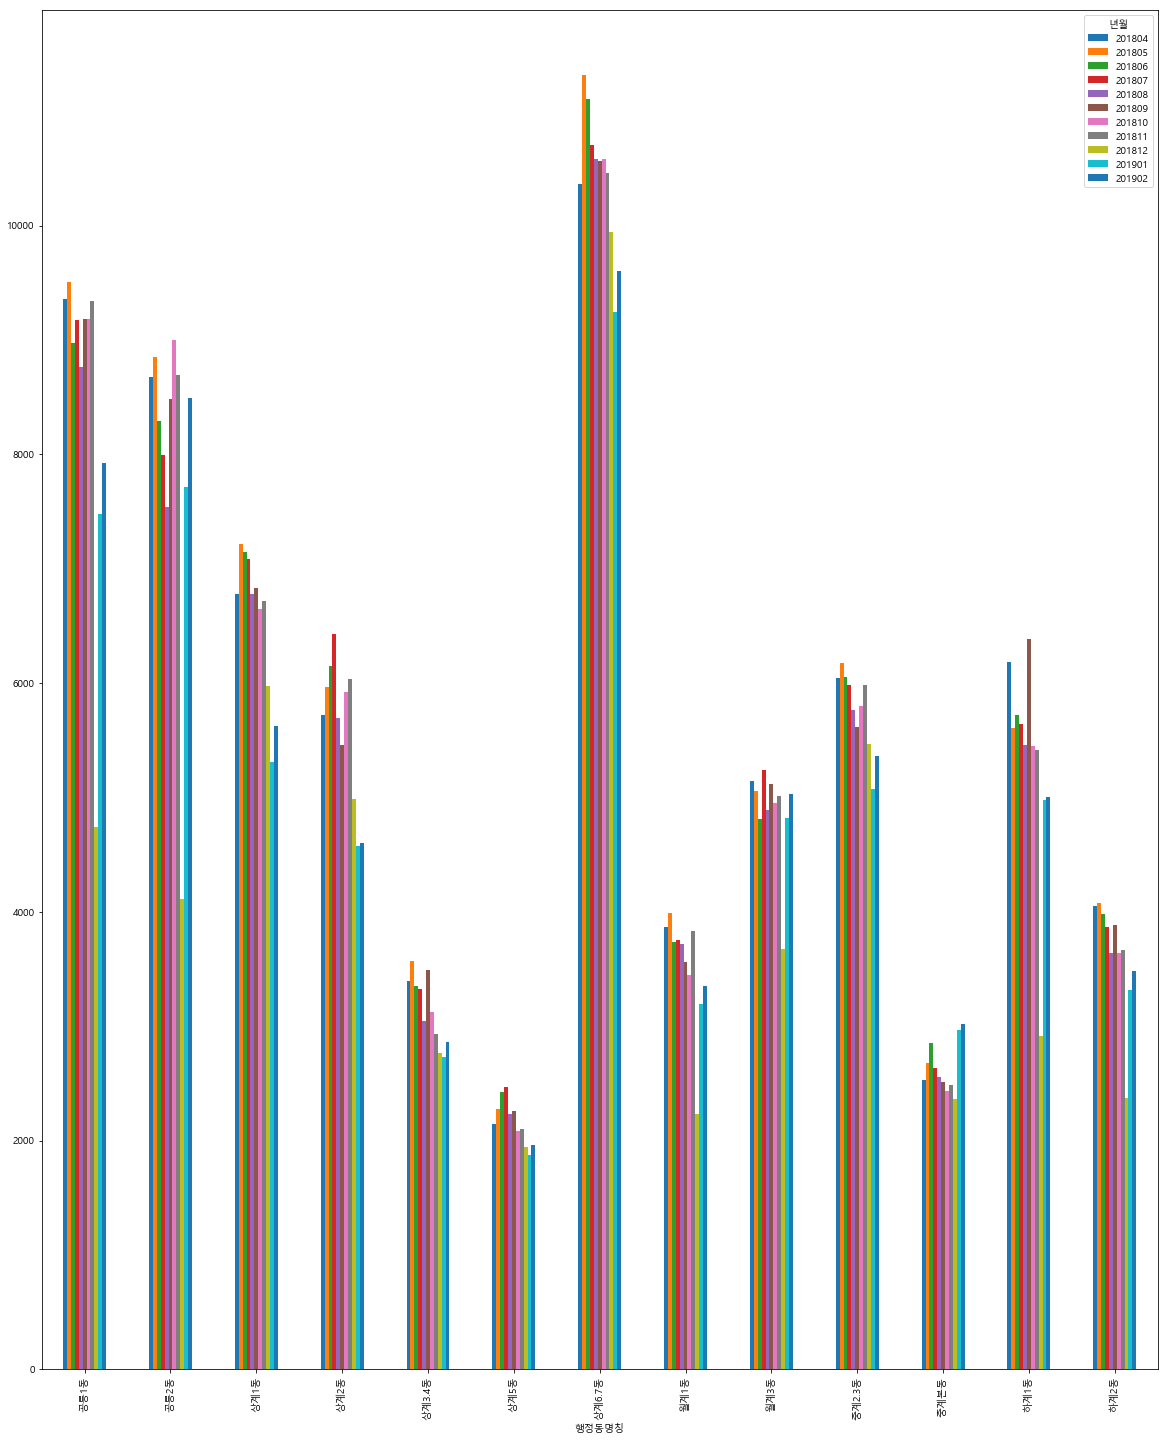

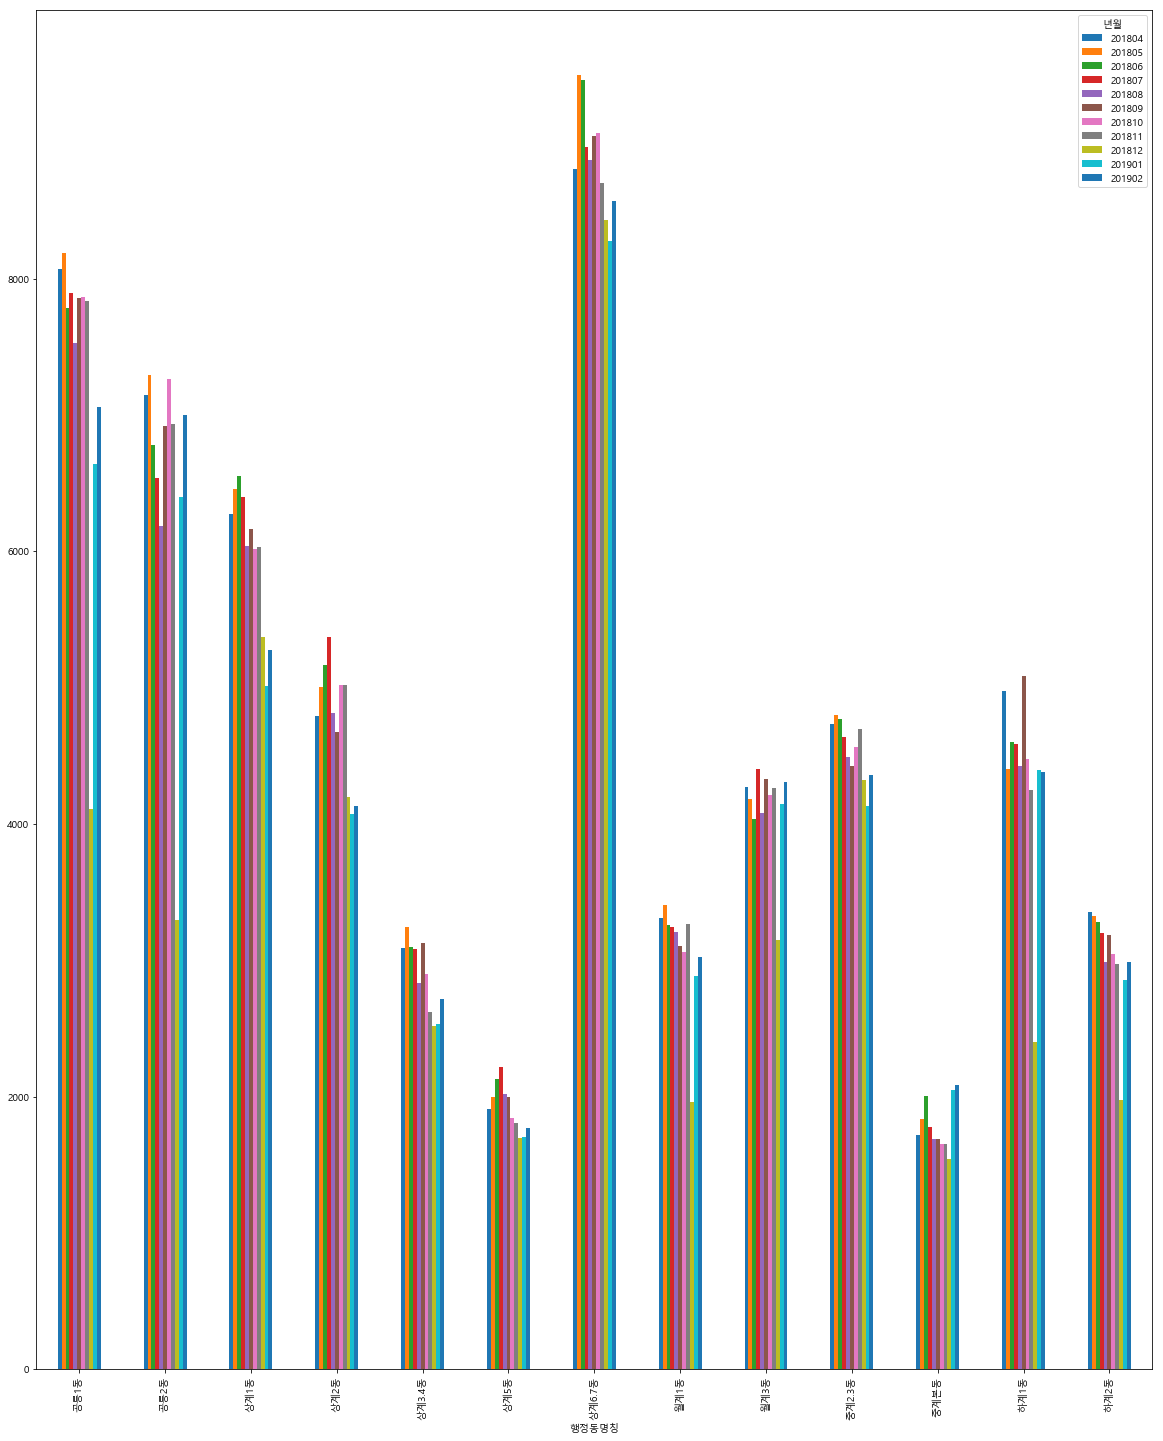

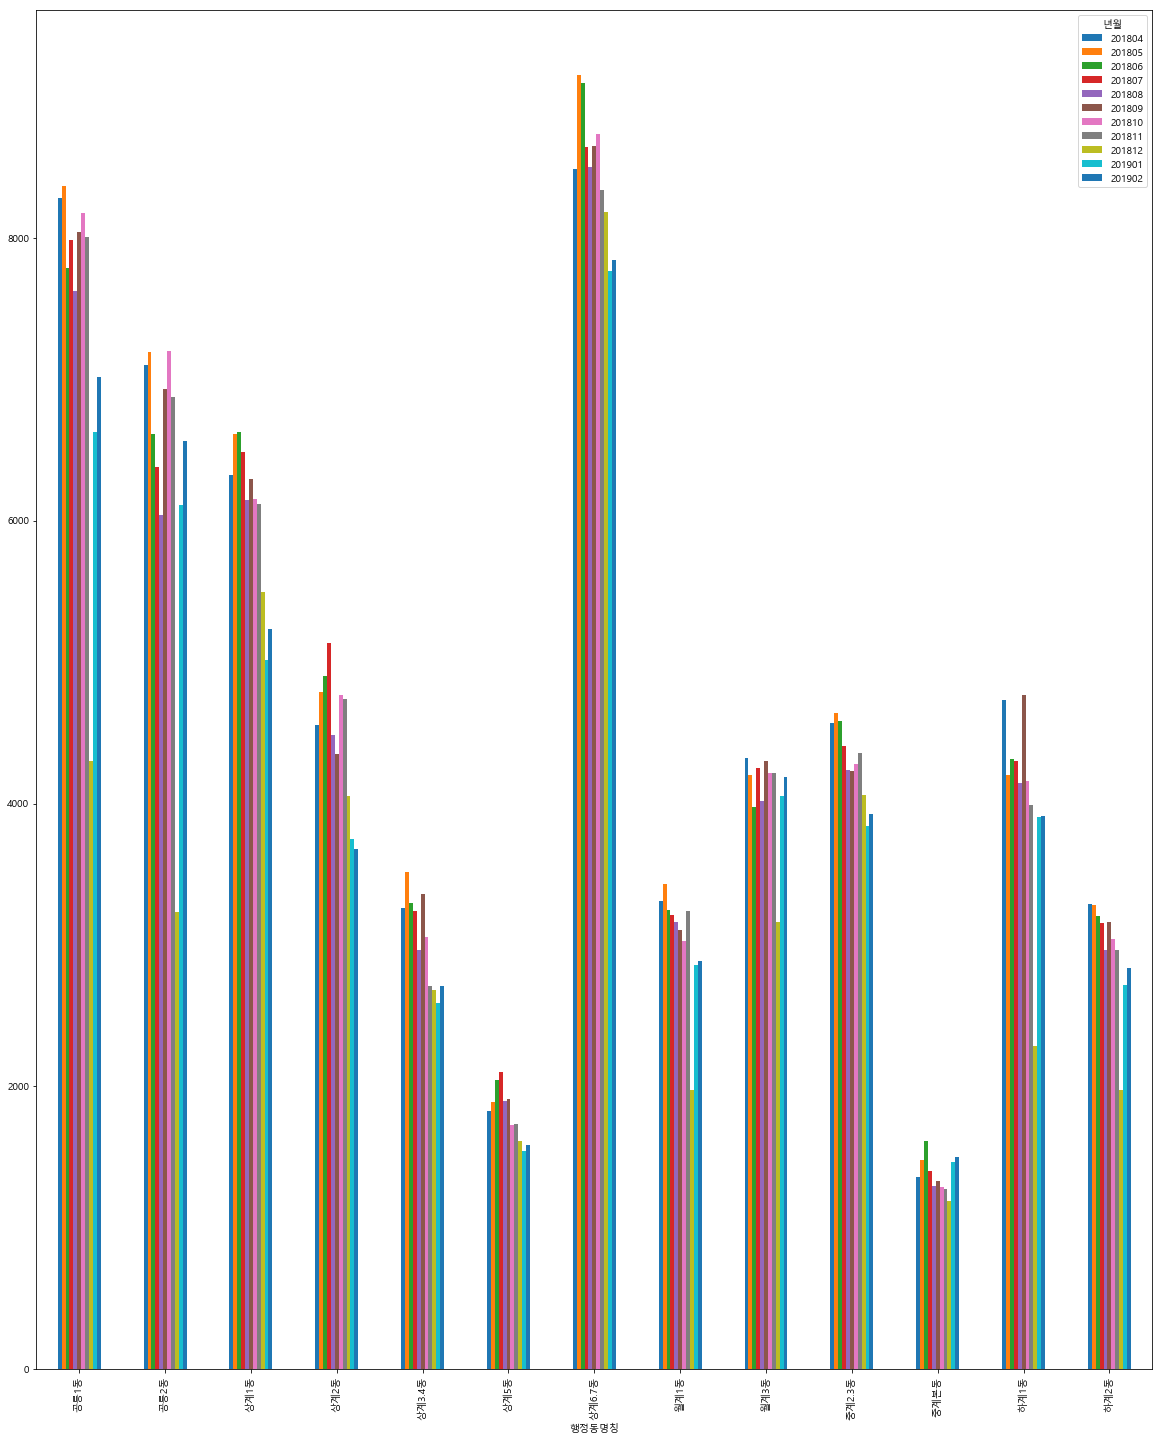

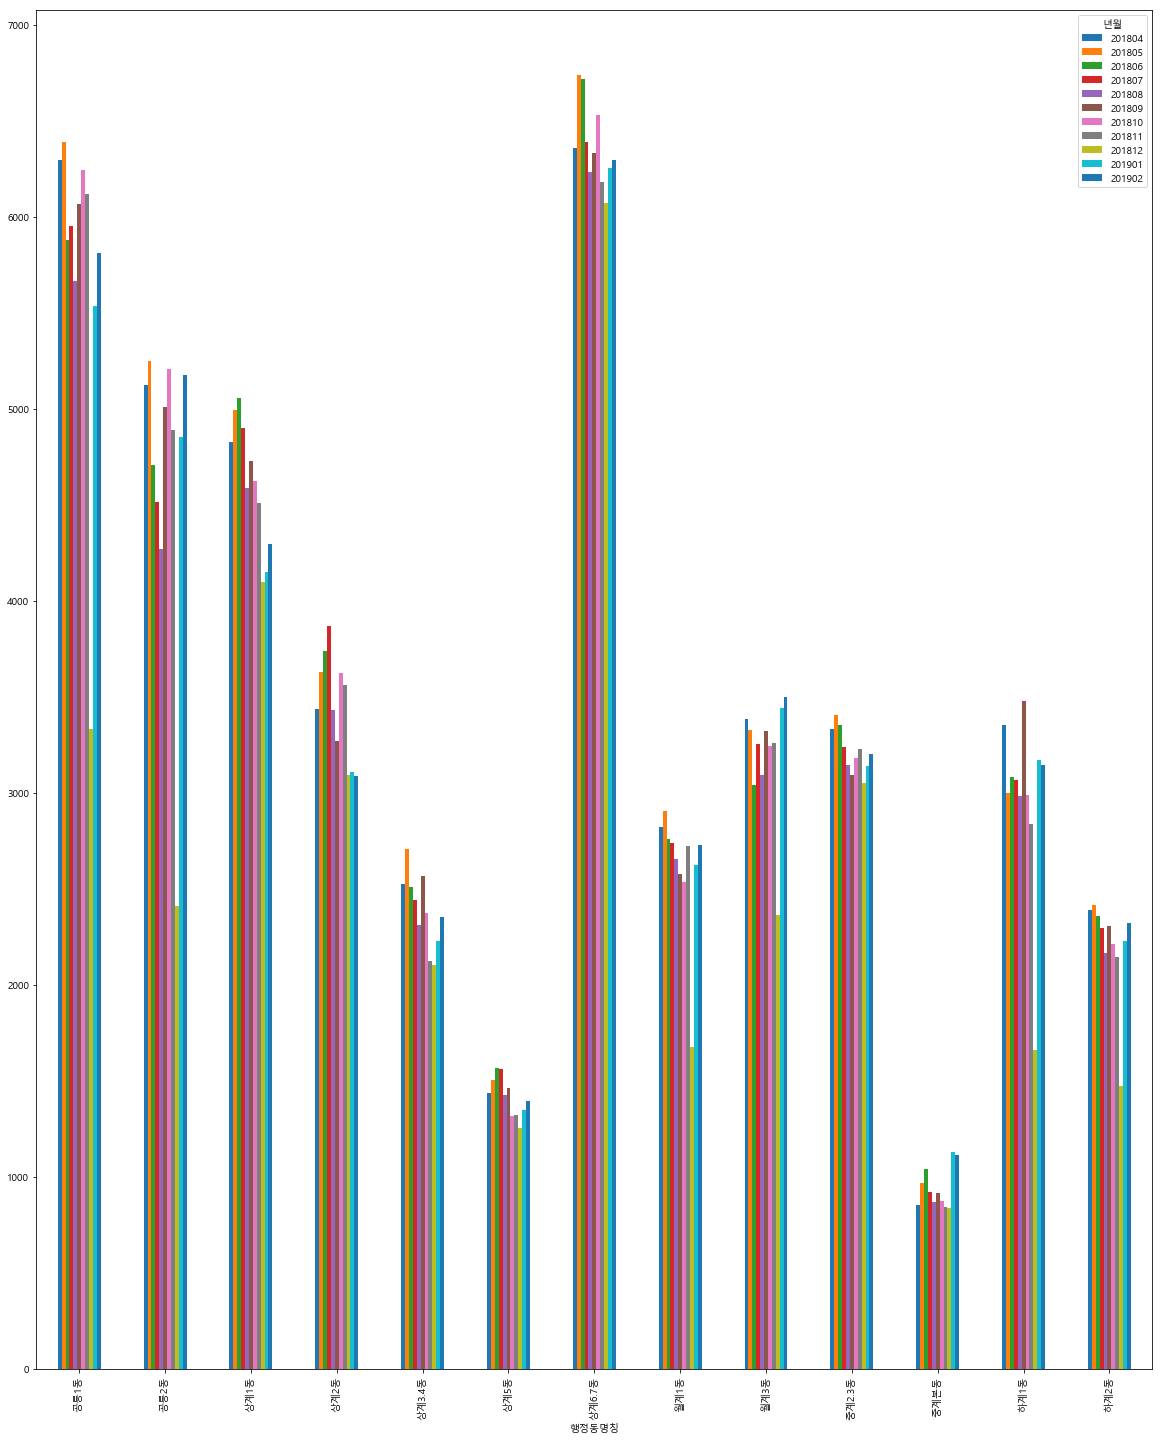

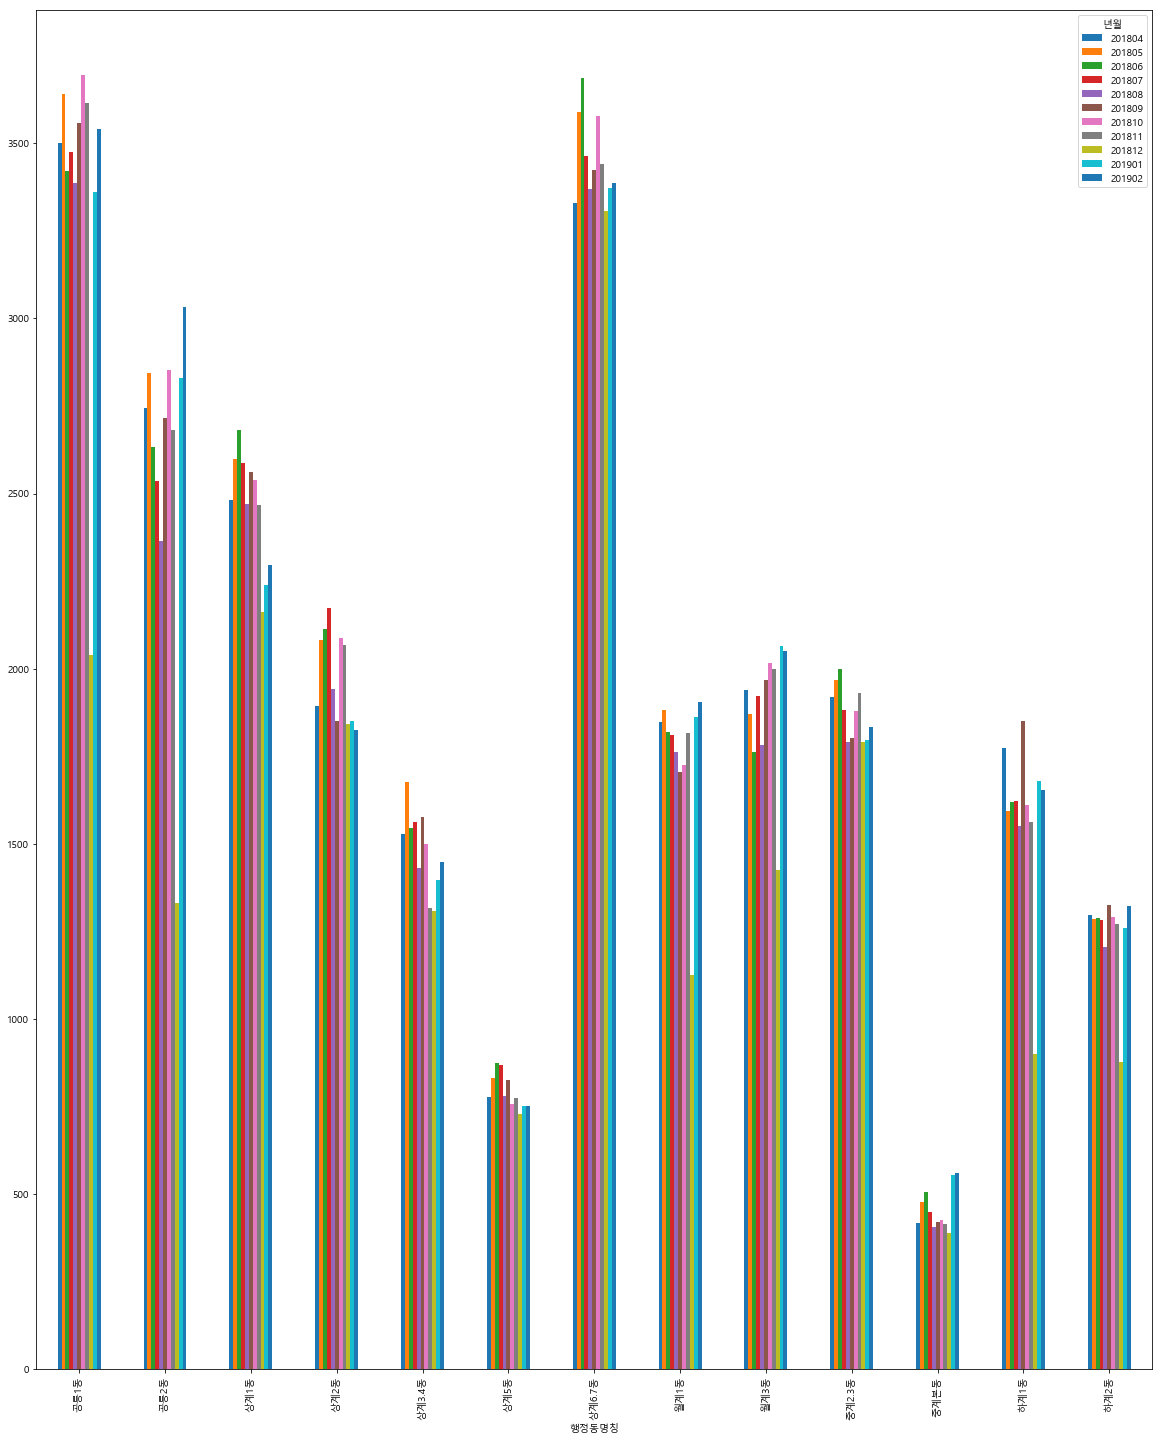

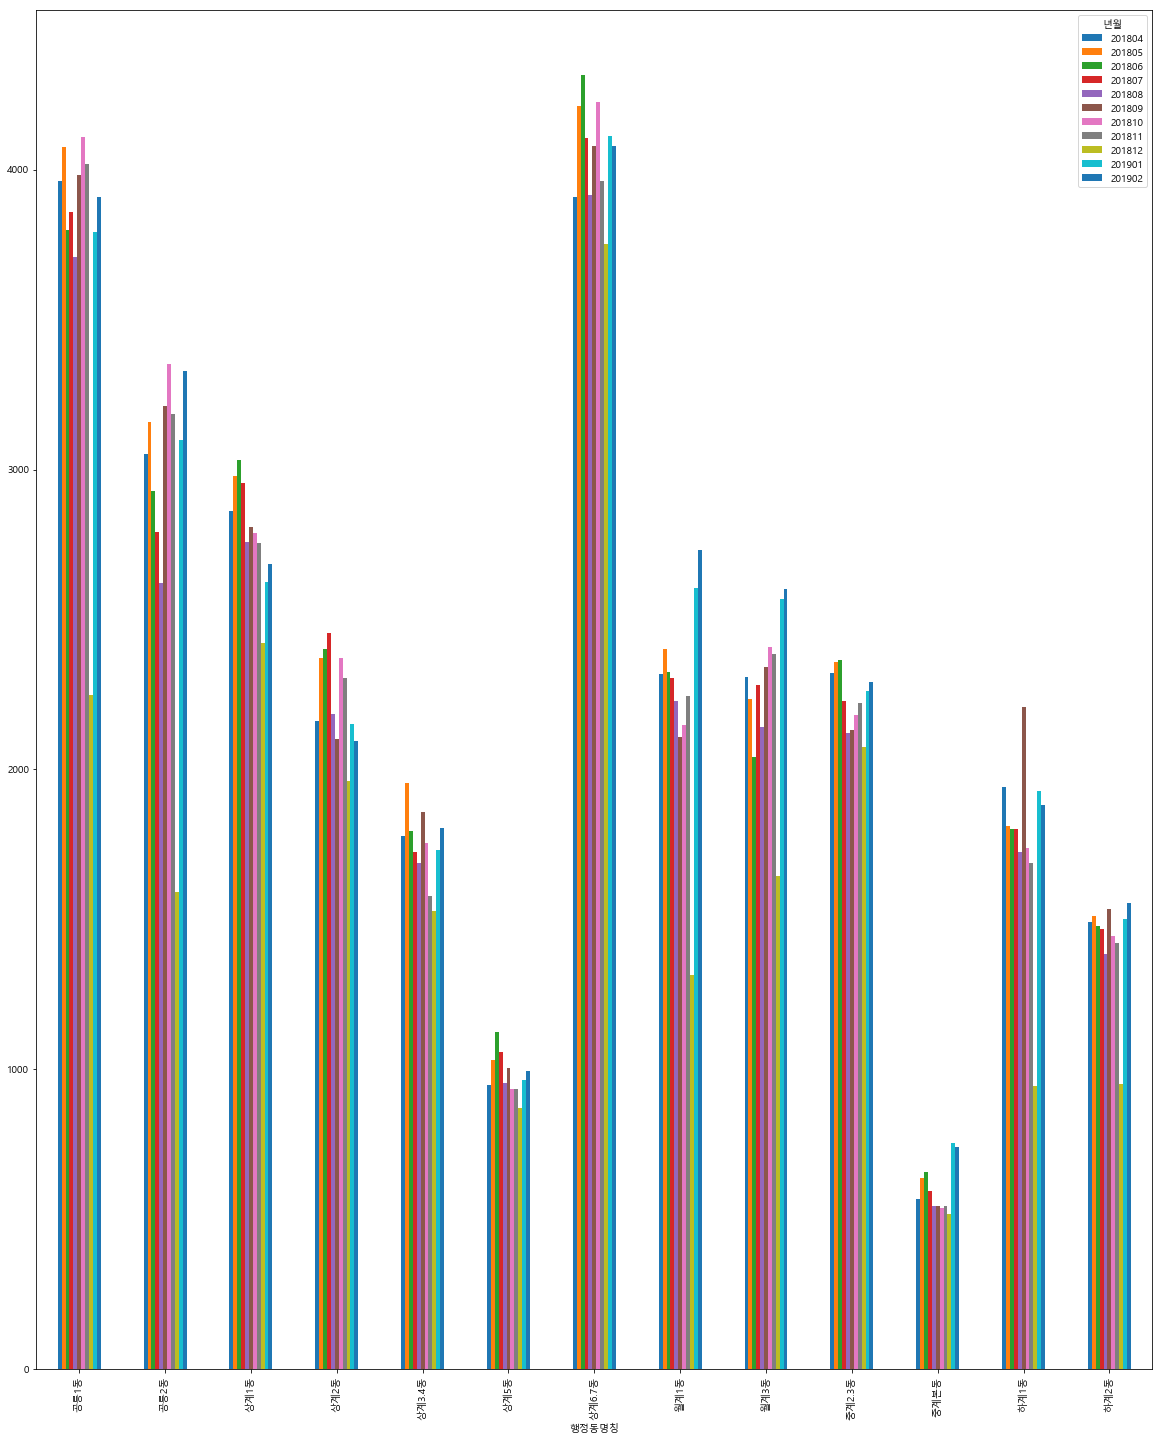

In [0]:
# 노원구_성연령유동인구 - 여자

iterables = ['여_0004','여_0509', '여_1014',
                '여_1519','여_2024', '여_2529',
                '여_3034','여_3539', '여_4044',
                '여_4549','여_5054', '여_5559',
                '여_6064', '여_6569','여_70이상']

for i in iterables:
    노원구 = 노원구_성연령유동인구.pivot_table(index='행정동명칭', columns='년월',
                        aggfunc='mean',
                        values=i)
    노원구.plot(kind='bar', figsize=(20,25))

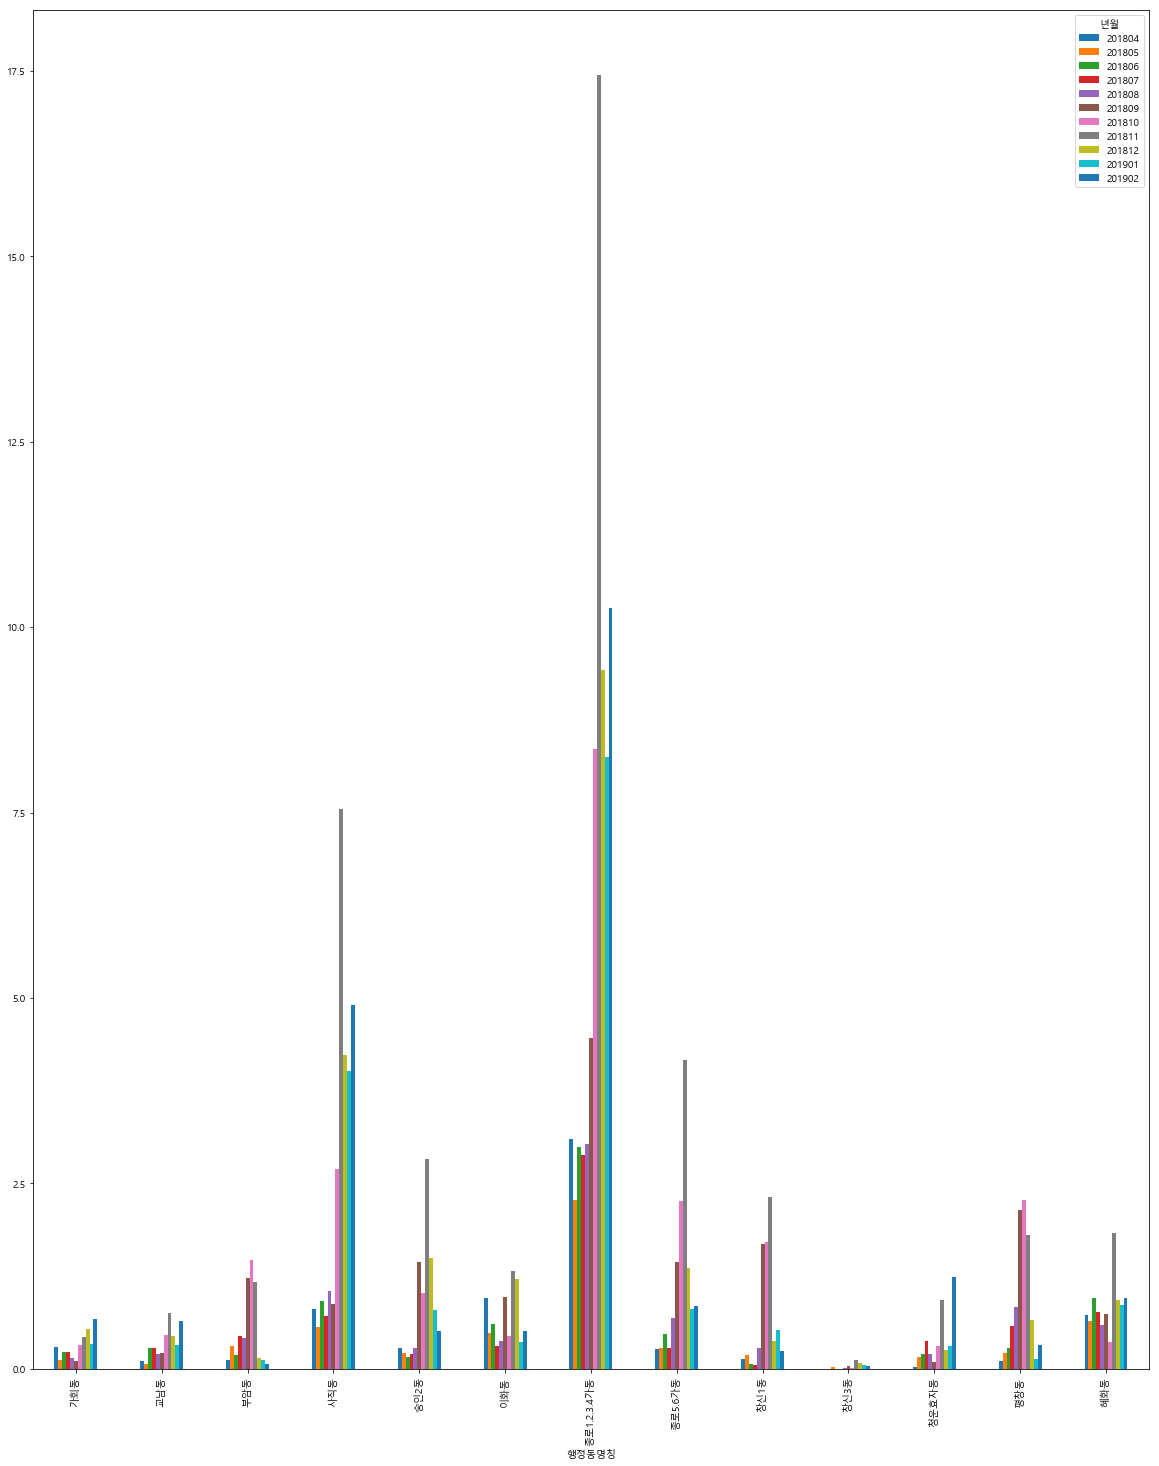

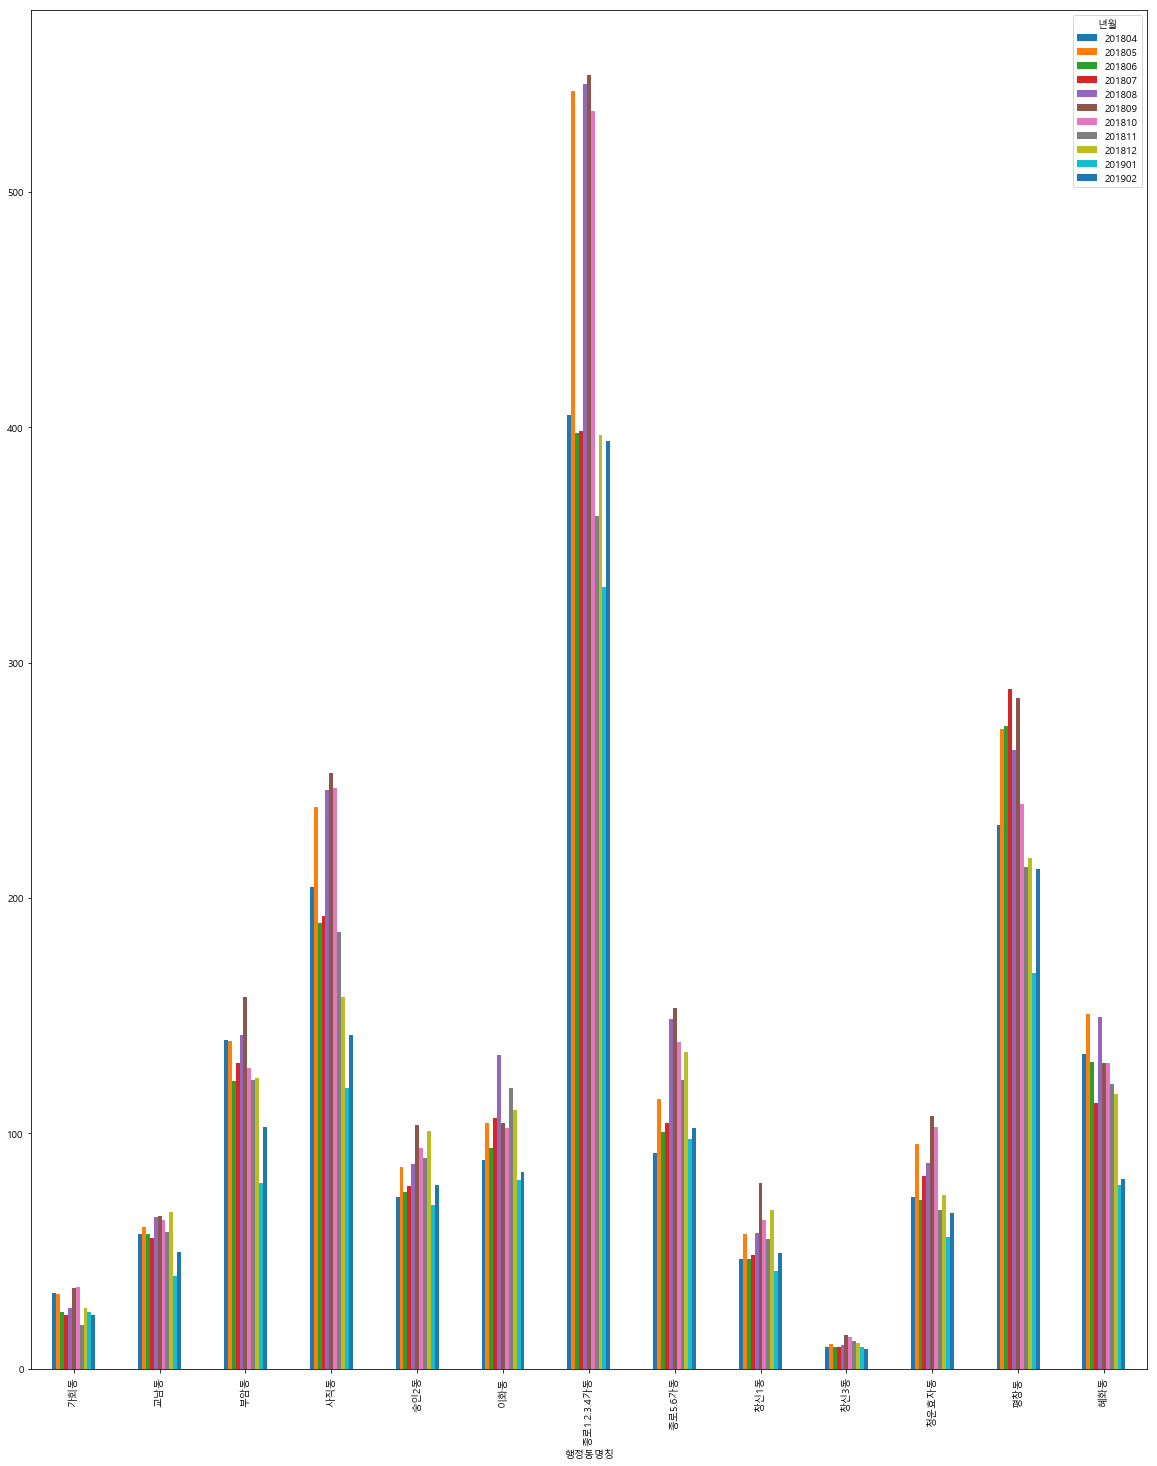

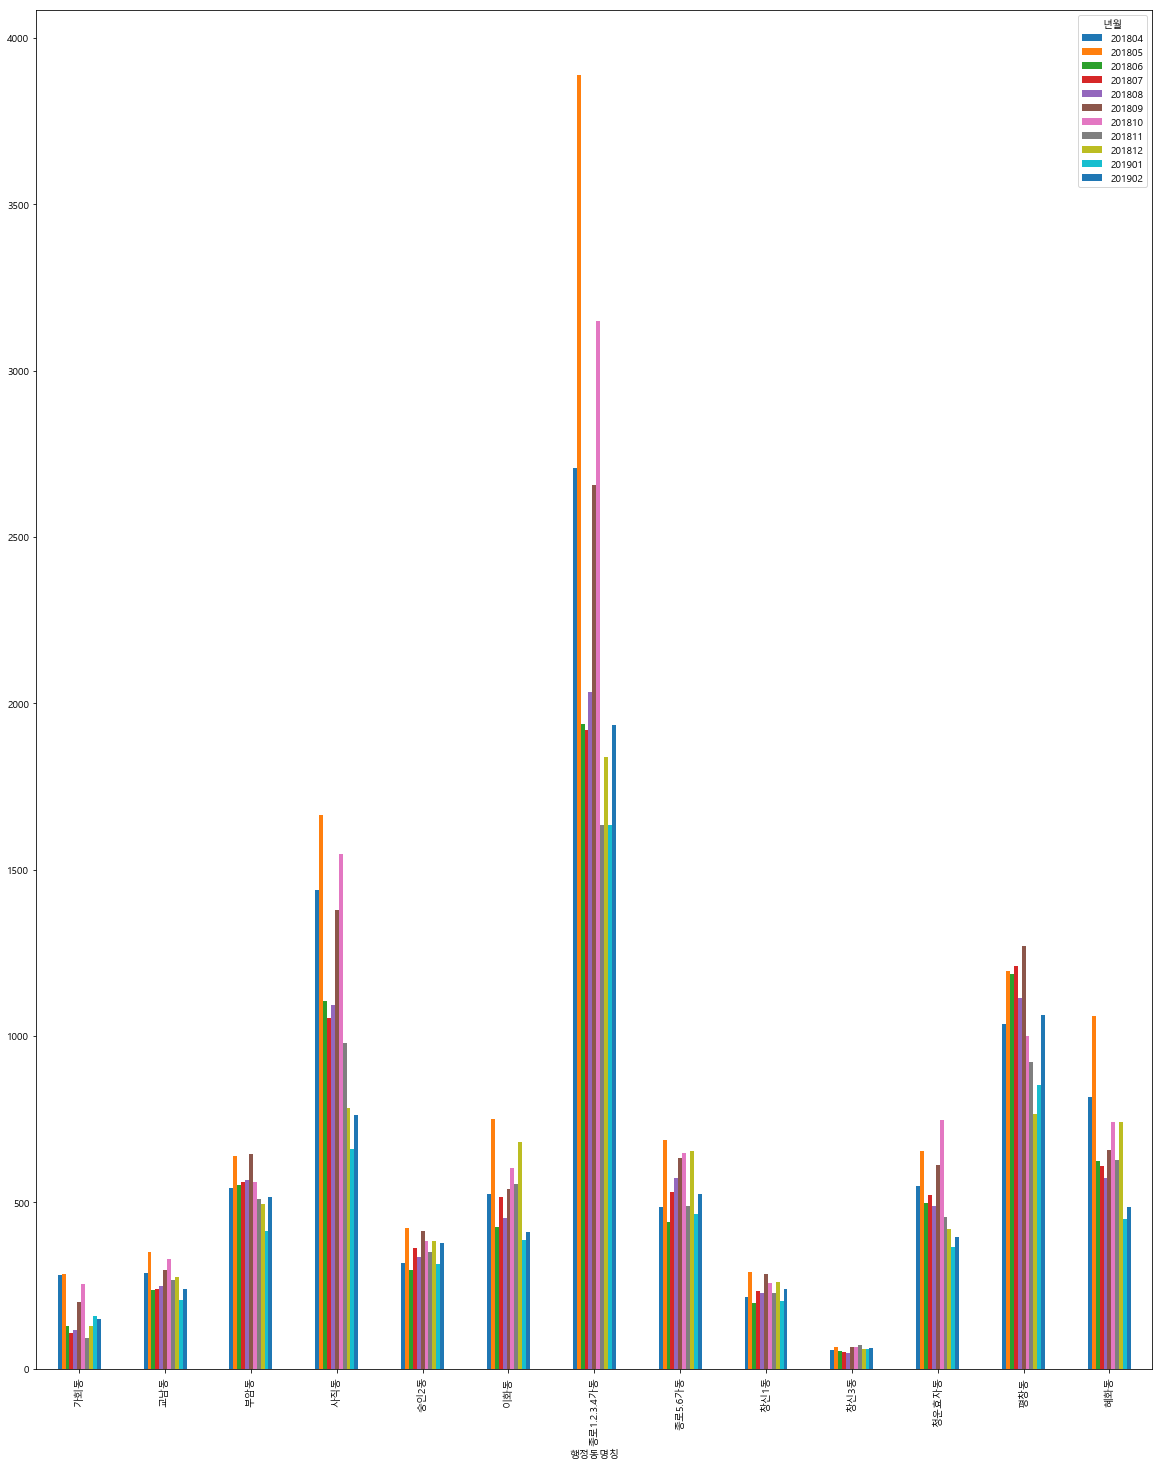

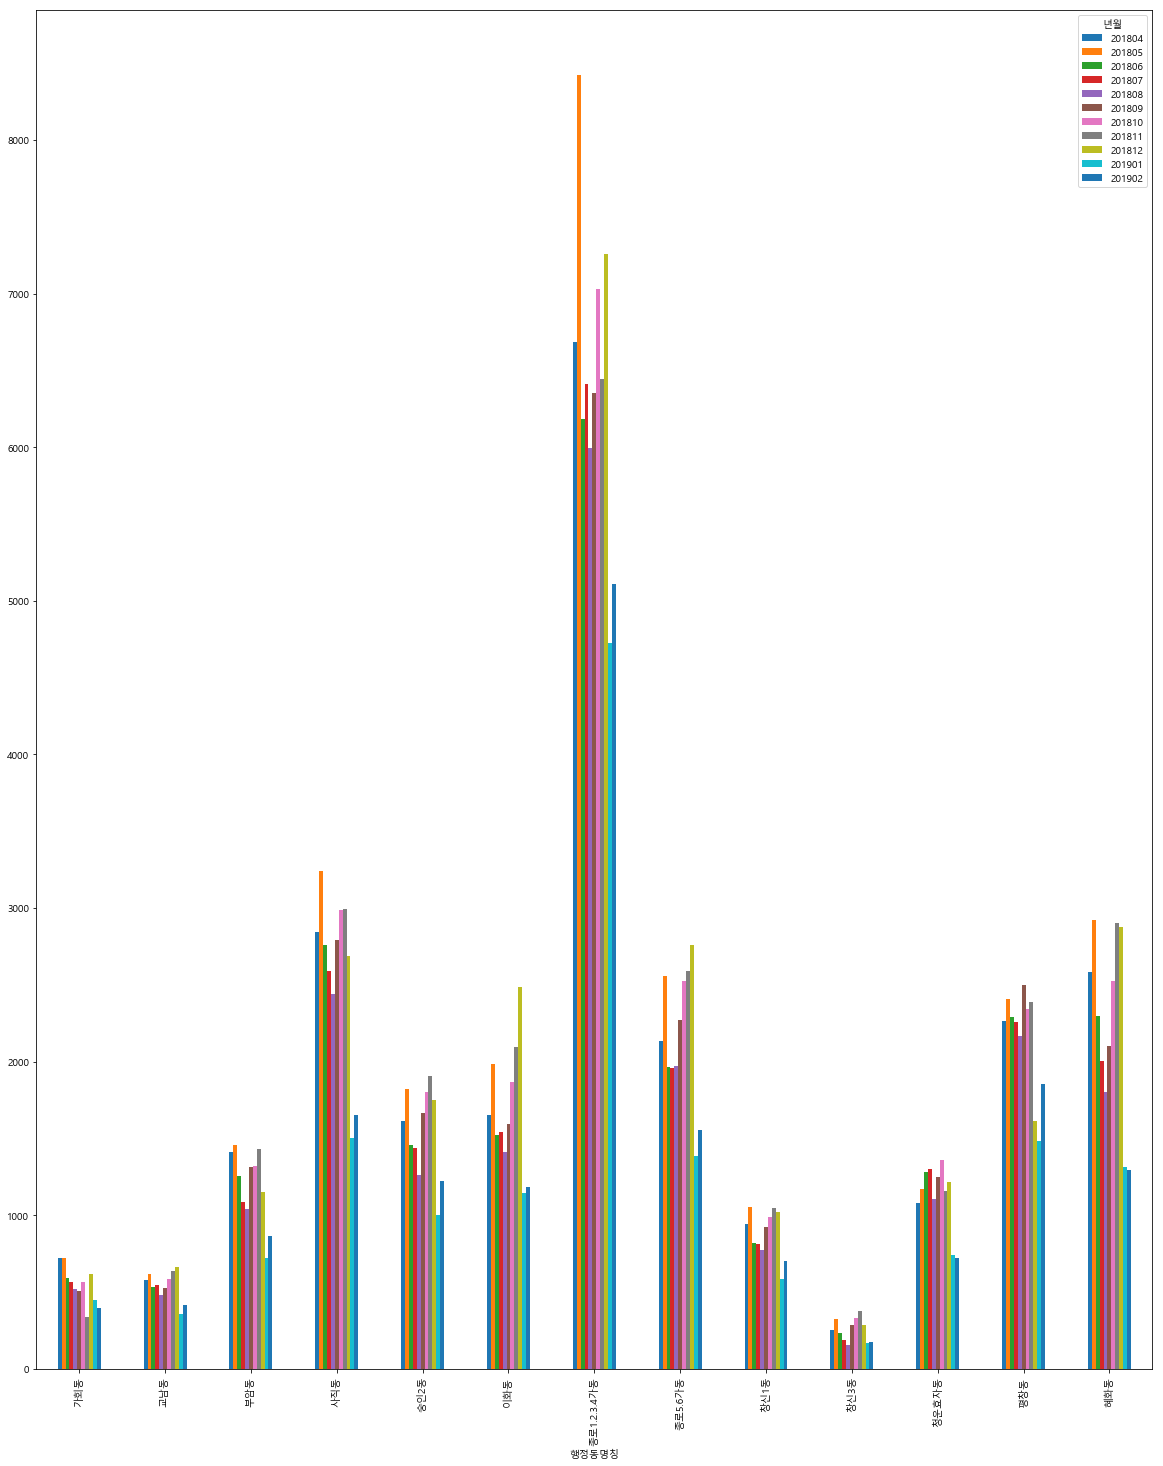

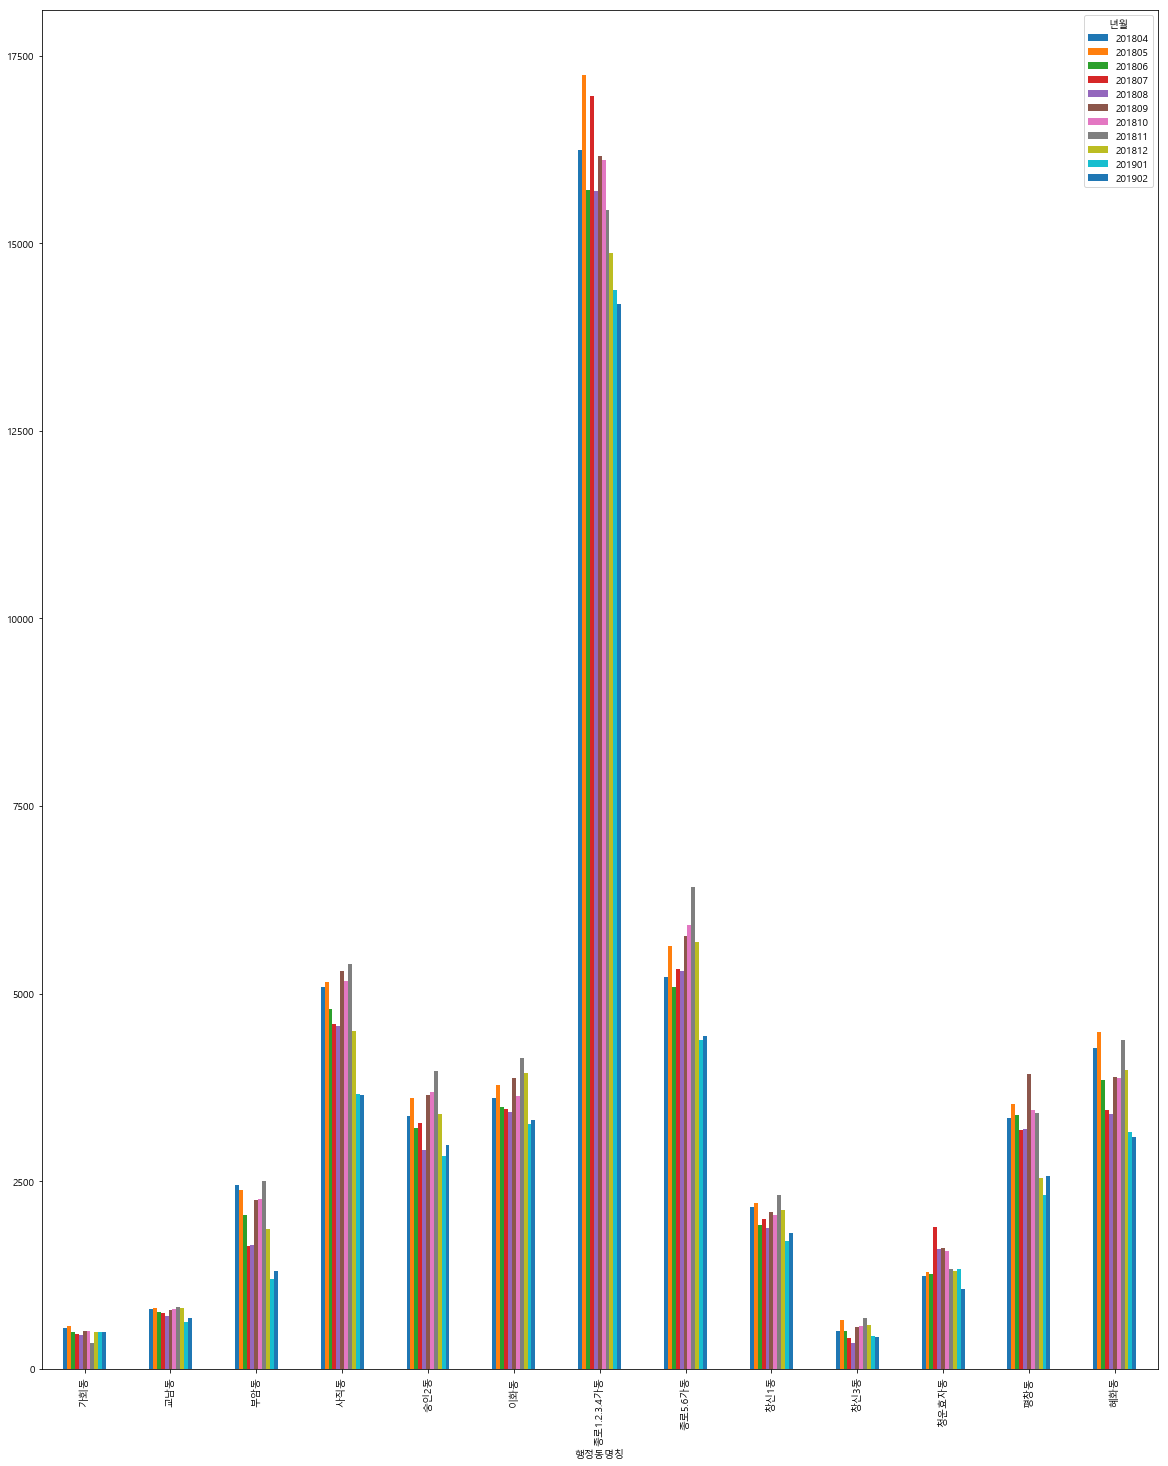

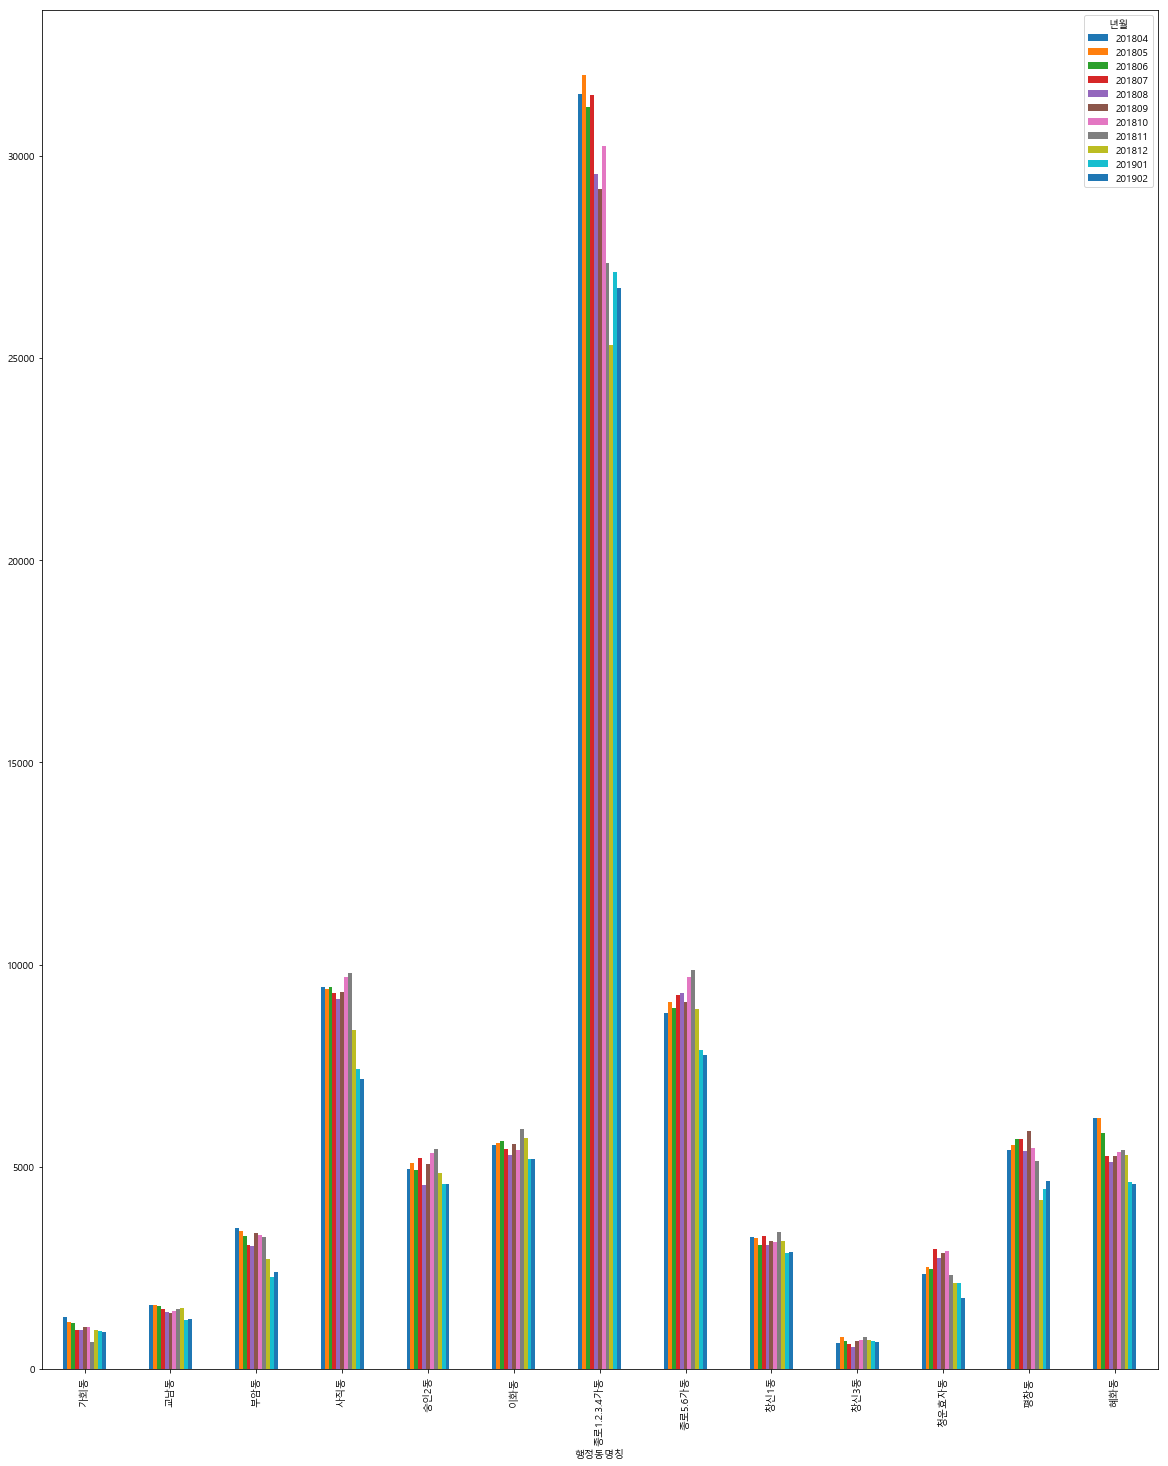

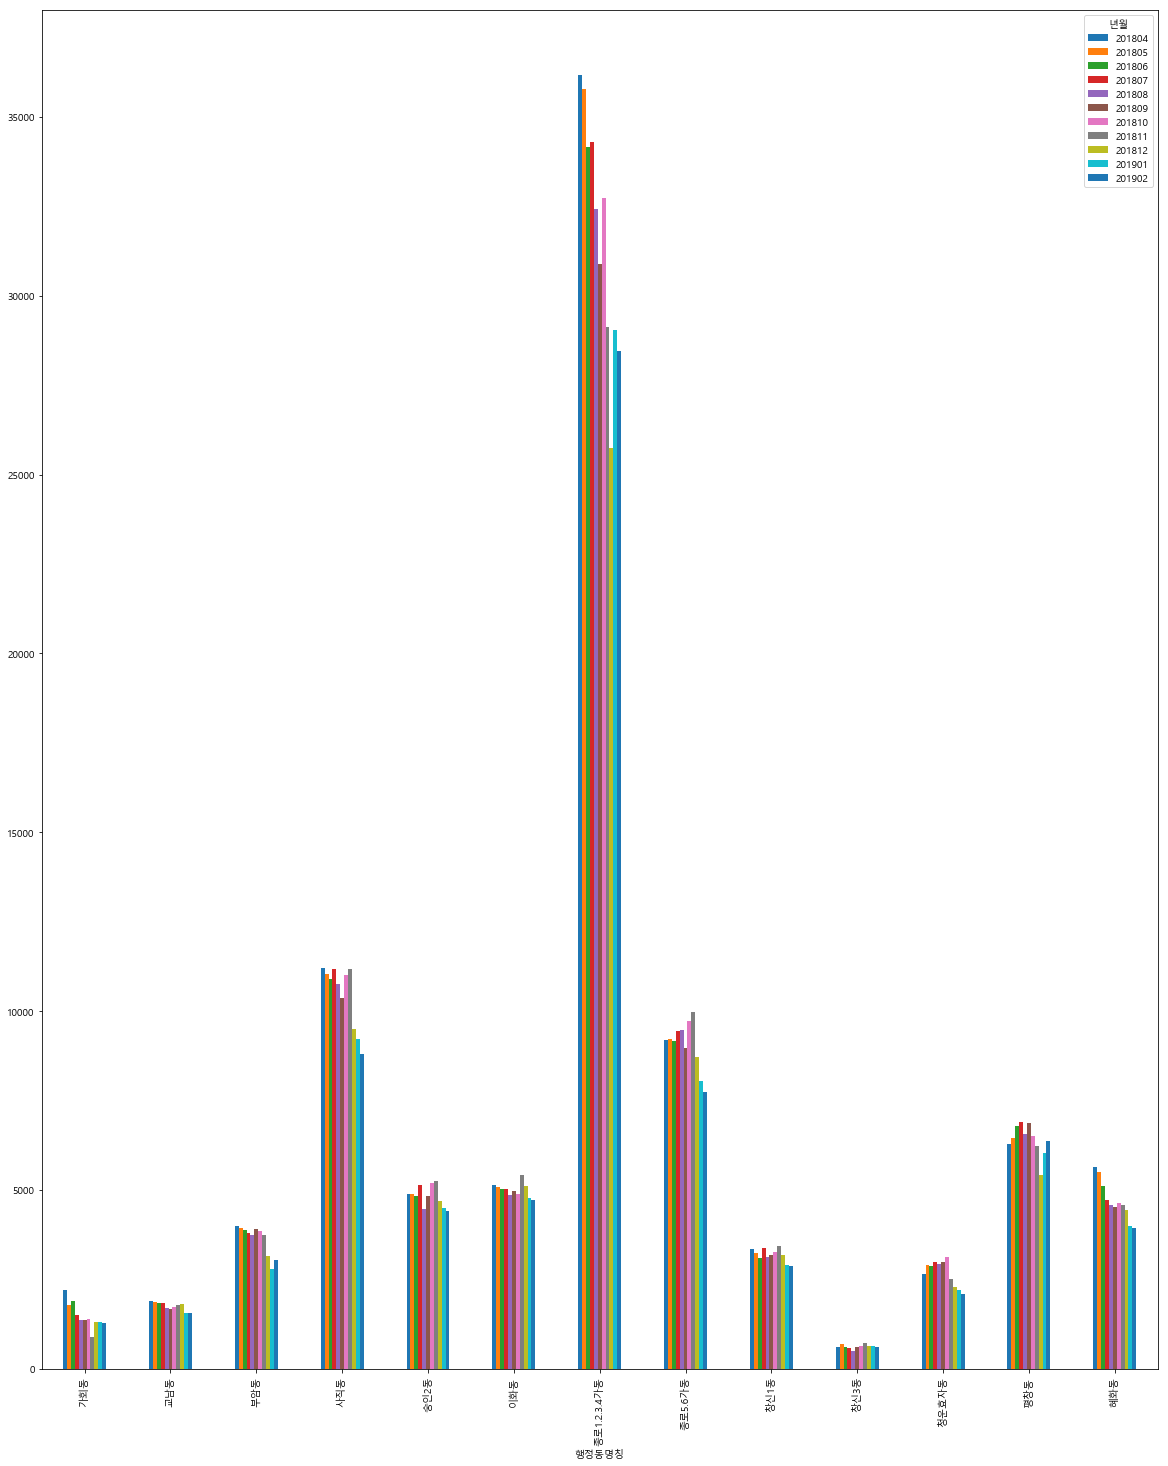

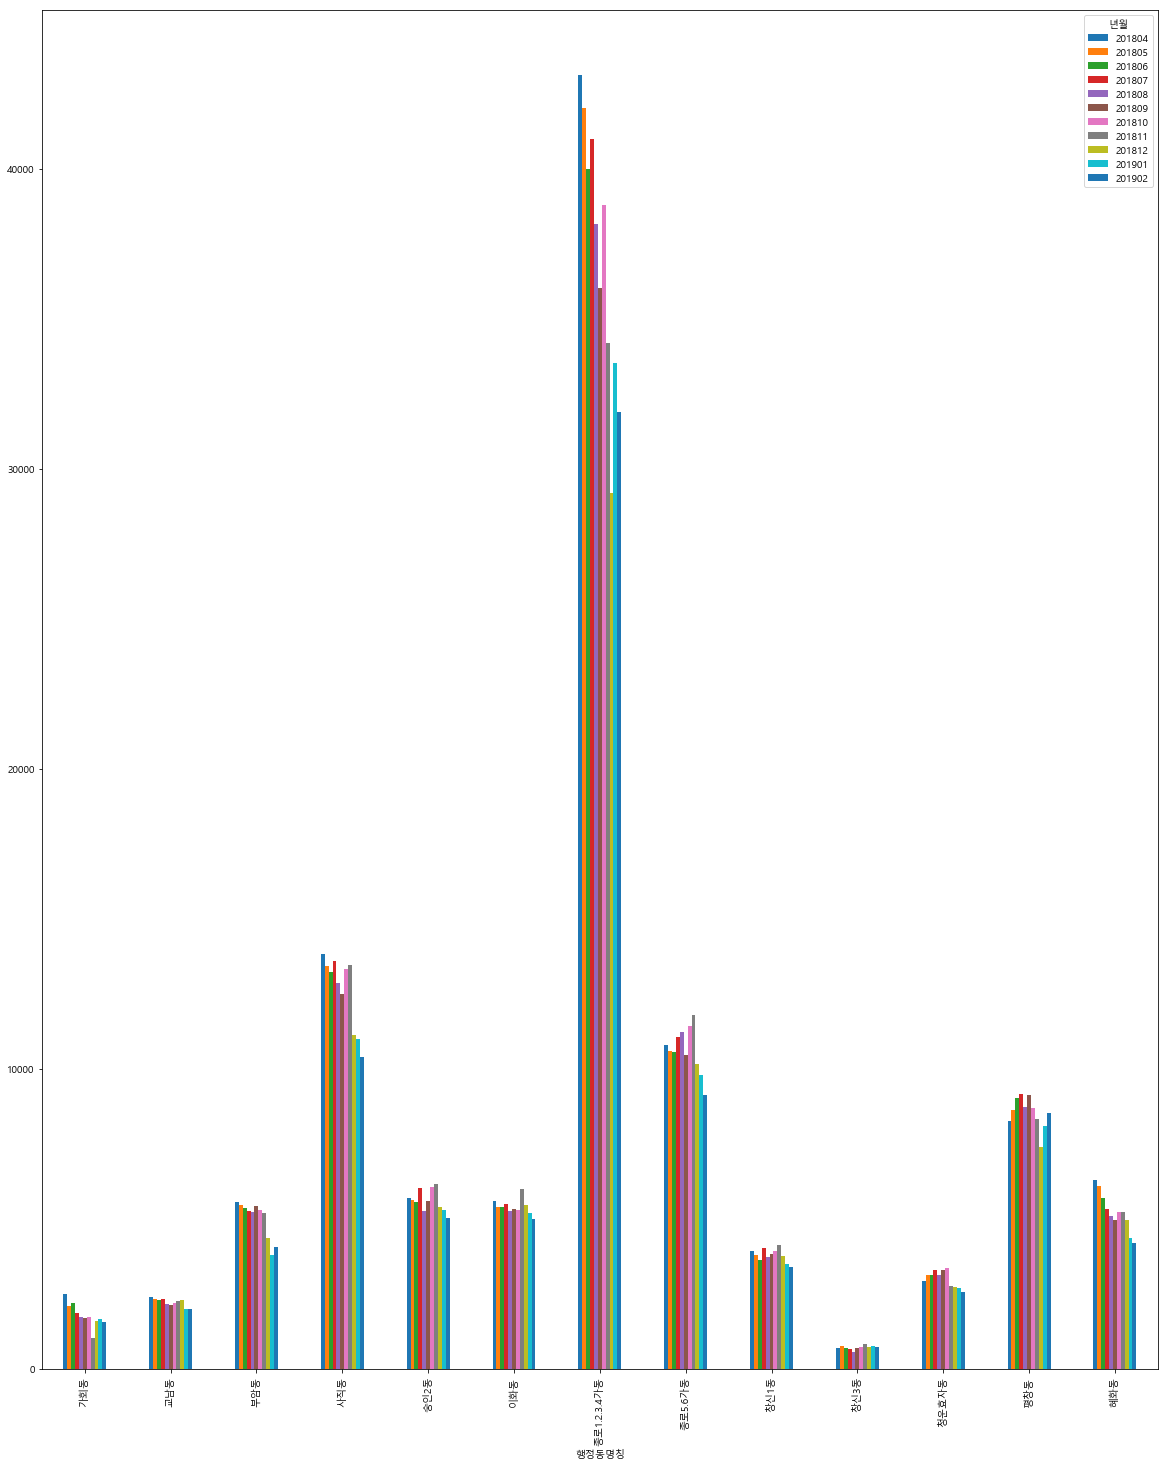

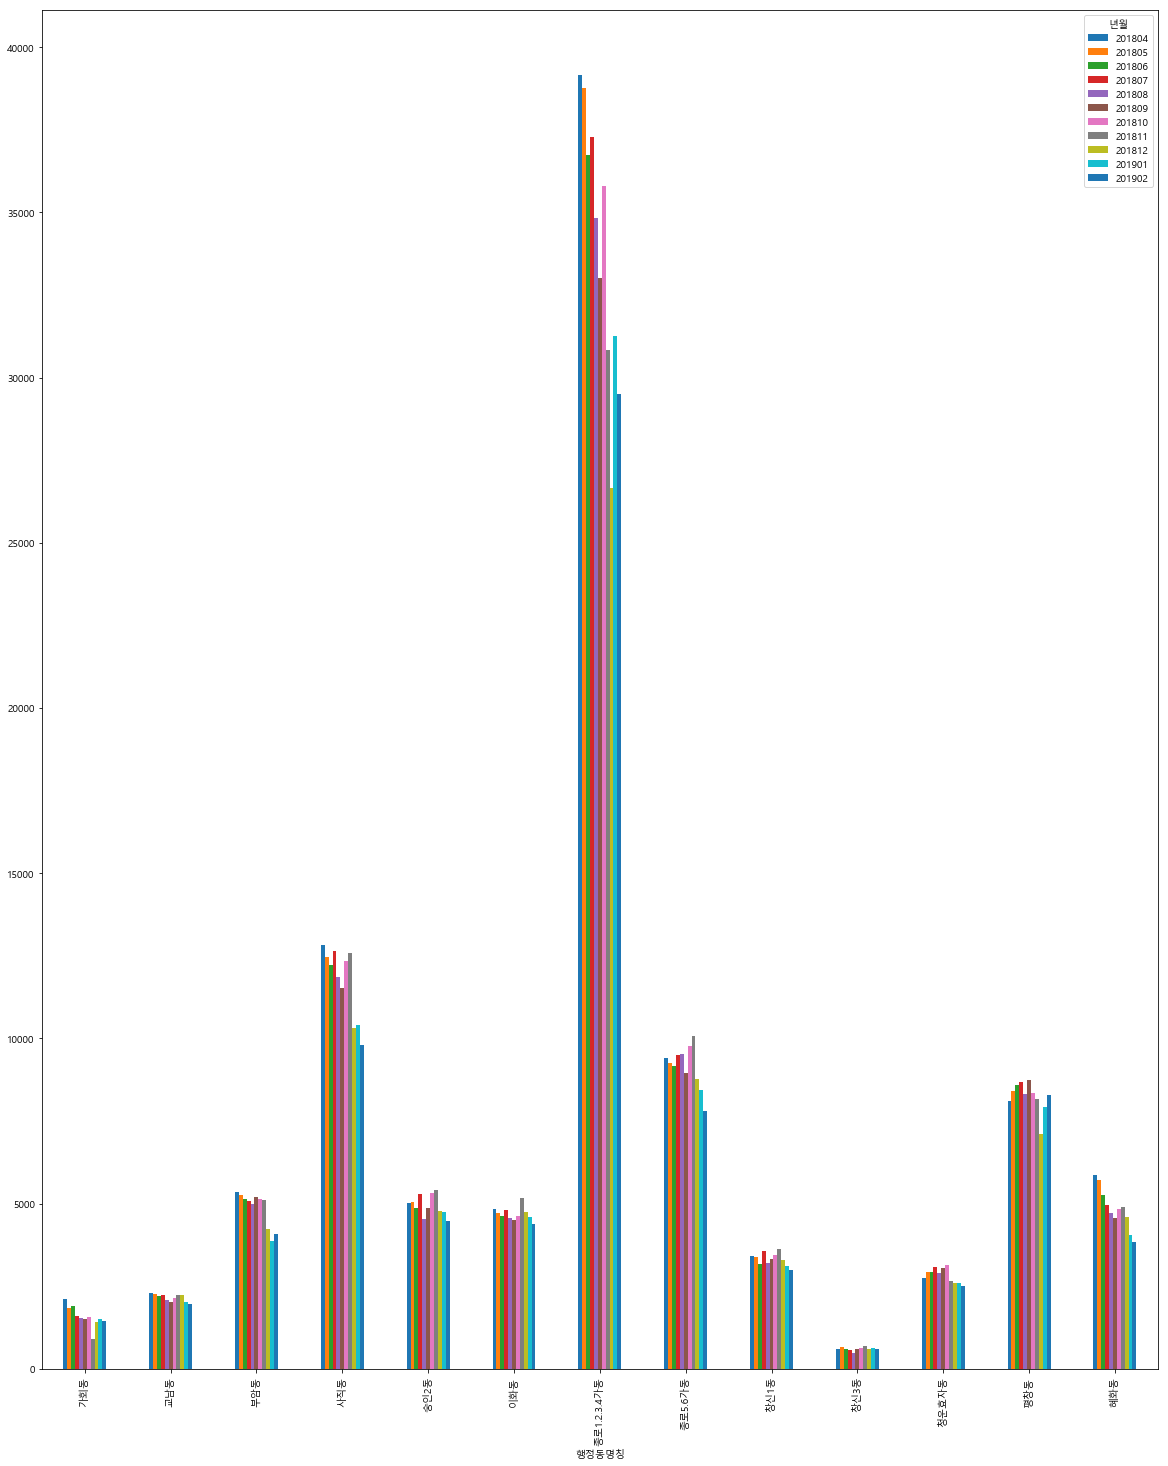

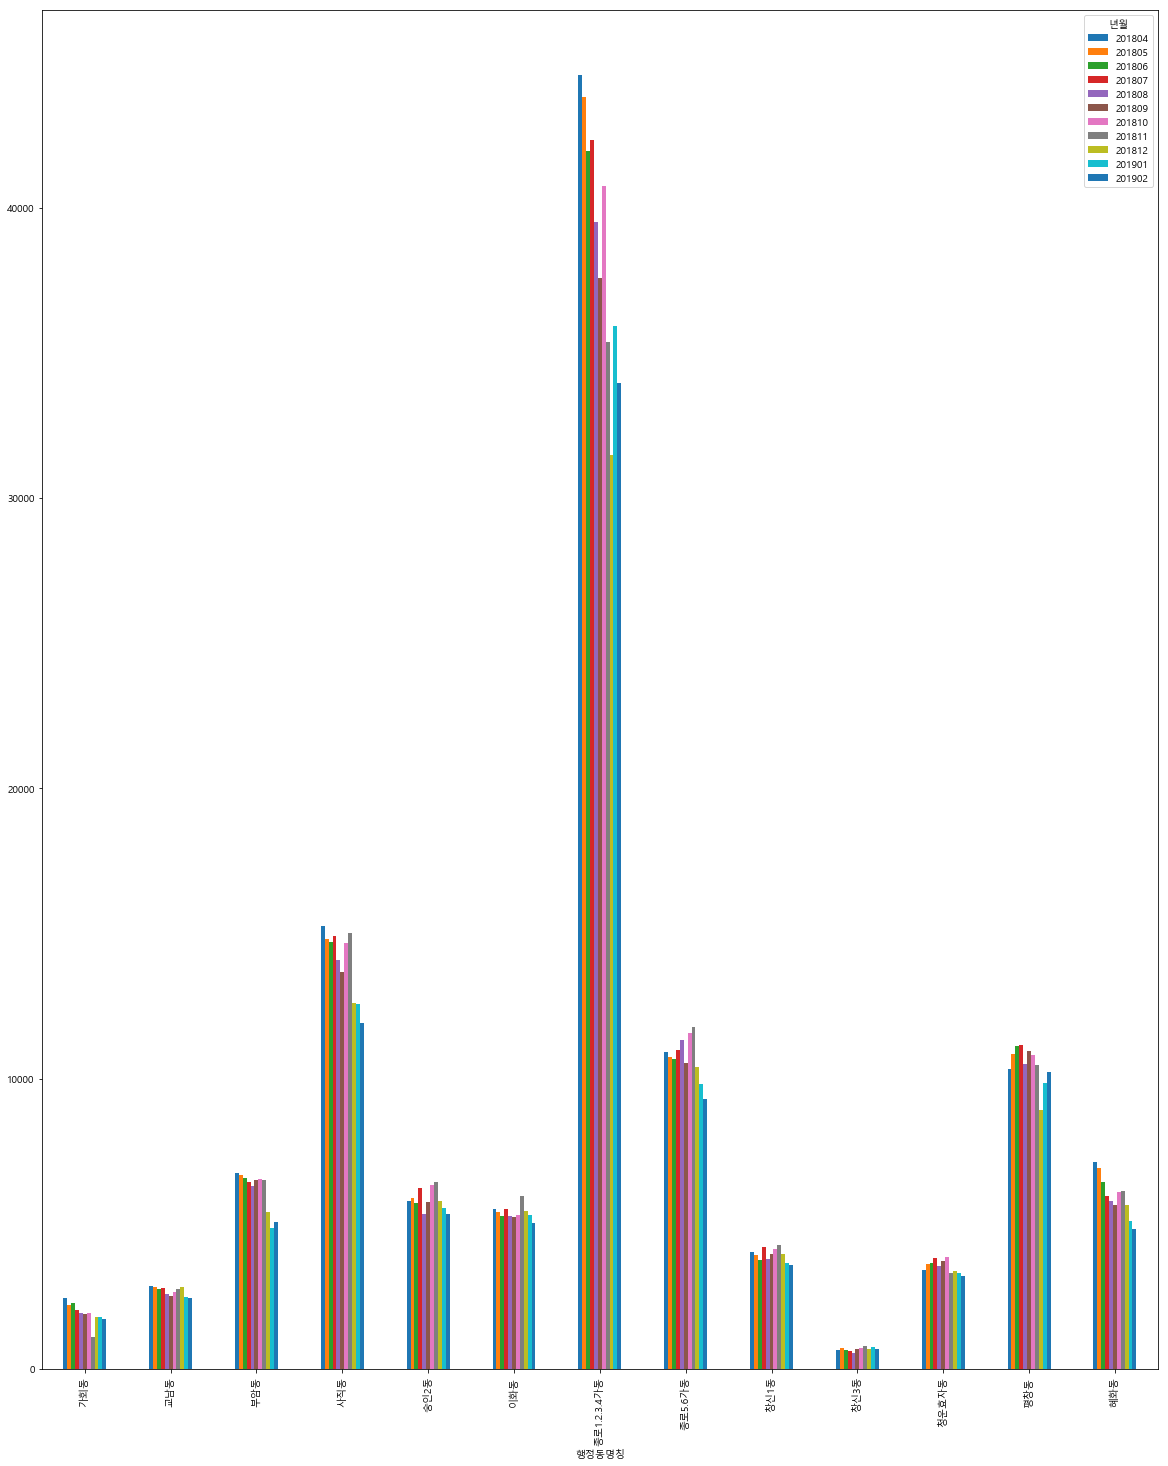

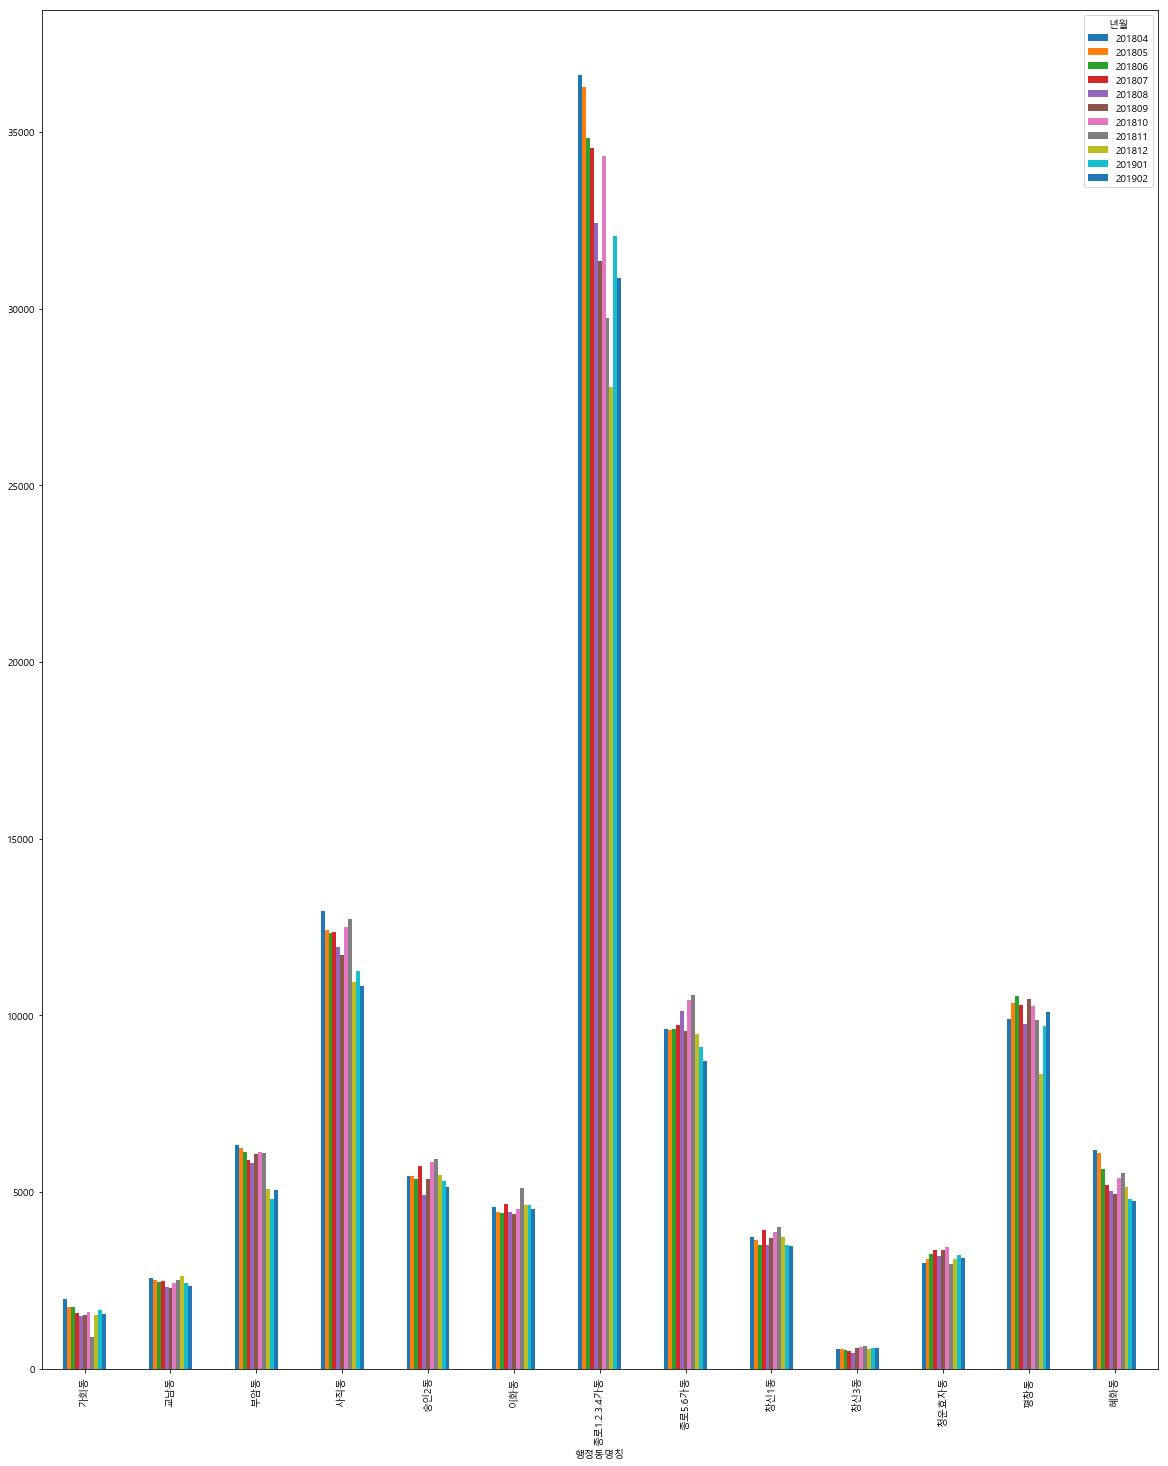

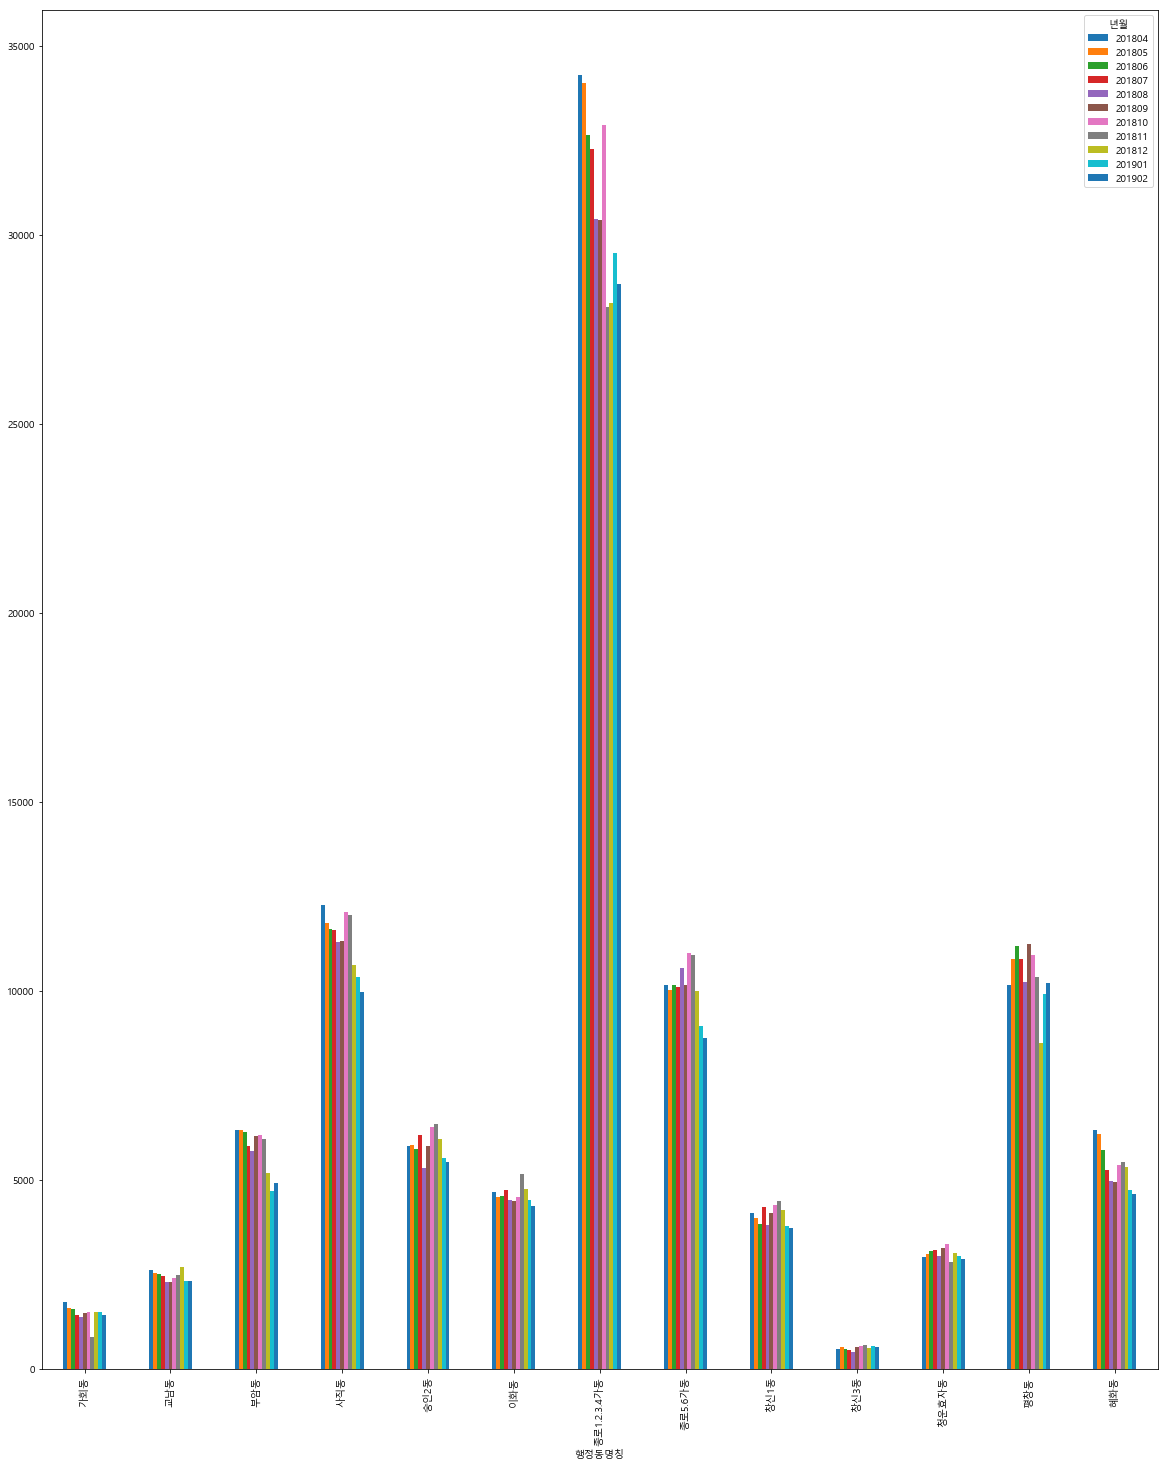

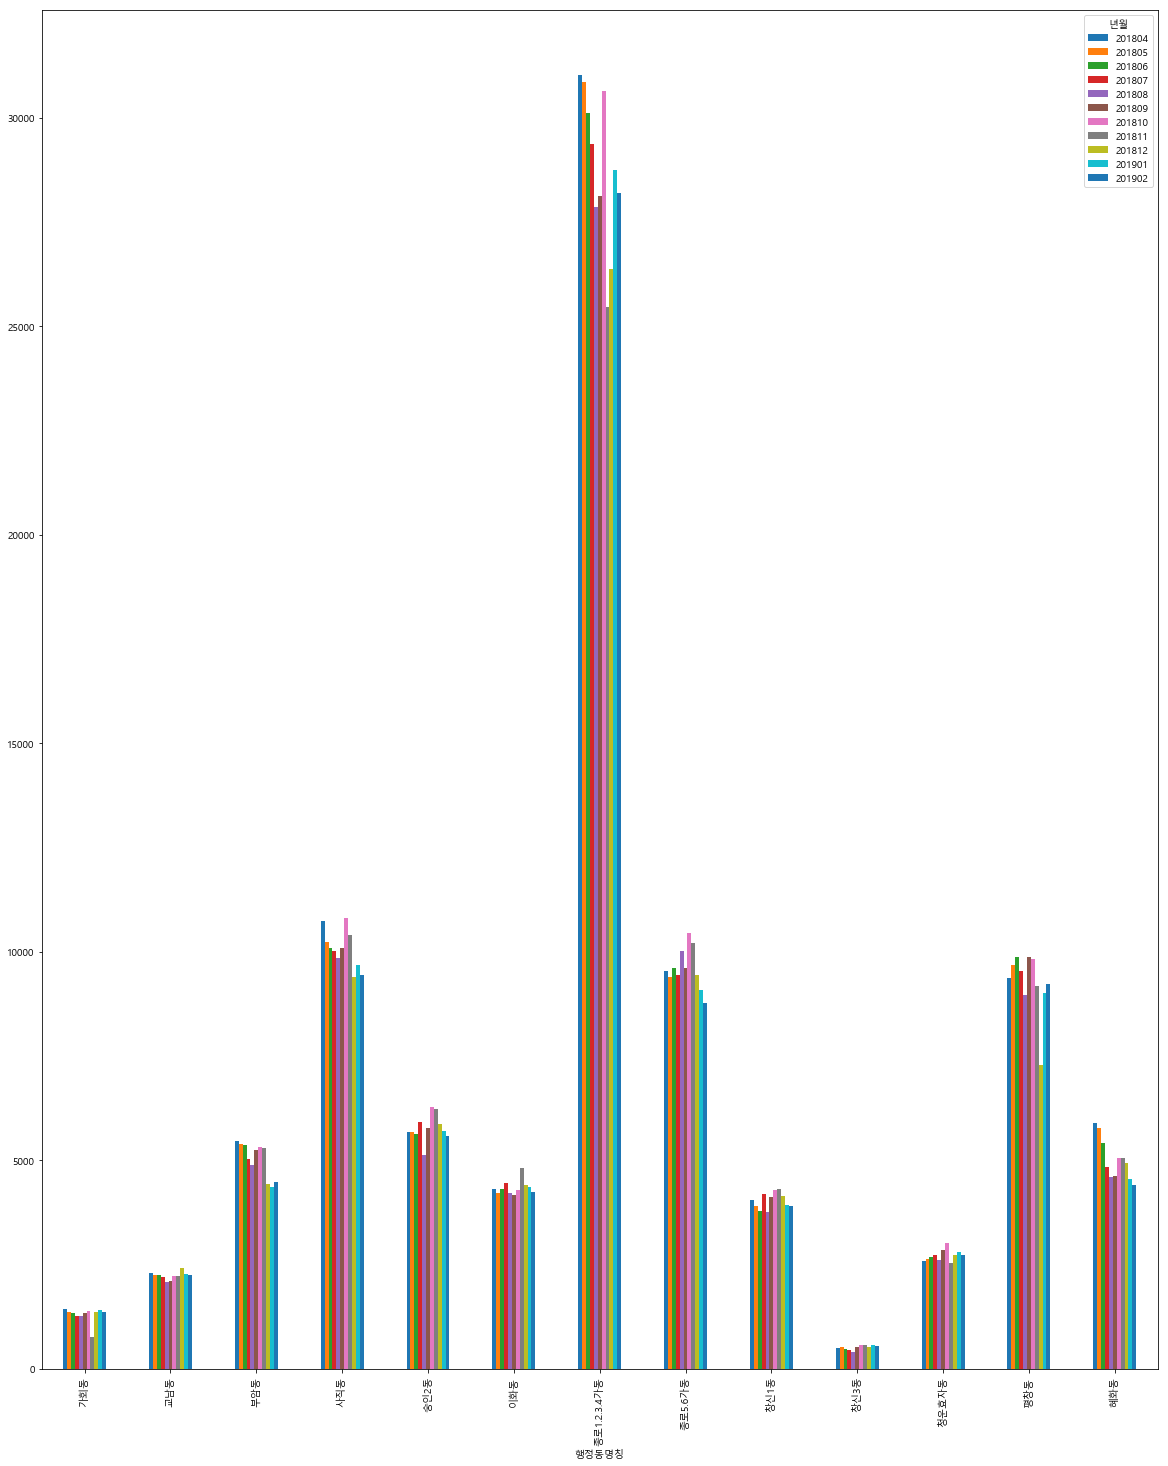

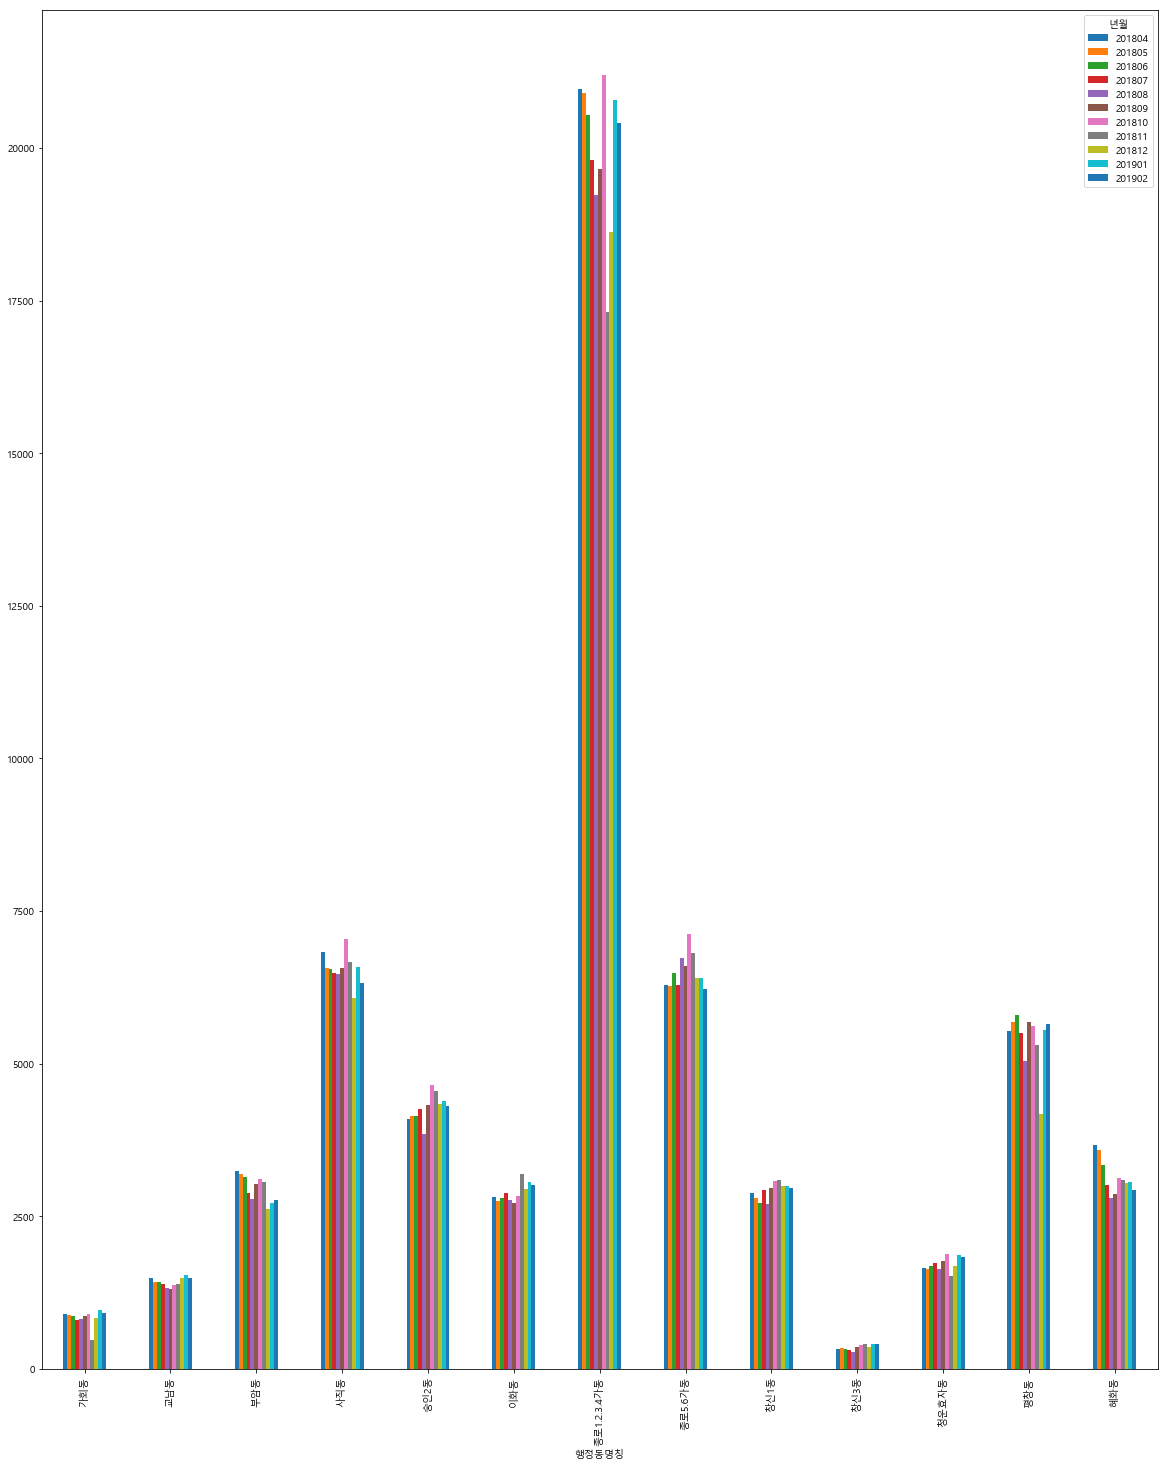

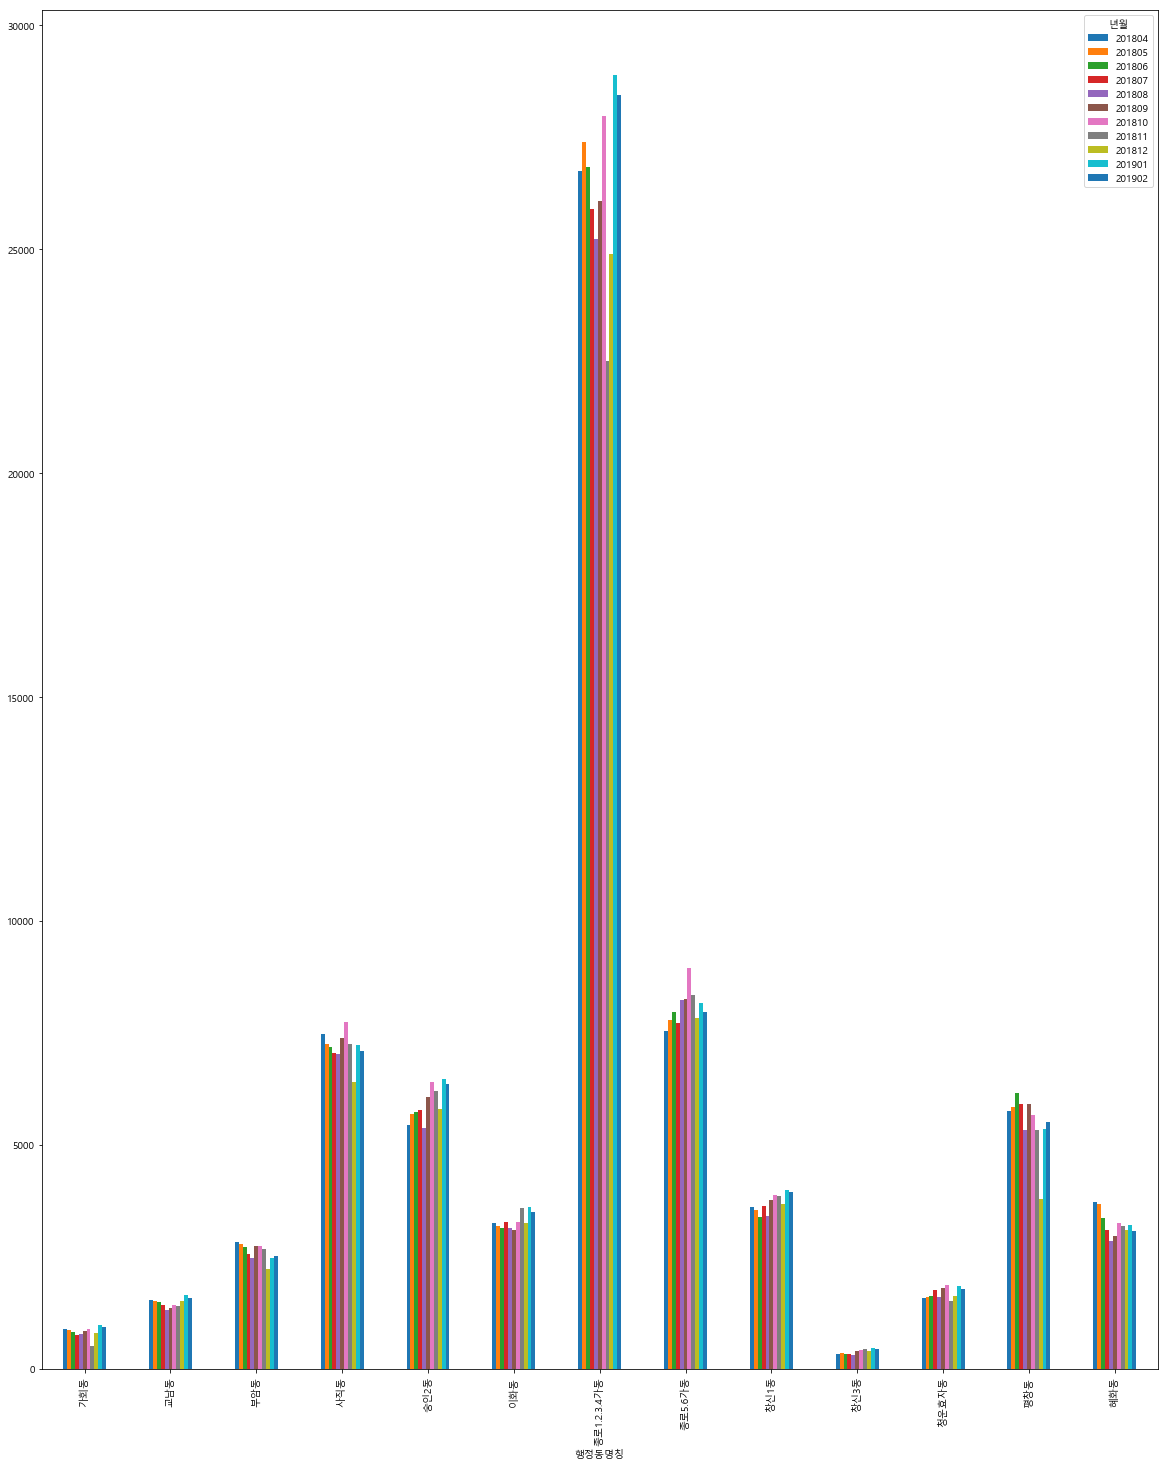

In [0]:
# 종로구_성연령유동인구 - 남자

iterables = ['남_0004', '남_0509', '남_1014',
                '남_1519', '남_2024', '남_2529',
                '남_3034','남_3539', '남_4044',
                '남_4549','남_5054', '남_5559',
                '남_6064','남_6569', '남_70이상']

for i in iterables:
    종로구 = 종로구_성연령유동인구.pivot_table(index='행정동명칭', columns='년월',
                        aggfunc='mean',
                        values=i)
    종로구.plot(kind='bar', figsize=(20,25))

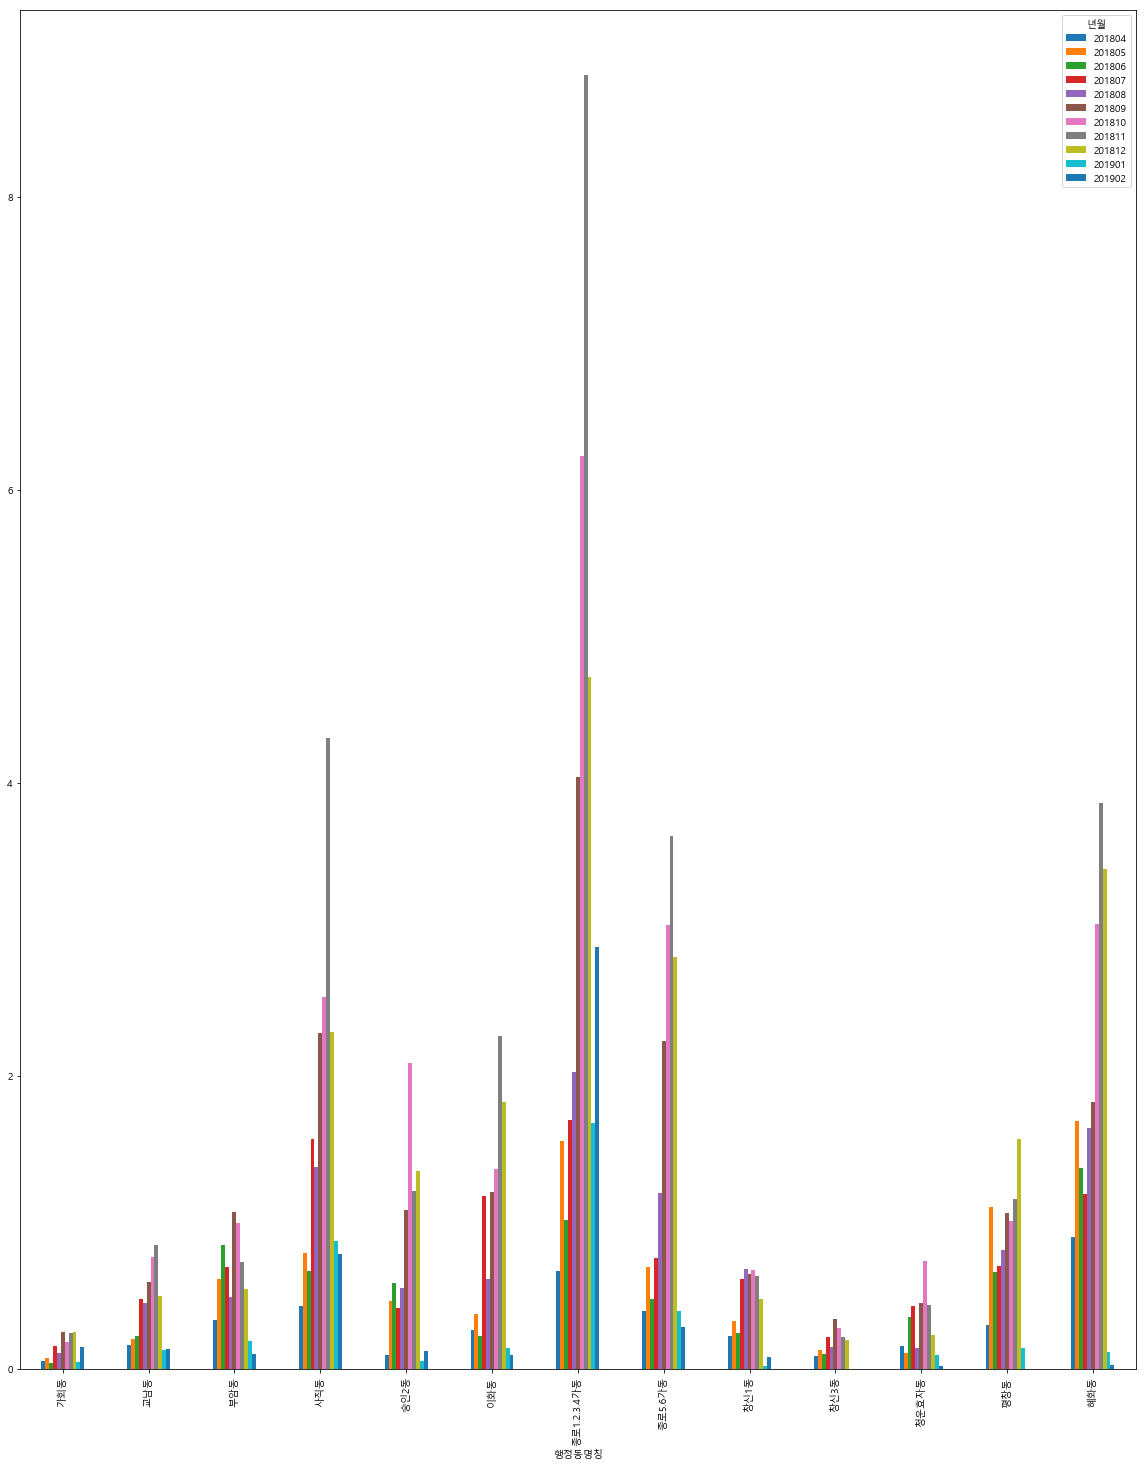

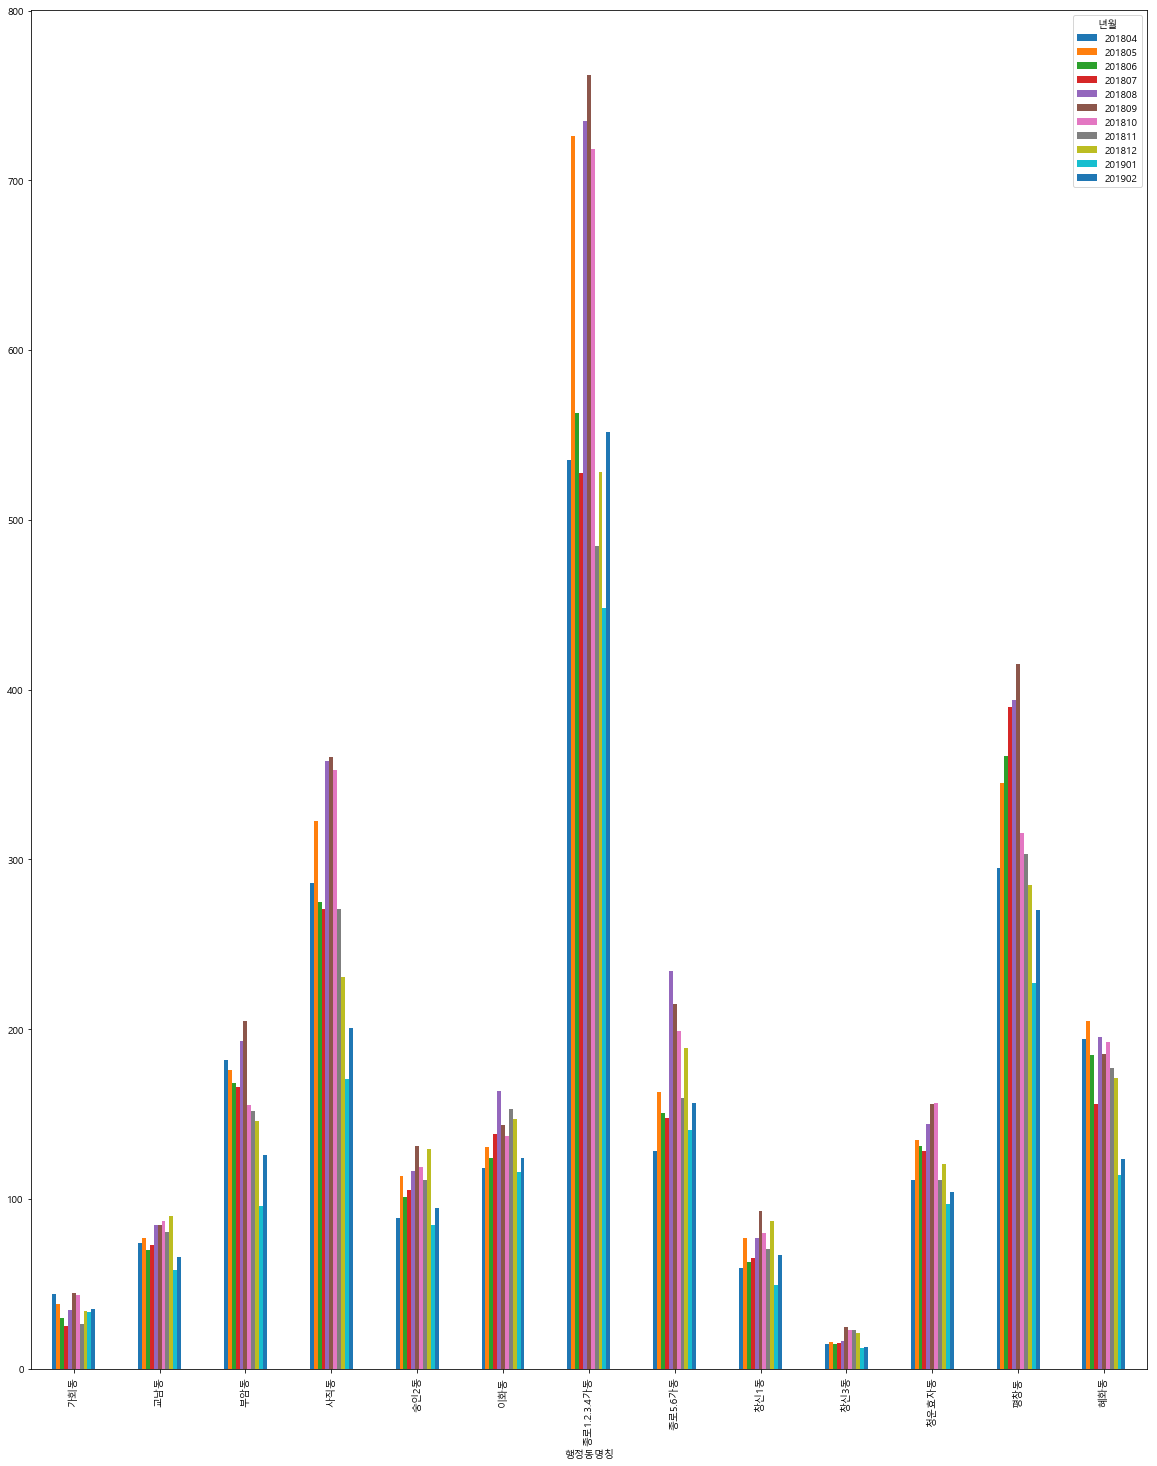

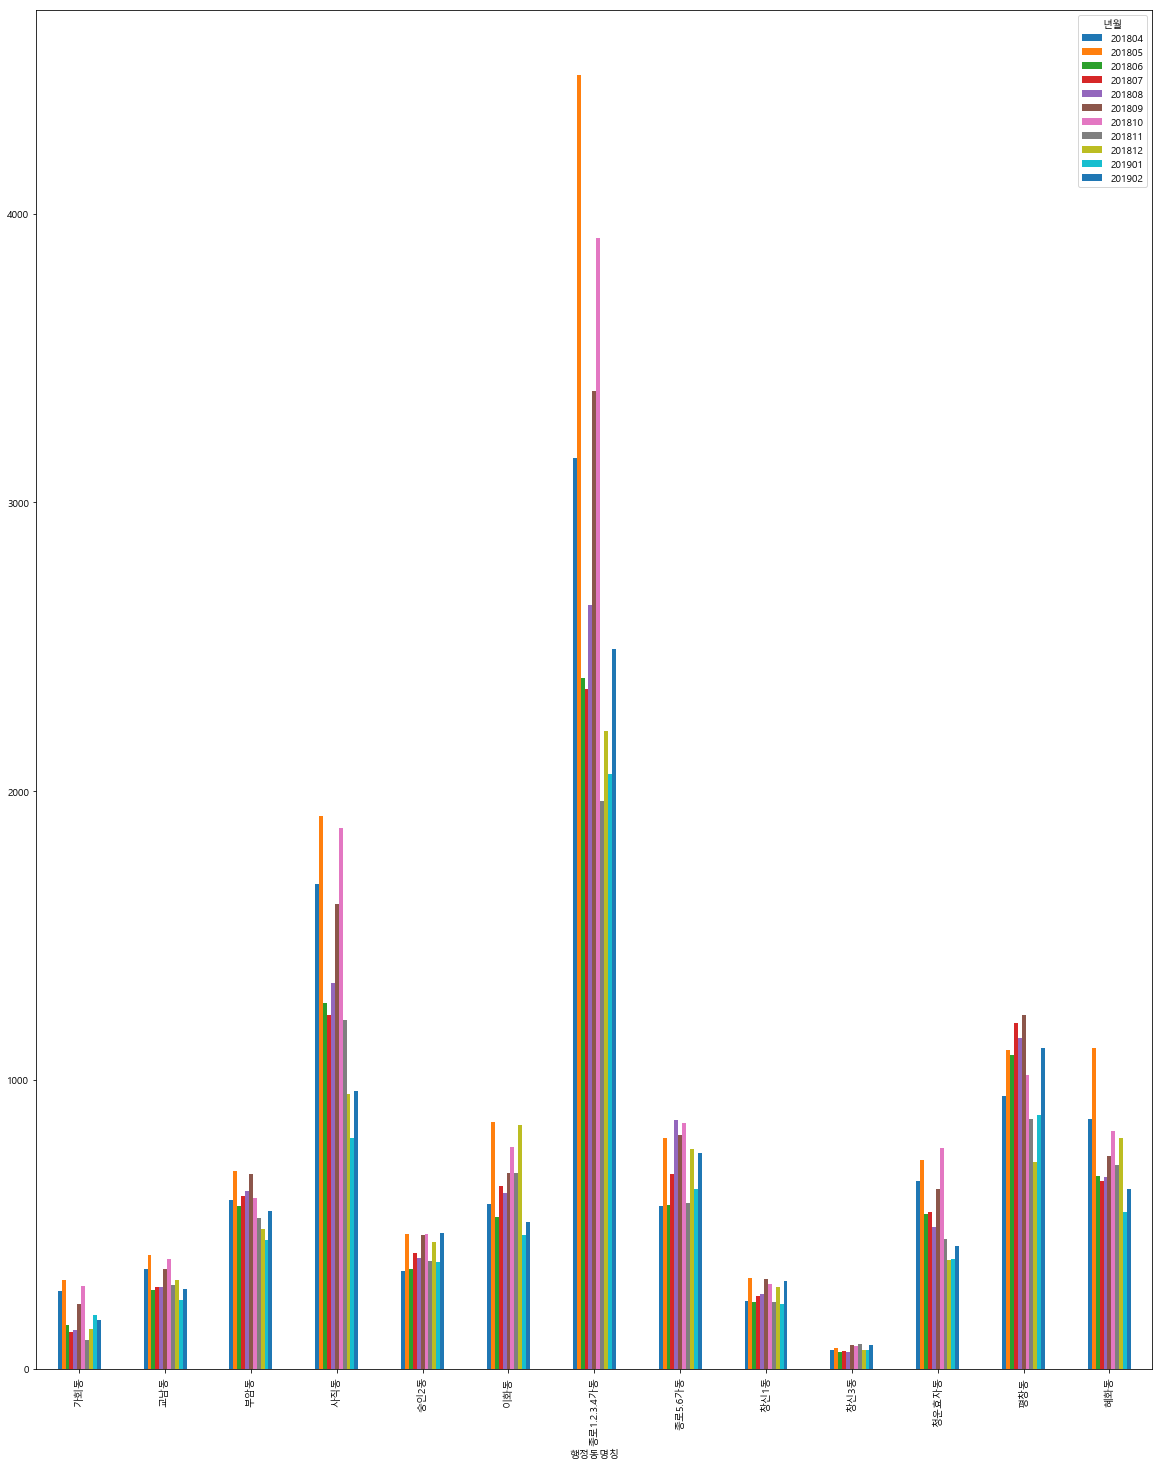

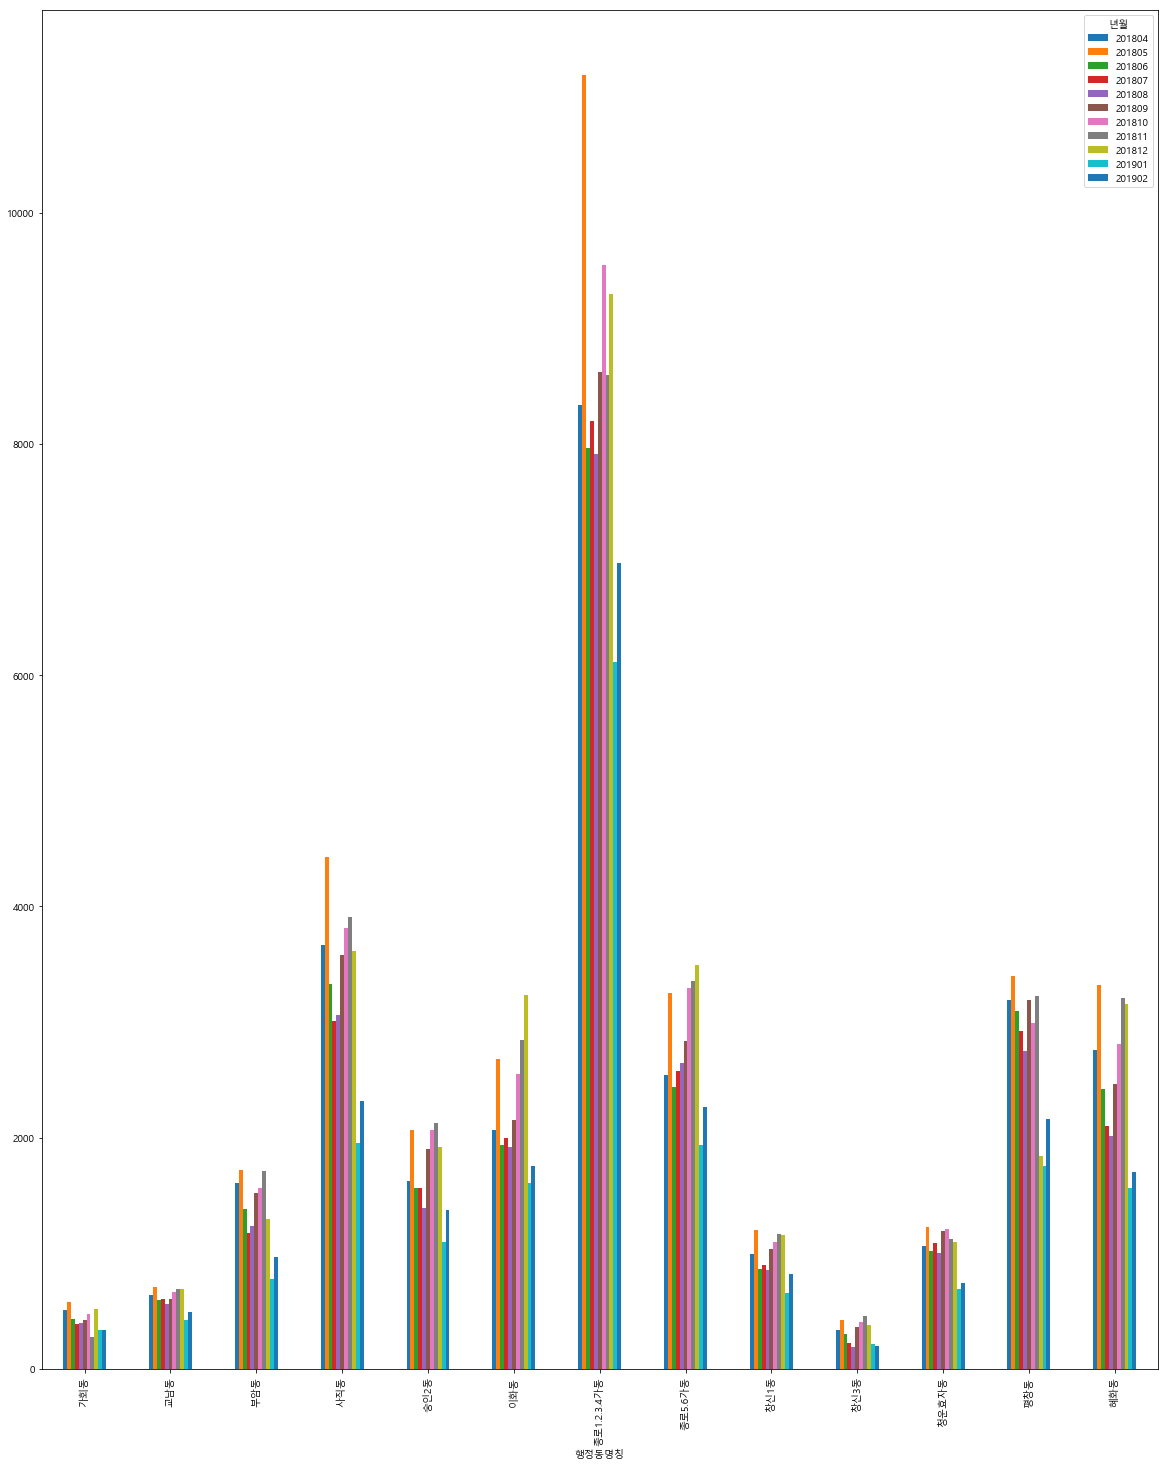

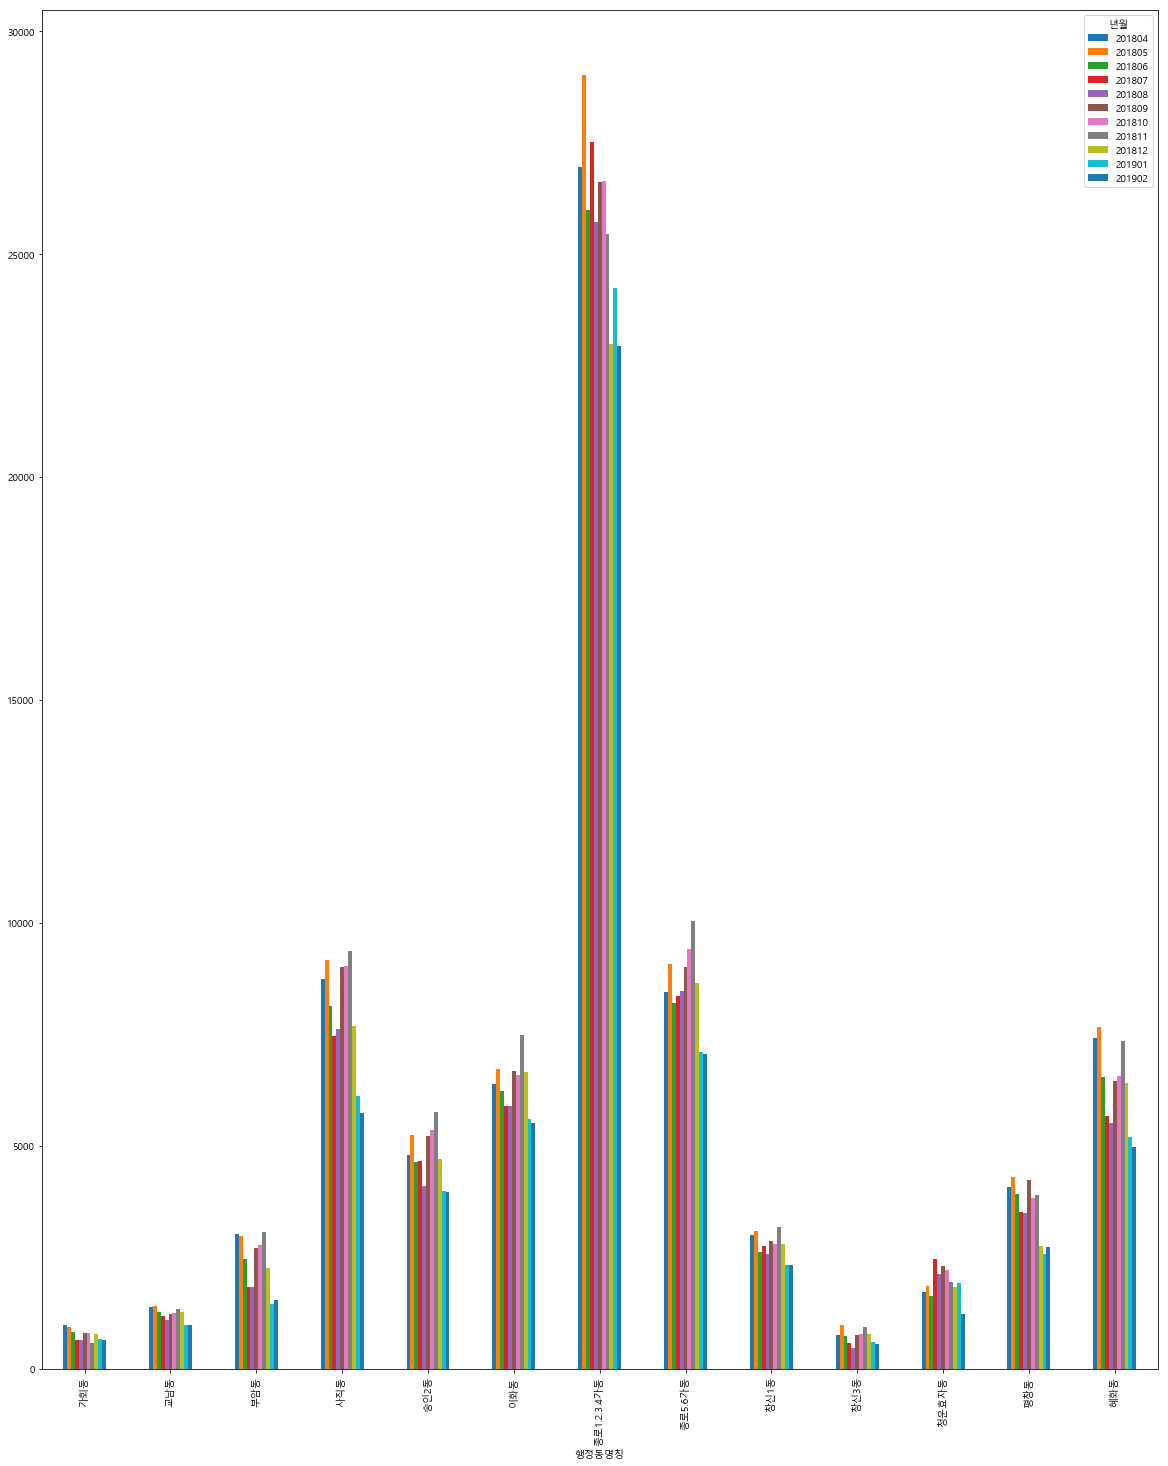

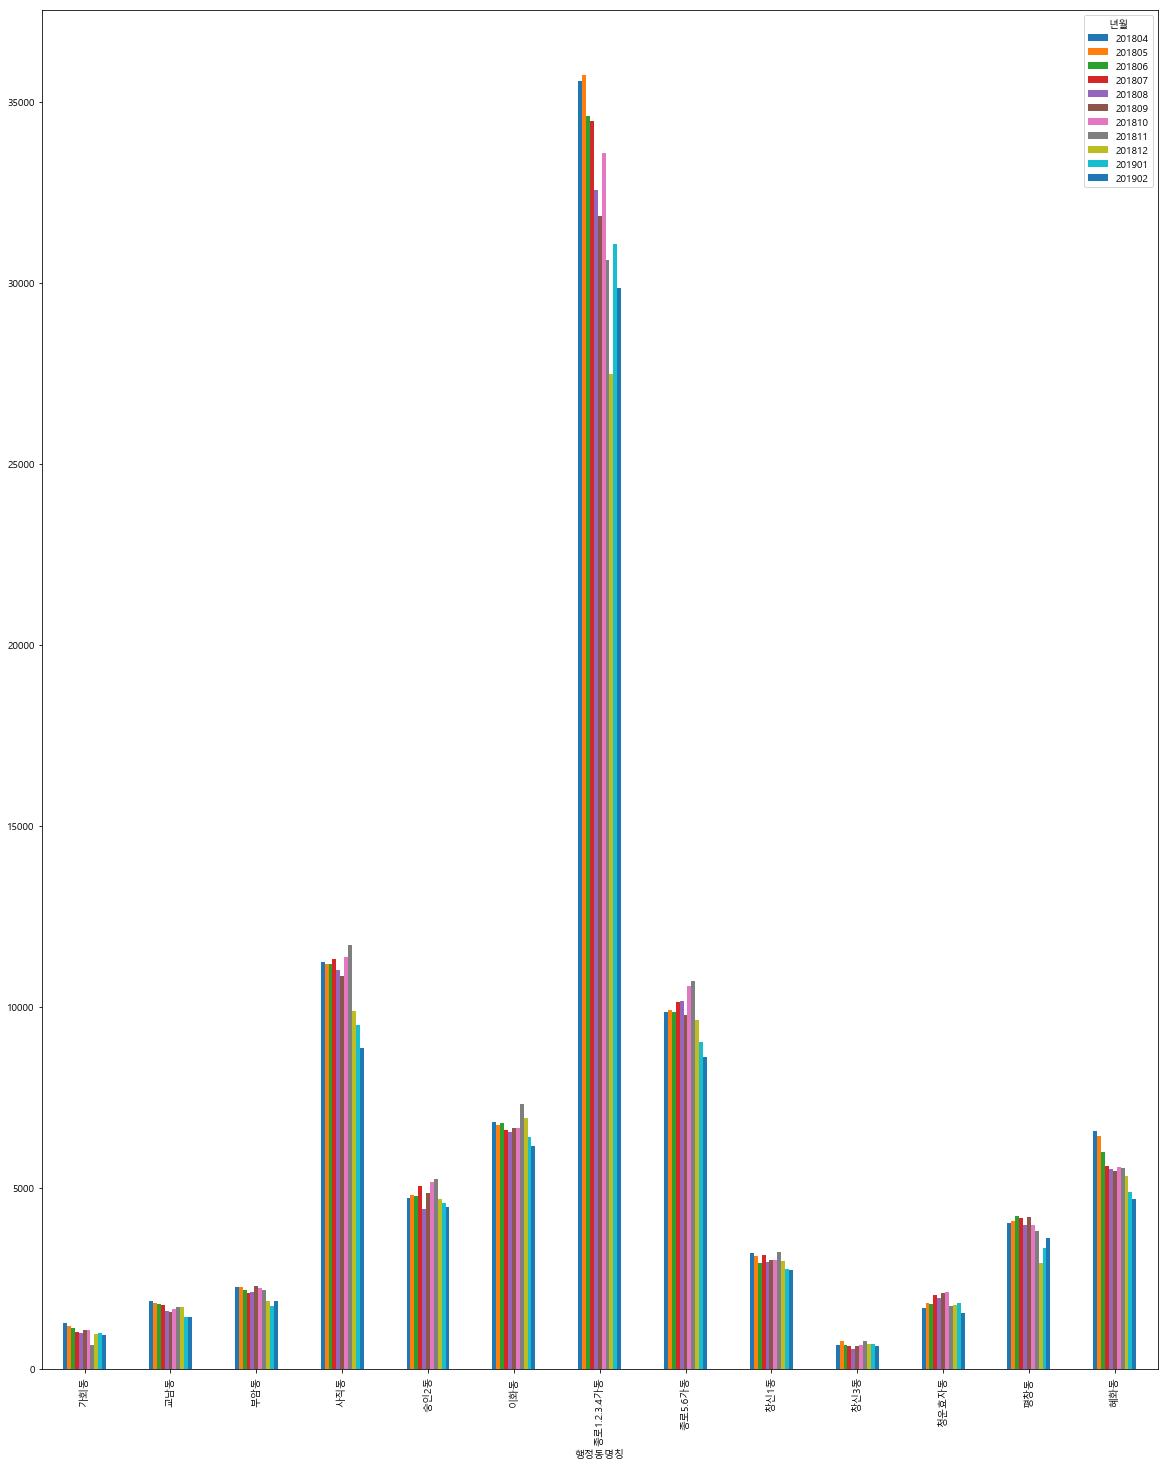

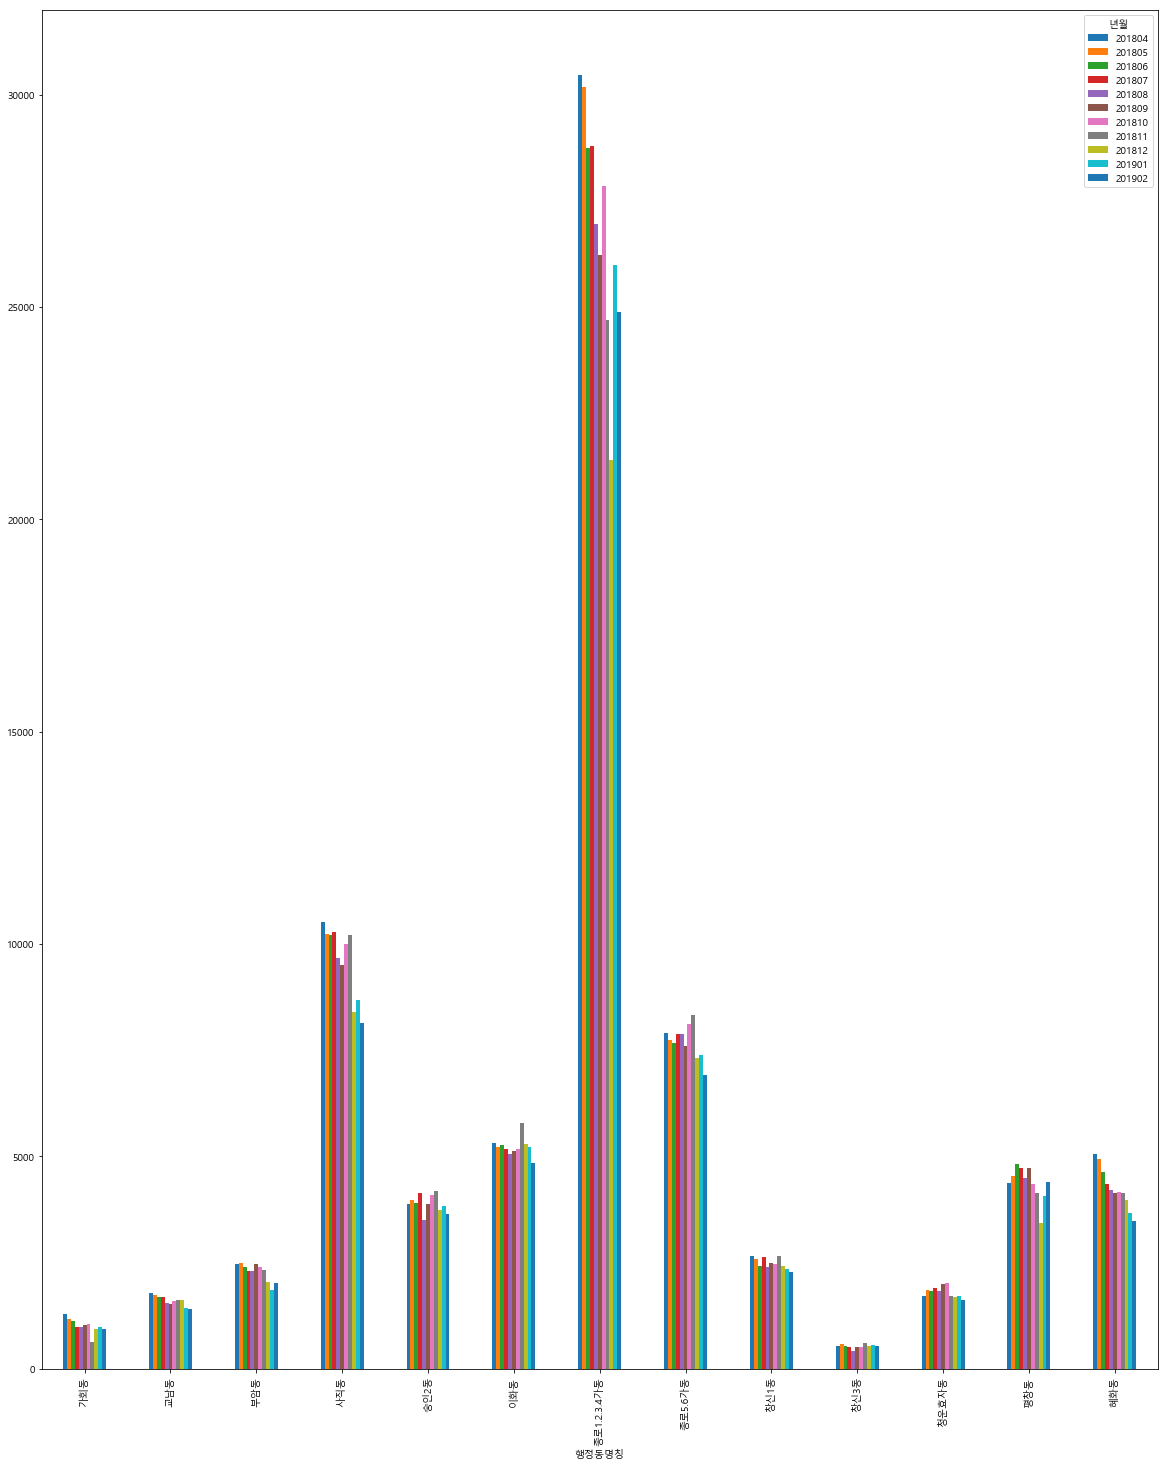

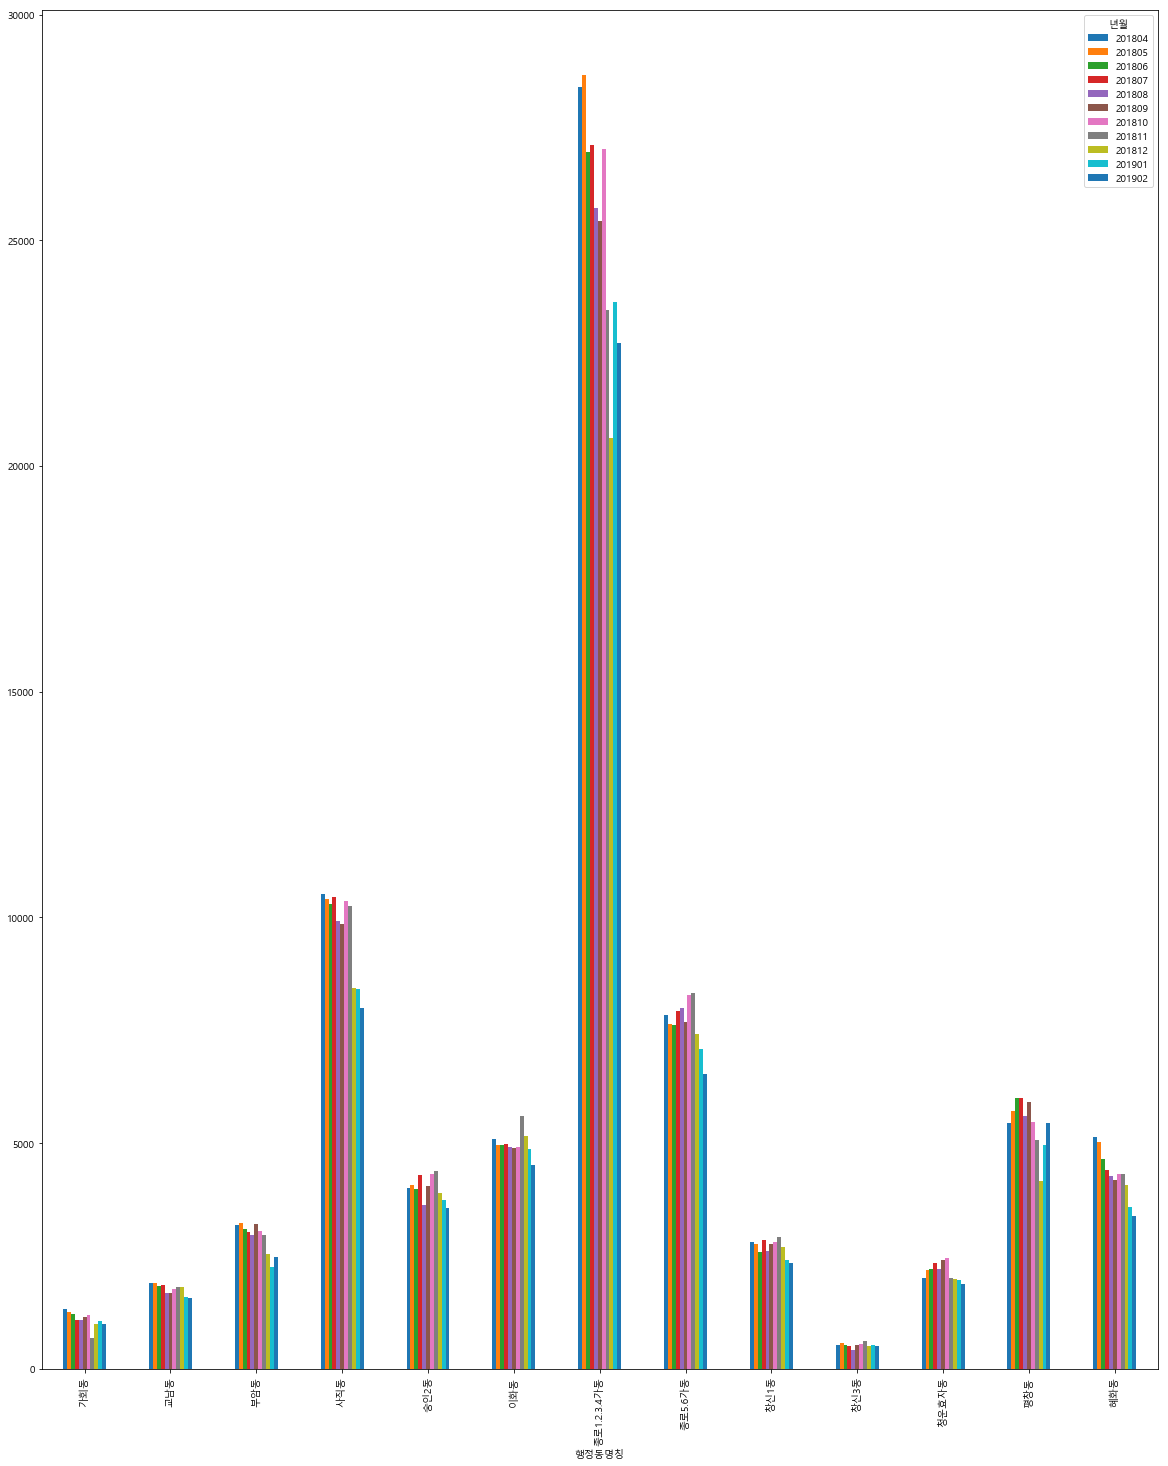

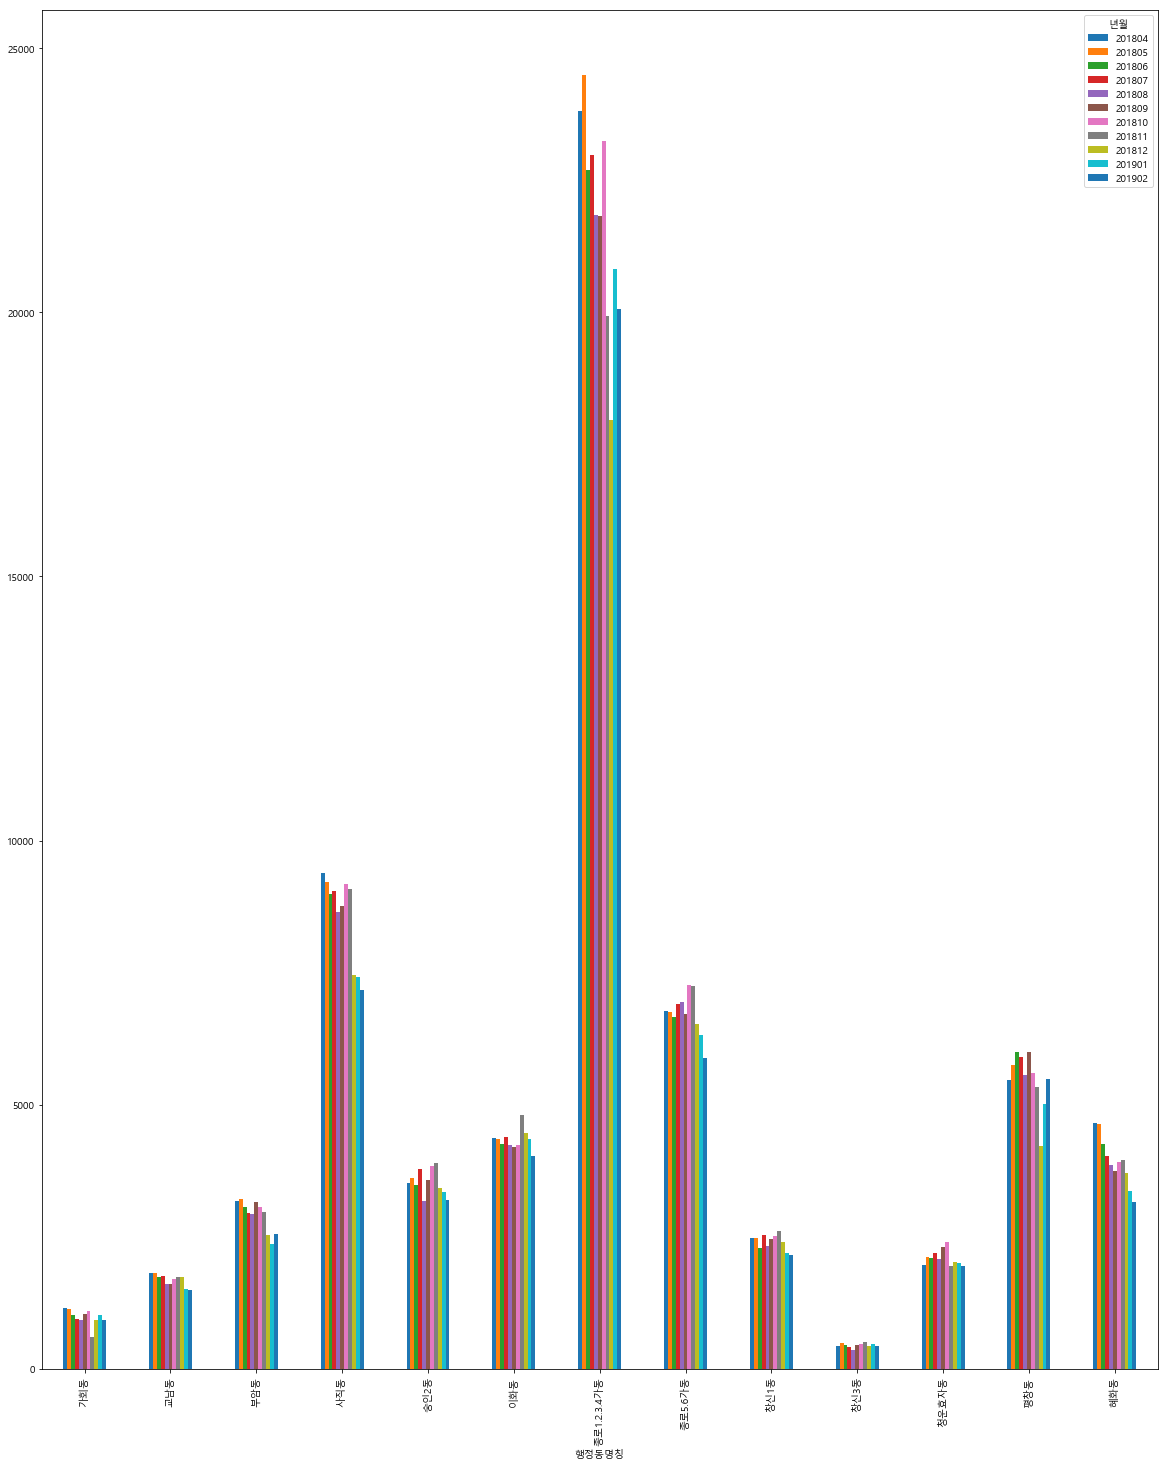

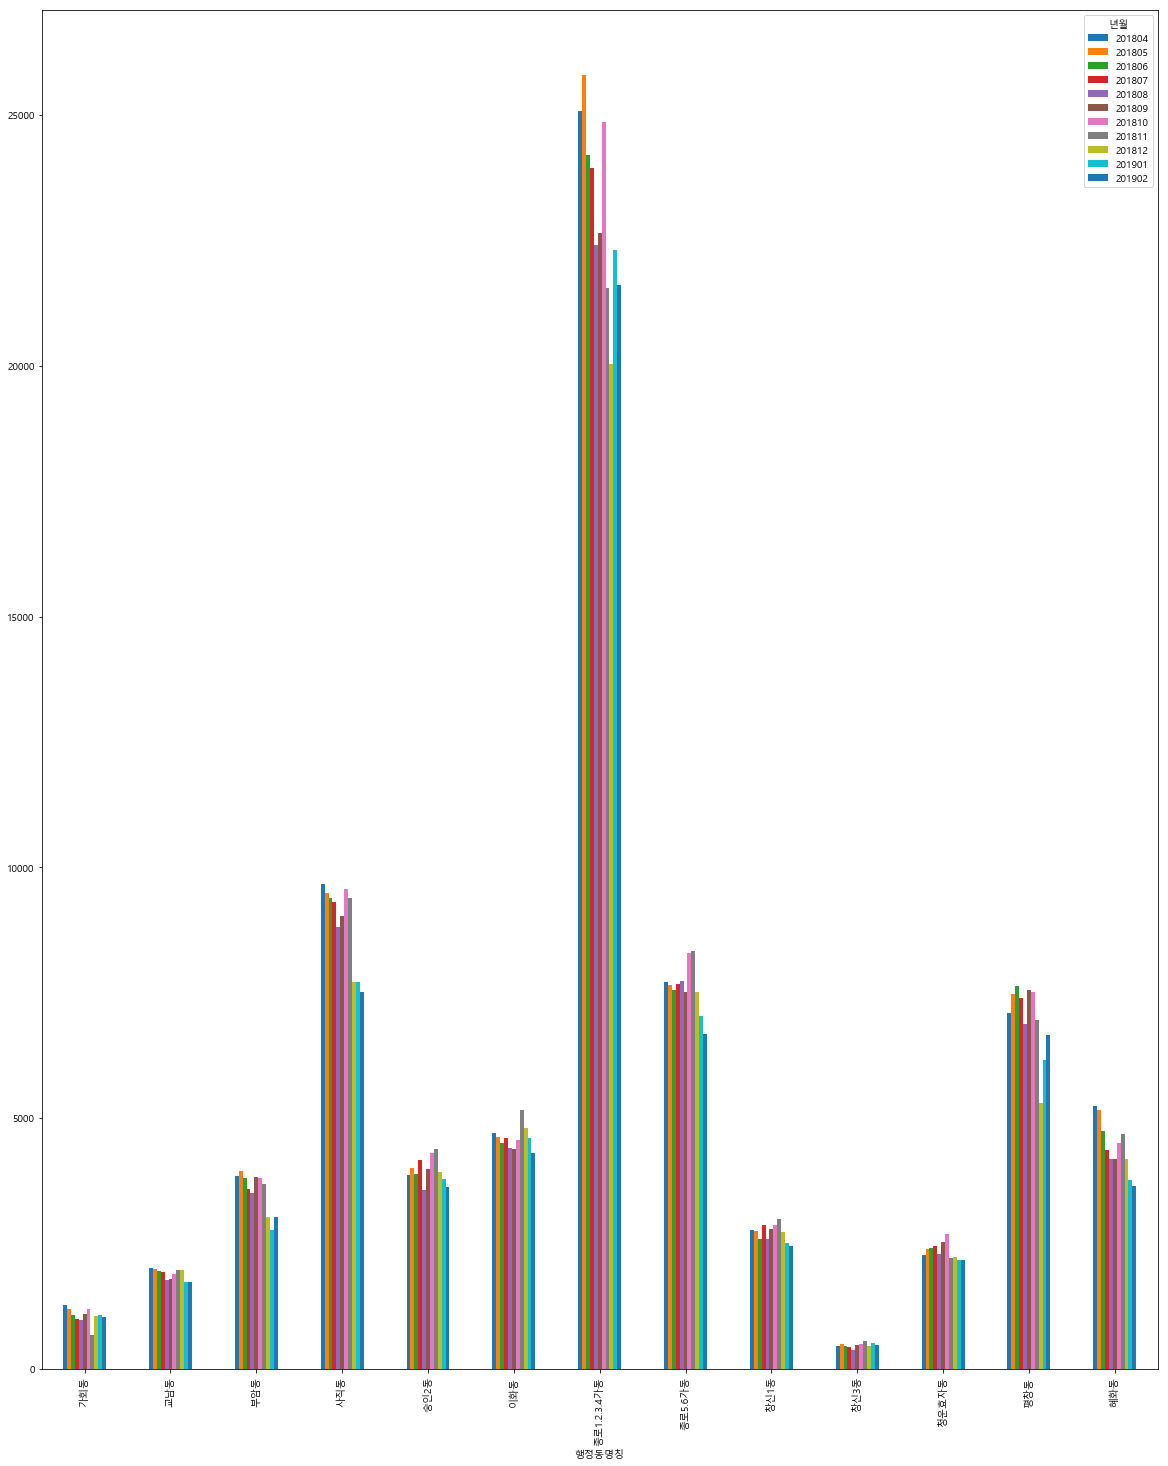

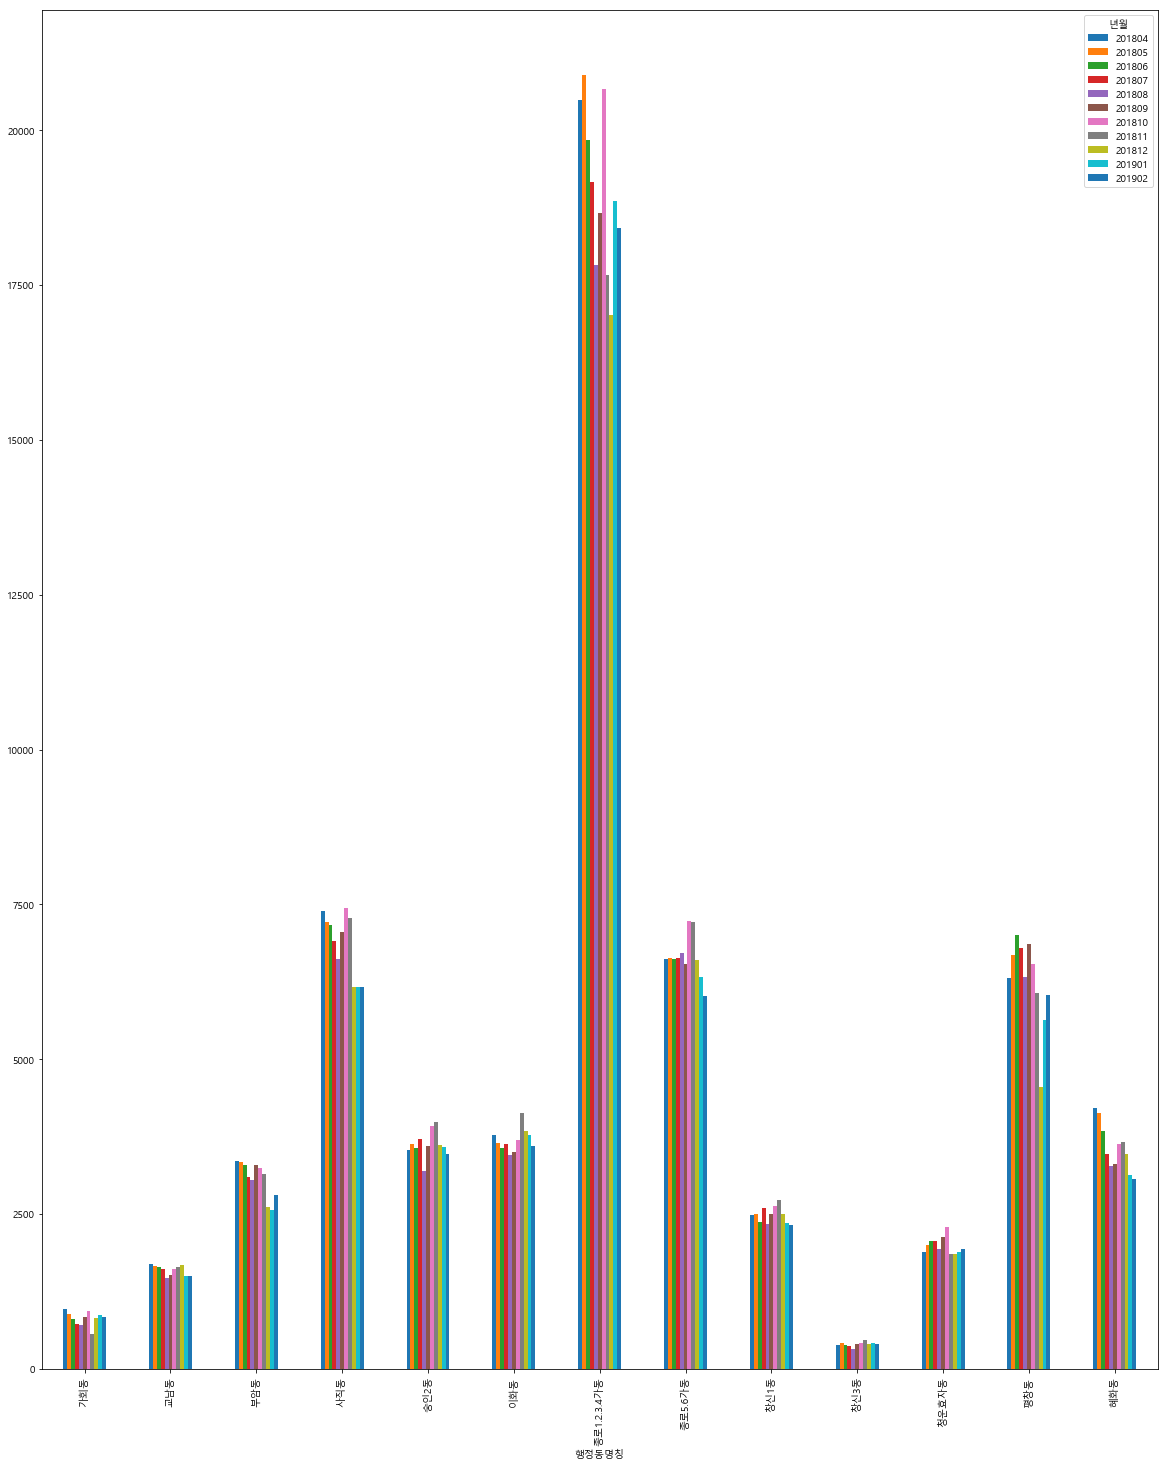

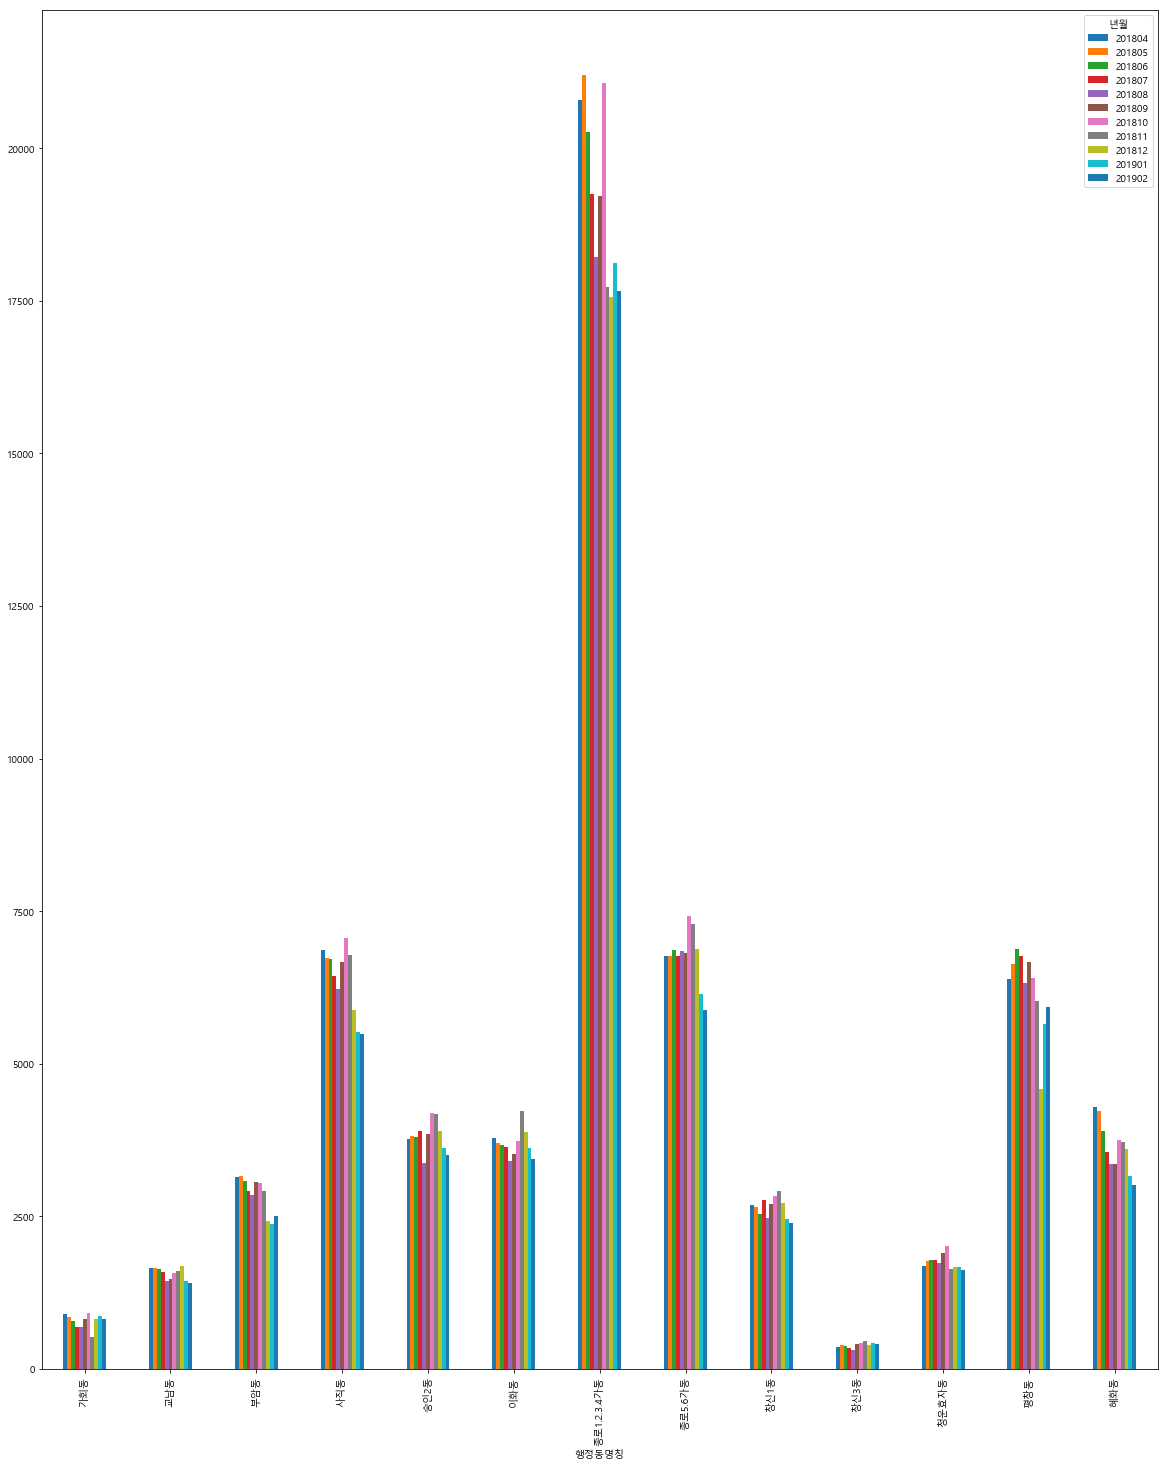

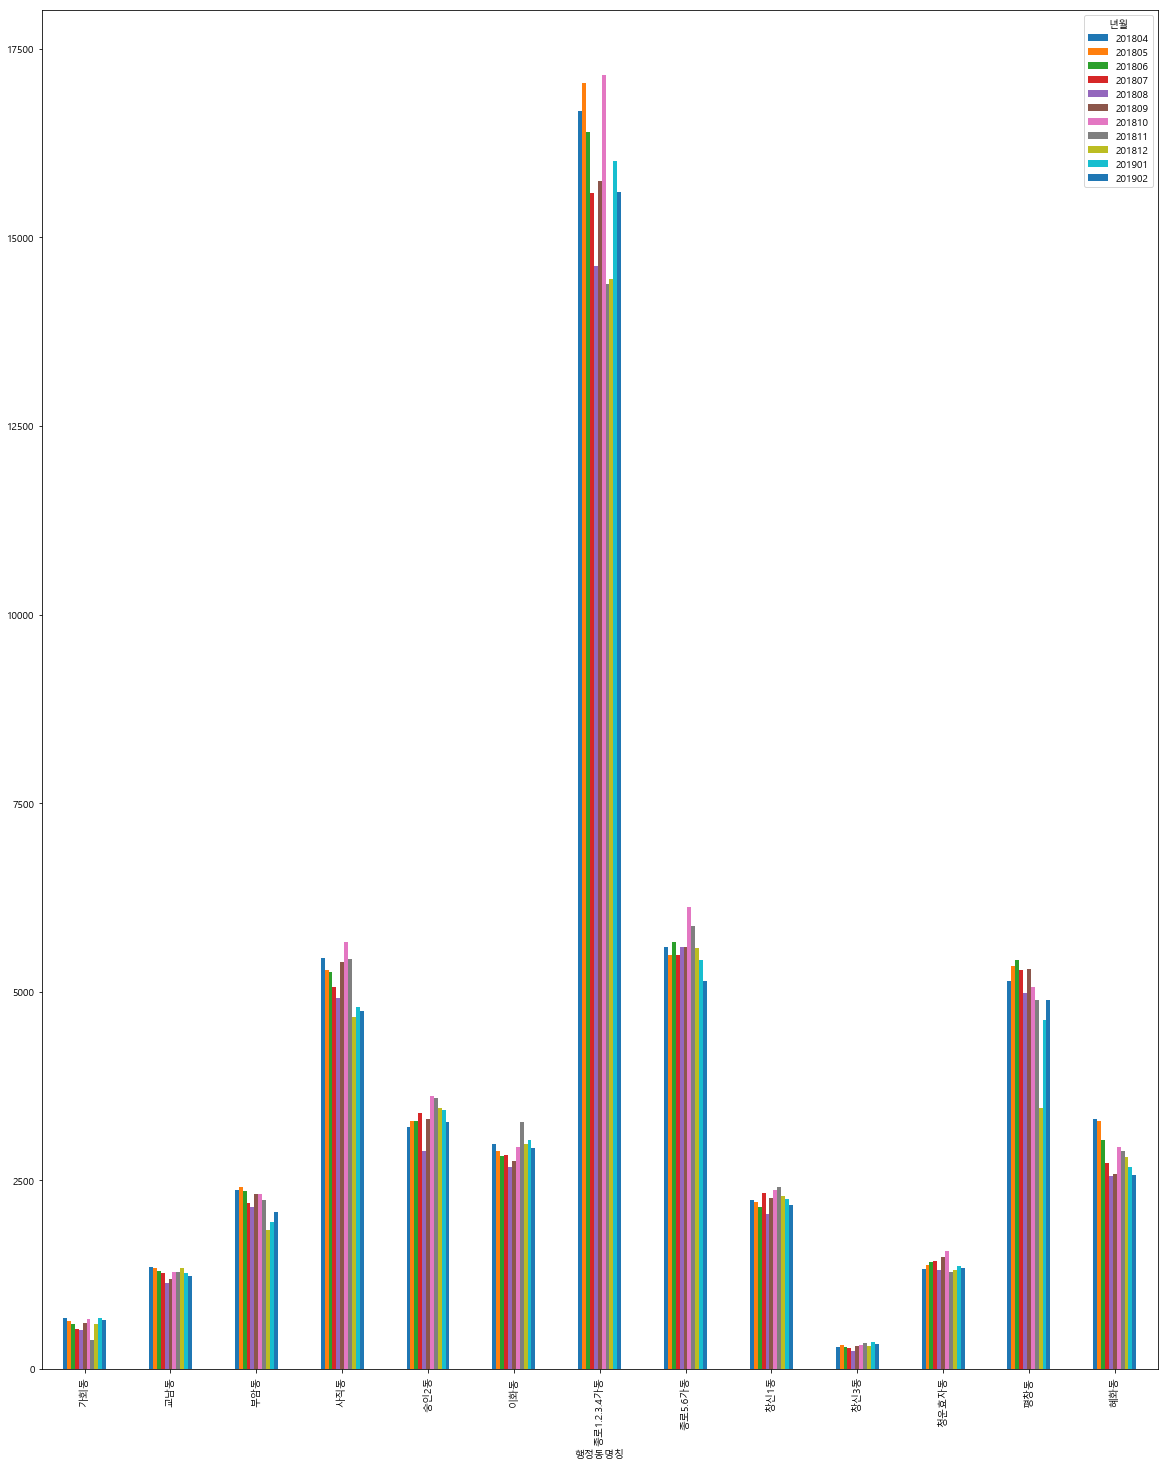

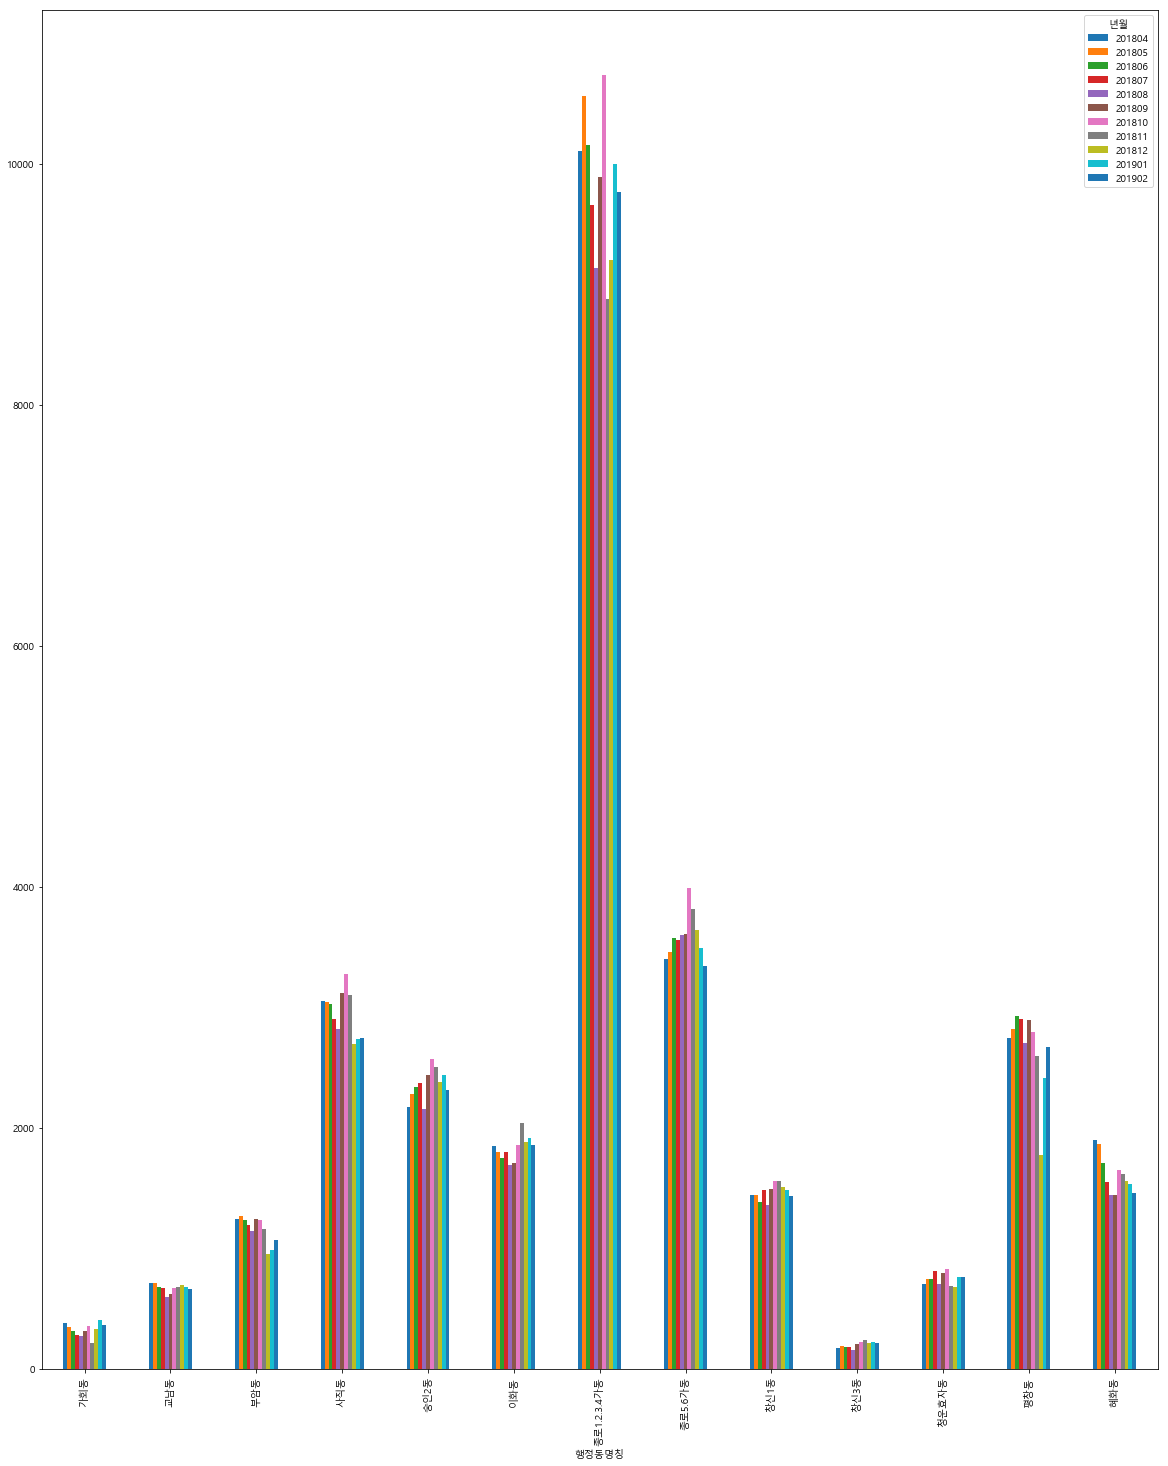

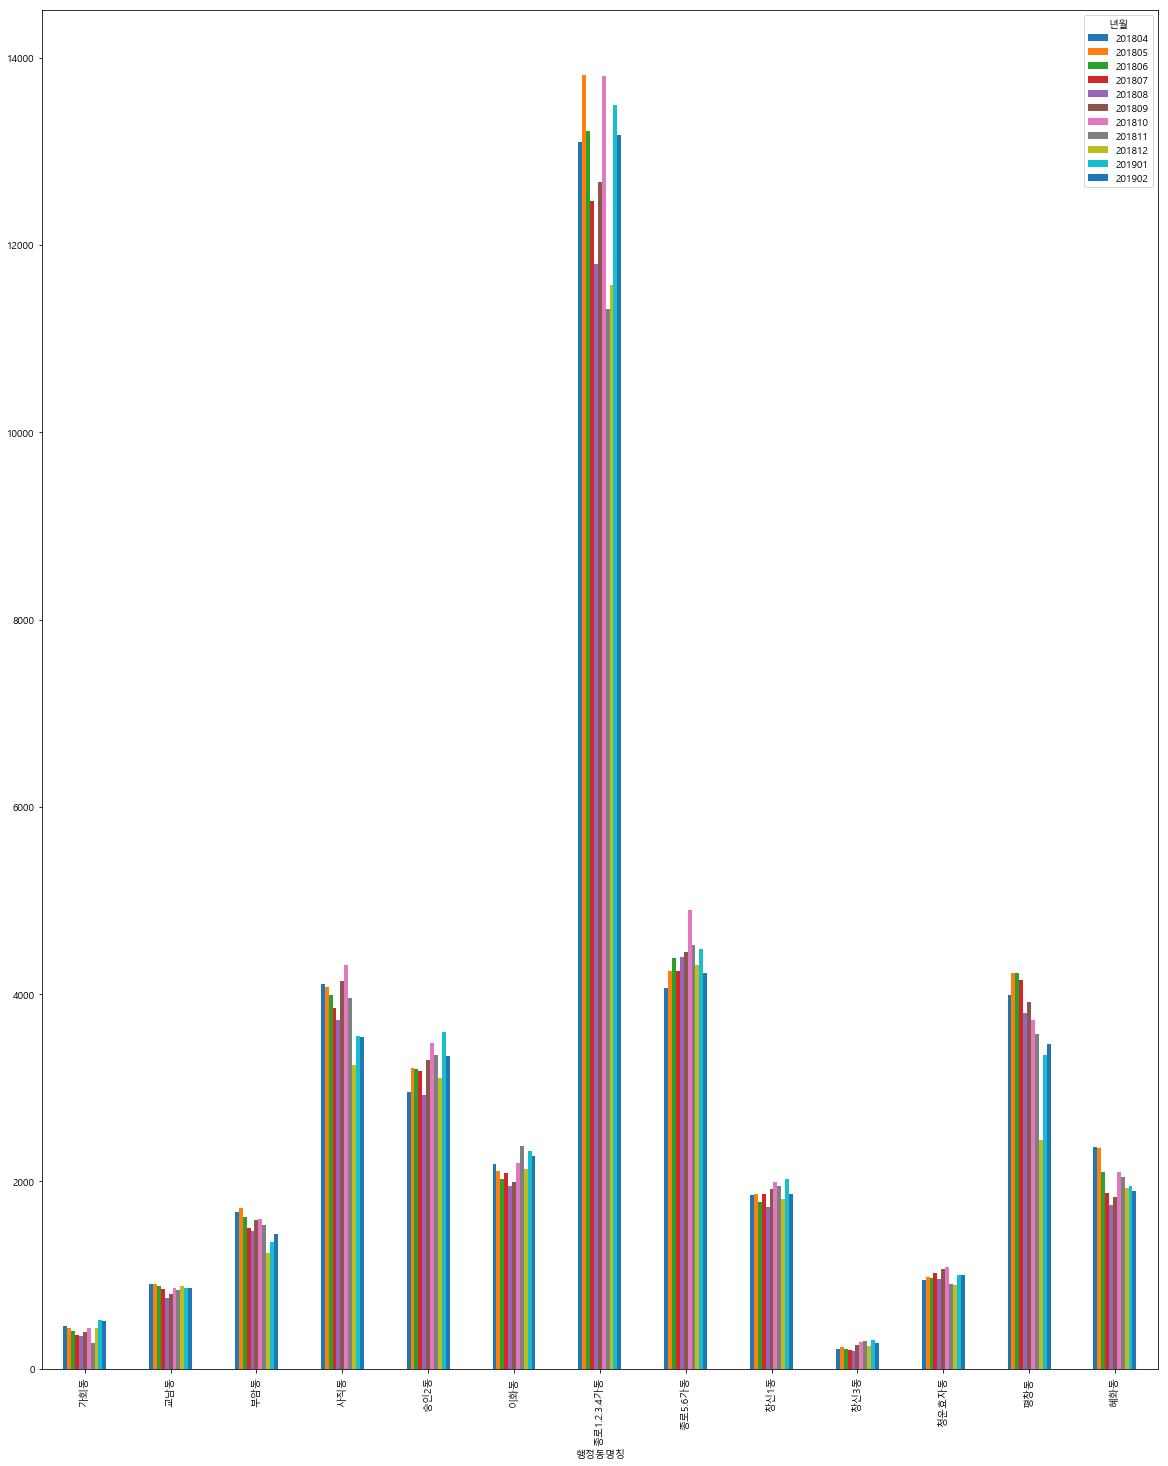

In [0]:
# 종로구_성연령유동인구 - 여자

iterables = ['여_0004','여_0509', '여_1014',
                '여_1519','여_2024', '여_2529',
                '여_3034','여_3539', '여_4044',
                '여_4549','여_5054', '여_5559',
                '여_6064', '여_6569','여_70이상']

for i in iterables:
    종로구 = 종로구_성연령유동인구.pivot_table(index='행정동명칭', columns='년월',
                        aggfunc='mean',
                        values=i)
    종로구.plot(kind='bar', figsize=(20,25))